In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline

In [122]:
# Загрузка данных
df=pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки/Квартиры Томск.xlsx', sheet_name = 0)
df.head()

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,Кирпичный,Старой постройки,1,5,первый,2150000,71666.666667,1-комнатная квартира в Советском районе. Площа...,Ремонт не требуется,Совмещенный
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,Кирпичный,Очень старой постройки,1,3,первый,1200000,36144.578313,Продам однокомнатную квартиру. Две железные дв...,Ремонт не требуется,Совмещенный
2,1,"Томская область, Томск, АРЗ мкр, Кольцевой, 4","Кольцевой, 4",Кольцевой,Окраина города,32.0,Кирпичный,Старой постройки,1,5,первый,1250000,39062.500000,Продается уютная 1к квартира в 5ти этажном кир...,Ремонт не требуется,Совмещенный
3,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,Кирпичный,Очень старой постройки,1,2,первый,1550000,47839.506173,Предлагаем однокомнатную квартиру. Тихие сосед...,Ремонт не требуется,Совмещенный
4,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,Кирпичный,Старой постройки,1,5,первый,1550000,51666.666667,Продается 1-комнатная квартира. В хорошем сост...,Ремонт не требуется,Совмещенный


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Количество комнат  2540 non-null   int64  
 1   Адрес              2540 non-null   object 
 2   УлицаДом           2540 non-null   object 
 3   Улица              2540 non-null   object 
 4   Район              2540 non-null   object 
 5   Площадь            2540 non-null   float64
 6   Материал стен      2540 non-null   object 
 7   Состояние          2540 non-null   object 
 8   Этаж_1             2540 non-null   int64  
 9   Этажность          2540 non-null   int64  
 10  Этаж               2540 non-null   object 
 11  Цена(руб.)         2540 non-null   int64  
 12  Цена (1 кв.м)      2540 non-null   float64
 13  Описание           2540 non-null   object 
 14  Ремонт             2540 non-null   object 
 15  Санузел            2540 non-null   object 
dtypes: float64(2), int64(4),

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Цена(руб.)'>

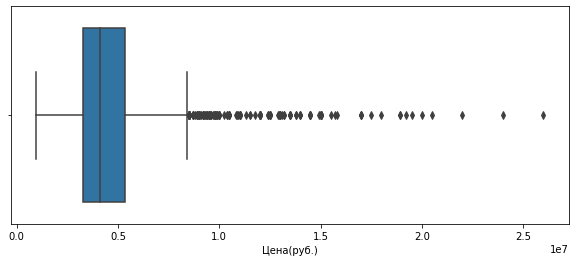

In [124]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df['Цена(руб.)'])

In [125]:
# Найдем границы выбросов
df_price=df['Цена(руб.)']
df_price=df_price.sort_values()
#print(df_price)

# Межквартильный размах
iqr=(df_price.quantile(q=0.75)-df_price.quantile(q=0.25))*1.5
print(iqr)

# Расчитываем границы выбросов
q1=df_price.quantile(q=0.25)-iqr
print(q1)
q2=df_price.quantile(q=0.75)+iqr
print(q2)

3090000.0
200000.0
8440000.0


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Площадь'>

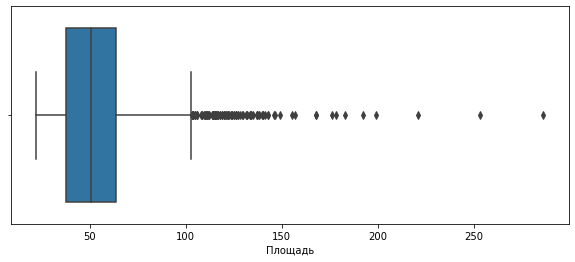

In [126]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df['Площадь'])

In [127]:
# Найдем границы выбросов
df_s=df['Площадь']
df_s=df_s.sort_values()
#print(df_price)

# Межквартильный размах
iqr=(df_s.quantile(q=0.75)-df_s.quantile(q=0.25))*1.5
print(iqr)

# Расчитываем границы выбросов
q1=df_s.quantile(q=0.25)-iqr
print(q1)
q2=df_s.quantile(q=0.75)+iqr
print(q2)

39.0
-1.0
103.0


In [128]:
# Исключаем выбросы
df_i = df.loc[df['Площадь'] < 120]
df_i = df.loc[df['Цена(руб.)'] < 8400000]

In [129]:
df_i

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,Кирпичный,Старой постройки,1,5,первый,2150000,71666.666667,1-комнатная квартира в Советском районе. Площа...,Ремонт не требуется,Совмещенный
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,Кирпичный,Очень старой постройки,1,3,первый,1200000,36144.578313,Продам однокомнатную квартиру. Две железные дв...,Ремонт не требуется,Совмещенный
2,1,"Томская область, Томск, АРЗ мкр, Кольцевой, 4","Кольцевой, 4",Кольцевой,Окраина города,32.0,Кирпичный,Старой постройки,1,5,первый,1250000,39062.500000,Продается уютная 1к квартира в 5ти этажном кир...,Ремонт не требуется,Совмещенный
3,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,Кирпичный,Очень старой постройки,1,2,первый,1550000,47839.506173,Предлагаем однокомнатную квартиру. Тихие сосед...,Ремонт не требуется,Совмещенный
4,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,Кирпичный,Старой постройки,1,5,первый,1550000,51666.666667,Продается 1-комнатная квартира. В хорошем сост...,Ремонт не требуется,Совмещенный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,Панельный,Современной постройки,9,10,средний,3200000,81841.432225,Предлагается к продаже в новом развитом микрор...,Ремонт не требуется,Совмещенный
2536,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,Панельный,Современной постройки,20,21,средний,7750000,56569.343066,Продается квартира свободной планировки на Овр...,Без ремонта,Совмещенный
2537,1,"Томская область, Томск, Черемошники мкр, Больш...","Подгорная, 87блок5",Подгорная,Спальник новой постройки,30.0,Кирпичный,Современной постройки,5,17,средний,3000000,100000.000000,Продам светлые квартиры в центре города в ново...,Ремонт не требуется,Совмещенный
2538,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,Кирпичный,Современной постройки,10,14,средний,3300000,97058.823529,"Квартира в хорошем состоянии, есть большая гар...",Ремонт не требуется,Совмещенный


In [130]:
df_i=df_i.reset_index()
df_i=df_i.drop('index', axis=1)
df_i

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,Кирпичный,Старой постройки,1,5,первый,2150000,71666.666667,1-комнатная квартира в Советском районе. Площа...,Ремонт не требуется,Совмещенный
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,Кирпичный,Очень старой постройки,1,3,первый,1200000,36144.578313,Продам однокомнатную квартиру. Две железные дв...,Ремонт не требуется,Совмещенный
2,1,"Томская область, Томск, АРЗ мкр, Кольцевой, 4","Кольцевой, 4",Кольцевой,Окраина города,32.0,Кирпичный,Старой постройки,1,5,первый,1250000,39062.500000,Продается уютная 1к квартира в 5ти этажном кир...,Ремонт не требуется,Совмещенный
3,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,Кирпичный,Очень старой постройки,1,2,первый,1550000,47839.506173,Предлагаем однокомнатную квартиру. Тихие сосед...,Ремонт не требуется,Совмещенный
4,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,Кирпичный,Старой постройки,1,5,первый,1550000,51666.666667,Продается 1-комнатная квартира. В хорошем сост...,Ремонт не требуется,Совмещенный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,Панельный,Современной постройки,9,10,средний,3200000,81841.432225,Предлагается к продаже в новом развитом микрор...,Ремонт не требуется,Совмещенный
2364,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,Панельный,Современной постройки,20,21,средний,7750000,56569.343066,Продается квартира свободной планировки на Овр...,Без ремонта,Совмещенный
2365,1,"Томская область, Томск, Черемошники мкр, Больш...","Подгорная, 87блок5",Подгорная,Спальник новой постройки,30.0,Кирпичный,Современной постройки,5,17,средний,3000000,100000.000000,Продам светлые квартиры в центре города в ново...,Ремонт не требуется,Совмещенный
2366,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,Кирпичный,Современной постройки,10,14,средний,3300000,97058.823529,"Квартира в хорошем состоянии, есть большая гар...",Ремонт не требуется,Совмещенный


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Цена(руб.)'>

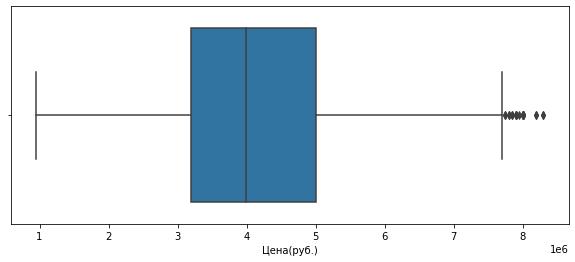

In [131]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_i['Цена(руб.)'])

In [132]:
#Преобразуем города координаты
#Название города должно быть точным, без ошибок, иначе координаты не будут найдены
from geopy.geocoders import Nominatim
from tqdm import tqdm

geolocator = Nominatim(user_agent="myapp")

loc = []
loc_sh = []
loc_d = []

for i in tqdm(range(len(df_i['Адрес'])), 'Обработанно'):
    try:
        location = geolocator.geocode(df_i['Адрес'][i])
        loc_1 = location.latitude  
        loc_2 = location.longitude
        
        loc.append(location)
        loc_sh.append(loc_1)
        loc_d.append(loc_2)
    except:
        location = 0
        loc_1 = 0
        loc_2 = 0
        
        loc.append(location)
        loc_sh.append(loc_1)
        loc_d.append(loc_2)
        continue

#loc_sh = pd.to_numeric(loc_sh) # переводим в число
#loc_d = pd.to_numeric(loc_d)

#print('Количество обработанных объявлений:', len(loc))
#print('Информация имеет вид:')
#loc_sh[0:5]

Обработанно:   0%|                                                                            | 0/2368 [00:00<?, ?it/s]

0


Обработанно:   0%|                                                                    | 1/2368 [00:00<11:52,  3.32it/s]

1


Обработанно:   0%|                                                                    | 2/2368 [00:00<16:26,  2.40it/s]

2


Обработанно:   0%|                                                                    | 3/2368 [00:01<17:29,  2.25it/s]

3


Обработанно:   0%|                                                                    | 4/2368 [00:01<18:26,  2.14it/s]

4


Обработанно:   0%|▏                                                                   | 5/2368 [00:02<18:51,  2.09it/s]

5


Обработанно:   0%|▏                                                                   | 6/2368 [00:02<19:14,  2.05it/s]

6


Обработанно:   0%|▏                                                                   | 7/2368 [00:03<19:27,  2.02it/s]

7


Обработанно:   0%|▏                                                                   | 8/2368 [00:03<19:24,  2.03it/s]

8


Обработанно:   0%|▎                                                                   | 9/2368 [00:04<19:36,  2.01it/s]

9


Обработанно:   0%|▎                                                                  | 10/2368 [00:04<19:30,  2.01it/s]

10


Обработанно:   0%|▎                                                                  | 11/2368 [00:05<19:21,  2.03it/s]

11


Обработанно:   1%|▎                                                                  | 12/2368 [00:05<19:20,  2.03it/s]

12


Обработанно:   1%|▎                                                                  | 13/2368 [00:06<19:45,  1.99it/s]

13


Обработанно:   1%|▍                                                                  | 14/2368 [00:06<19:52,  1.97it/s]

14


Обработанно:   1%|▍                                                                  | 15/2368 [00:07<19:29,  2.01it/s]

15


Обработанно:   1%|▍                                                                  | 16/2368 [00:07<19:20,  2.03it/s]

16


Обработанно:   1%|▍                                                                  | 17/2368 [00:08<19:30,  2.01it/s]

17


Обработанно:   1%|▌                                                                  | 18/2368 [00:08<19:37,  2.00it/s]

18


Обработанно:   1%|▌                                                                  | 19/2368 [00:09<19:24,  2.02it/s]

19


Обработанно:   1%|▌                                                                  | 20/2368 [00:09<20:06,  1.95it/s]

20


Обработанно:   1%|▌                                                                  | 21/2368 [00:10<19:36,  1.99it/s]

21


Обработанно:   1%|▌                                                                  | 22/2368 [00:10<19:41,  1.99it/s]

22


Обработанно:   1%|▋                                                                  | 23/2368 [00:11<19:31,  2.00it/s]

23


Обработанно:   1%|▋                                                                  | 24/2368 [00:11<19:31,  2.00it/s]

24


Обработанно:   1%|▋                                                                  | 25/2368 [00:12<19:22,  2.01it/s]

25


Обработанно:   1%|▋                                                                  | 26/2368 [00:12<19:18,  2.02it/s]

26


Обработанно:   1%|▊                                                                  | 27/2368 [00:13<19:34,  1.99it/s]

27


Обработанно:   1%|▊                                                                  | 28/2368 [00:13<19:31,  2.00it/s]

28


Обработанно:   1%|▊                                                                  | 29/2368 [00:14<19:49,  1.97it/s]

29


Обработанно:   1%|▊                                                                  | 30/2368 [00:14<19:26,  2.00it/s]

30


Обработанно:   1%|▉                                                                  | 31/2368 [00:15<19:41,  1.98it/s]

31


Обработанно:   1%|▉                                                                  | 32/2368 [00:15<21:22,  1.82it/s]

32


Обработанно:   1%|▉                                                                  | 33/2368 [00:16<18:44,  2.08it/s]

33


Обработанно:   1%|▉                                                                  | 34/2368 [00:16<18:56,  2.05it/s]

34


Обработанно:   1%|▉                                                                  | 35/2368 [00:17<19:18,  2.01it/s]

35


Обработанно:   2%|█                                                                  | 36/2368 [00:17<19:43,  1.97it/s]

36


Обработанно:   2%|█                                                                  | 37/2368 [00:18<18:48,  2.07it/s]

37


Обработанно:   2%|█                                                                  | 38/2368 [00:18<19:08,  2.03it/s]

38


Обработанно:   2%|█                                                                  | 39/2368 [00:19<19:15,  2.01it/s]

39


Обработанно:   2%|█▏                                                                 | 40/2368 [00:19<19:15,  2.01it/s]

40


Обработанно:   2%|█▏                                                                 | 41/2368 [00:20<19:41,  1.97it/s]

41


Обработанно:   2%|█▏                                                                 | 42/2368 [00:20<19:26,  1.99it/s]

42


Обработанно:   2%|█▏                                                                 | 43/2368 [00:21<19:39,  1.97it/s]

43


Обработанно:   2%|█▏                                                                 | 44/2368 [00:21<19:52,  1.95it/s]

44


Обработанно:   2%|█▎                                                                 | 45/2368 [00:22<21:48,  1.78it/s]

45


Обработанно:   2%|█▎                                                                 | 46/2368 [00:22<18:02,  2.15it/s]

46


Обработанно:   2%|█▎                                                                 | 47/2368 [00:23<18:33,  2.08it/s]

47


Обработанно:   2%|█▎                                                                 | 48/2368 [00:23<18:47,  2.06it/s]

48


Обработанно:   2%|█▍                                                                 | 49/2368 [00:24<18:52,  2.05it/s]

49


Обработанно:   2%|█▍                                                                 | 50/2368 [00:24<19:02,  2.03it/s]

50


Обработанно:   2%|█▍                                                                 | 51/2368 [00:25<19:20,  2.00it/s]

51


Обработанно:   2%|█▍                                                                 | 52/2368 [00:25<19:10,  2.01it/s]

52


Обработанно:   2%|█▍                                                                 | 53/2368 [00:26<19:26,  1.98it/s]

53


Обработанно:   2%|█▌                                                                 | 54/2368 [00:26<19:26,  1.98it/s]

54


Обработанно:   2%|█▌                                                                 | 55/2368 [00:27<18:58,  2.03it/s]

55


Обработанно:   2%|█▌                                                                 | 56/2368 [00:27<18:56,  2.03it/s]

56


Обработанно:   2%|█▌                                                                 | 57/2368 [00:28<19:17,  2.00it/s]

57


Обработанно:   2%|█▋                                                                 | 58/2368 [00:28<19:20,  1.99it/s]

58


Обработанно:   2%|█▋                                                                 | 59/2368 [00:29<18:55,  2.03it/s]

59


Обработанно:   3%|█▋                                                                 | 60/2368 [00:29<19:58,  1.93it/s]

60


Обработанно:   3%|█▋                                                                 | 61/2368 [00:30<19:02,  2.02it/s]

61


Обработанно:   3%|█▊                                                                 | 62/2368 [00:30<19:04,  2.02it/s]

62


Обработанно:   3%|█▊                                                                 | 63/2368 [00:31<18:56,  2.03it/s]

63


Обработанно:   3%|█▊                                                                 | 64/2368 [00:31<19:06,  2.01it/s]

64


Обработанно:   3%|█▊                                                                 | 65/2368 [00:32<19:19,  1.99it/s]

65


Обработанно:   3%|█▊                                                                 | 66/2368 [00:32<19:10,  2.00it/s]

66


Обработанно:   3%|█▉                                                                 | 67/2368 [00:33<18:44,  2.05it/s]

67


Обработанно:   3%|█▉                                                                 | 68/2368 [00:33<19:21,  1.98it/s]

68


Обработанно:   3%|█▉                                                                 | 69/2368 [00:34<21:50,  1.75it/s]

69


Обработанно:   3%|█▉                                                                 | 70/2368 [00:34<18:27,  2.08it/s]

70


Обработанно:   3%|██                                                                 | 71/2368 [00:35<18:50,  2.03it/s]

71


Обработанно:   3%|██                                                                 | 72/2368 [00:35<18:39,  2.05it/s]

72


Обработанно:   3%|██                                                                 | 73/2368 [00:36<18:56,  2.02it/s]

73


Обработанно:   3%|██                                                                 | 74/2368 [00:36<19:23,  1.97it/s]

74


Обработанно:   3%|██                                                                 | 75/2368 [00:37<18:53,  2.02it/s]

75


Обработанно:   3%|██▏                                                                | 76/2368 [00:37<19:09,  1.99it/s]

76


Обработанно:   3%|██▏                                                                | 77/2368 [00:38<18:34,  2.06it/s]

77


Обработанно:   3%|██▏                                                                | 78/2368 [00:38<18:53,  2.02it/s]

78


Обработанно:   3%|██▏                                                                | 79/2368 [00:39<19:36,  1.95it/s]

79


Обработанно:   3%|██▎                                                                | 80/2368 [00:39<18:35,  2.05it/s]

80


Обработанно:   3%|██▎                                                                | 81/2368 [00:40<19:18,  1.97it/s]

81


Обработанно:   3%|██▎                                                                | 82/2368 [00:40<18:43,  2.04it/s]

82


Обработанно:   4%|██▎                                                                | 83/2368 [00:41<19:05,  1.99it/s]

83


Обработанно:   4%|██▍                                                                | 85/2368 [00:42<17:43,  2.15it/s]

84
85


Обработанно:   4%|██▍                                                                | 86/2368 [00:42<18:08,  2.10it/s]

86


Обработанно:   4%|██▍                                                                | 87/2368 [00:43<18:36,  2.04it/s]

87


Обработанно:   4%|██▍                                                                | 88/2368 [00:43<18:34,  2.05it/s]

88


Обработанно:   4%|██▌                                                                | 89/2368 [00:44<18:57,  2.00it/s]

89


Обработанно:   4%|██▌                                                                | 90/2368 [00:44<18:55,  2.01it/s]

90


Обработанно:   4%|██▌                                                                | 91/2368 [00:45<20:15,  1.87it/s]

91


Обработанно:   4%|██▌                                                                | 92/2368 [00:45<18:15,  2.08it/s]

92


Обработанно:   4%|██▋                                                                | 93/2368 [00:46<18:23,  2.06it/s]

93


Обработанно:   4%|██▋                                                                | 94/2368 [00:46<18:32,  2.04it/s]

94


Обработанно:   4%|██▋                                                                | 95/2368 [00:47<19:31,  1.94it/s]

95


Обработанно:   4%|██▋                                                                | 96/2368 [00:47<18:34,  2.04it/s]

96


Обработанно:   4%|██▋                                                                | 97/2368 [00:48<19:13,  1.97it/s]

97


Обработанно:   4%|██▊                                                                | 98/2368 [00:48<19:03,  1.98it/s]

98


Обработанно:   4%|██▊                                                                | 99/2368 [00:49<19:20,  1.96it/s]

99


Обработанно:   4%|██▊                                                               | 100/2368 [00:49<19:04,  1.98it/s]

100


Обработанно:   4%|██▊                                                               | 101/2368 [00:50<18:36,  2.03it/s]

101


Обработанно:   4%|██▊                                                               | 102/2368 [00:50<19:13,  1.96it/s]

102


Обработанно:   4%|██▊                                                               | 103/2368 [00:51<18:39,  2.02it/s]

103


Обработанно:   4%|██▉                                                               | 104/2368 [00:51<18:22,  2.05it/s]

104


Обработанно:   4%|██▉                                                               | 105/2368 [00:52<19:14,  1.96it/s]

105


Обработанно:   4%|██▉                                                               | 106/2368 [00:52<18:35,  2.03it/s]

106


Обработанно:   5%|██▉                                                               | 107/2368 [00:53<18:23,  2.05it/s]

107


Обработанно:   5%|███                                                               | 108/2368 [00:53<18:26,  2.04it/s]

108


Обработанно:   5%|███                                                               | 109/2368 [00:54<18:38,  2.02it/s]

109


Обработанно:   5%|███                                                               | 110/2368 [00:54<18:43,  2.01it/s]

110


Обработанно:   5%|███                                                               | 111/2368 [00:55<18:47,  2.00it/s]

111


Обработанно:   5%|███                                                               | 112/2368 [00:55<18:52,  1.99it/s]

112


Обработанно:   5%|███▏                                                              | 113/2368 [00:56<18:41,  2.01it/s]

113


Обработанно:   5%|███▏                                                              | 114/2368 [00:56<18:39,  2.01it/s]

114


Обработанно:   5%|███▏                                                              | 115/2368 [00:57<18:59,  1.98it/s]

115


Обработанно:   5%|███▏                                                              | 116/2368 [00:57<18:36,  2.02it/s]

116


Обработанно:   5%|███▎                                                              | 117/2368 [00:58<18:54,  1.98it/s]

117


Обработанно:   5%|███▎                                                              | 118/2368 [00:58<18:35,  2.02it/s]

118


Обработанно:   5%|███▎                                                              | 119/2368 [00:59<19:56,  1.88it/s]

119


Обработанно:   5%|███▎                                                              | 120/2368 [00:59<18:48,  1.99it/s]

120


Обработанно:   5%|███▎                                                              | 121/2368 [01:00<19:53,  1.88it/s]

121


Обработанно:   5%|███▍                                                              | 122/2368 [01:00<18:09,  2.06it/s]

122


Обработанно:   5%|███▍                                                              | 123/2368 [01:01<19:18,  1.94it/s]

123


Обработанно:   5%|███▍                                                              | 124/2368 [01:01<18:22,  2.03it/s]

124


Обработанно:   5%|███▍                                                              | 125/2368 [01:02<19:22,  1.93it/s]

125


Обработанно:   5%|███▌                                                              | 126/2368 [01:02<18:05,  2.07it/s]

126


Обработанно:   5%|███▌                                                              | 127/2368 [01:03<17:58,  2.08it/s]

127


Обработанно:   5%|███▌                                                              | 128/2368 [01:03<18:33,  2.01it/s]

128


Обработанно:   5%|███▌                                                              | 129/2368 [01:04<18:20,  2.03it/s]

129


Обработанно:   5%|███▌                                                              | 130/2368 [01:04<18:40,  2.00it/s]

130


Обработанно:   6%|███▋                                                              | 131/2368 [01:05<19:01,  1.96it/s]

131


Обработанно:   6%|███▋                                                              | 132/2368 [01:05<18:35,  2.00it/s]

132


Обработанно:   6%|███▋                                                              | 133/2368 [01:06<18:14,  2.04it/s]

133


Обработанно:   6%|███▋                                                              | 134/2368 [01:06<18:30,  2.01it/s]

134


Обработанно:   6%|███▊                                                              | 135/2368 [01:07<19:12,  1.94it/s]

135


Обработанно:   6%|███▊                                                              | 136/2368 [01:07<18:01,  2.06it/s]

136


Обработанно:   6%|███▊                                                              | 137/2368 [01:08<18:38,  1.99it/s]

137


Обработанно:   6%|███▊                                                              | 138/2368 [01:08<18:32,  2.00it/s]

138


Обработанно:   6%|███▊                                                              | 139/2368 [01:09<18:51,  1.97it/s]

139


Обработанно:   6%|███▉                                                              | 140/2368 [01:09<19:04,  1.95it/s]

140


Обработанно:   6%|███▉                                                              | 141/2368 [01:10<18:07,  2.05it/s]

141


Обработанно:   6%|███▉                                                              | 142/2368 [01:10<18:05,  2.05it/s]

142


Обработанно:   6%|███▉                                                              | 143/2368 [01:11<18:24,  2.01it/s]

143


Обработанно:   6%|████                                                              | 144/2368 [01:11<18:10,  2.04it/s]

144


Обработанно:   6%|████                                                              | 145/2368 [01:12<18:17,  2.03it/s]

145


Обработанно:   6%|████                                                              | 146/2368 [01:12<18:21,  2.02it/s]

146


Обработанно:   6%|████                                                              | 147/2368 [01:13<18:24,  2.01it/s]

147


Обработанно:   6%|████▏                                                             | 148/2368 [01:13<18:23,  2.01it/s]

148


Обработанно:   6%|████▏                                                             | 149/2368 [01:14<18:26,  2.01it/s]

149


Обработанно:   6%|████▏                                                             | 150/2368 [01:14<18:36,  1.99it/s]

150


Обработанно:   6%|████▏                                                             | 151/2368 [01:15<18:26,  2.00it/s]

151


Обработанно:   6%|████▏                                                             | 152/2368 [01:15<18:17,  2.02it/s]

152


Обработанно:   6%|████▎                                                             | 153/2368 [01:16<18:42,  1.97it/s]

153


Обработанно:   7%|████▎                                                             | 154/2368 [01:16<19:45,  1.87it/s]

154


Обработанно:   7%|████▎                                                             | 155/2368 [01:17<18:01,  2.05it/s]

155


Обработанно:   7%|████▎                                                             | 156/2368 [01:17<18:32,  1.99it/s]

156


Обработанно:   7%|████▍                                                             | 157/2368 [01:18<18:22,  2.00it/s]

157


Обработанно:   7%|████▍                                                             | 158/2368 [01:18<18:16,  2.02it/s]

158


Обработанно:   7%|████▍                                                             | 159/2368 [01:19<18:44,  1.96it/s]

159


Обработанно:   7%|████▍                                                             | 160/2368 [01:19<18:16,  2.01it/s]

160


Обработанно:   7%|████▍                                                             | 161/2368 [01:20<20:52,  1.76it/s]

161


Обработанно:   7%|████▌                                                             | 162/2368 [01:21<20:15,  1.81it/s]

162


Обработанно:   7%|████▌                                                             | 163/2368 [01:21<17:11,  2.14it/s]

163


Обработанно:   7%|████▌                                                             | 164/2368 [01:22<20:08,  1.82it/s]

164


Обработанно:   7%|████▌                                                             | 165/2368 [01:22<17:10,  2.14it/s]

165


Обработанно:   7%|████▋                                                             | 166/2368 [01:22<16:48,  2.18it/s]

166


Обработанно:   7%|████▋                                                             | 167/2368 [01:23<17:29,  2.10it/s]

167


Обработанно:   7%|████▋                                                             | 168/2368 [01:23<17:45,  2.06it/s]

168


Обработанно:   7%|████▋                                                             | 169/2368 [01:24<18:02,  2.03it/s]

169


Обработанно:   7%|████▋                                                             | 170/2368 [01:24<17:54,  2.05it/s]

170


Обработанно:   7%|████▊                                                             | 171/2368 [01:25<18:05,  2.02it/s]

171


Обработанно:   7%|████▊                                                             | 172/2368 [01:25<18:08,  2.02it/s]

172


Обработанно:   7%|████▊                                                             | 173/2368 [01:26<18:14,  2.01it/s]

173


Обработанно:   7%|████▊                                                             | 174/2368 [01:26<18:38,  1.96it/s]

174


Обработанно:   7%|████▉                                                             | 175/2368 [01:27<18:13,  2.01it/s]

175


Обработанно:   7%|████▉                                                             | 176/2368 [01:27<18:06,  2.02it/s]

176


Обработанно:   7%|████▉                                                             | 177/2368 [01:28<17:59,  2.03it/s]

177


Обработанно:   8%|████▉                                                             | 178/2368 [01:28<18:15,  2.00it/s]

178


Обработанно:   8%|████▉                                                             | 179/2368 [01:29<18:16,  2.00it/s]

179


Обработанно:   8%|█████                                                             | 180/2368 [01:29<18:12,  2.00it/s]

180


Обработанно:   8%|█████                                                             | 181/2368 [01:30<18:07,  2.01it/s]

181


Обработанно:   8%|█████                                                             | 182/2368 [01:30<18:08,  2.01it/s]

182


Обработанно:   8%|█████                                                             | 183/2368 [01:31<18:09,  2.01it/s]

183


Обработанно:   8%|█████▏                                                            | 184/2368 [01:31<18:07,  2.01it/s]

184


Обработанно:   8%|█████▏                                                            | 185/2368 [01:32<18:13,  2.00it/s]

185


Обработанно:   8%|█████▏                                                            | 186/2368 [01:32<18:06,  2.01it/s]

186


Обработанно:   8%|█████▏                                                            | 187/2368 [01:33<18:07,  2.00it/s]

187


Обработанно:   8%|█████▏                                                            | 188/2368 [01:33<18:20,  1.98it/s]

188


Обработанно:   8%|█████▎                                                            | 189/2368 [01:34<17:57,  2.02it/s]

189


Обработанно:   8%|█████▎                                                            | 190/2368 [01:34<18:15,  1.99it/s]

190


Обработанно:   8%|█████▎                                                            | 191/2368 [01:35<18:51,  1.92it/s]

191


Обработанно:   8%|█████▎                                                            | 192/2368 [01:35<18:28,  1.96it/s]

192


Обработанно:   8%|█████▍                                                            | 193/2368 [01:36<17:53,  2.03it/s]

193


Обработанно:   8%|█████▍                                                            | 194/2368 [01:36<18:17,  1.98it/s]

194


Обработанно:   8%|█████▍                                                            | 195/2368 [01:37<17:39,  2.05it/s]

195


Обработанно:   8%|█████▍                                                            | 196/2368 [01:37<18:10,  1.99it/s]

196


Обработанно:   8%|█████▍                                                            | 197/2368 [01:38<17:51,  2.03it/s]

197


Обработанно:   8%|█████▌                                                            | 198/2368 [01:38<17:55,  2.02it/s]

198


Обработанно:   8%|█████▌                                                            | 199/2368 [01:39<18:20,  1.97it/s]

199


Обработанно:   8%|█████▌                                                            | 200/2368 [01:39<17:33,  2.06it/s]

200


Обработанно:   8%|█████▌                                                            | 201/2368 [01:40<18:14,  1.98it/s]

201


Обработанно:   9%|█████▋                                                            | 202/2368 [01:40<17:59,  2.01it/s]

202


Обработанно:   9%|█████▋                                                            | 203/2368 [01:41<17:59,  2.00it/s]

203


Обработанно:   9%|█████▋                                                            | 204/2368 [01:41<17:56,  2.01it/s]

204


Обработанно:   9%|█████▋                                                            | 205/2368 [01:42<17:54,  2.01it/s]

205


Обработанно:   9%|█████▋                                                            | 206/2368 [01:42<18:01,  2.00it/s]

206


Обработанно:   9%|█████▊                                                            | 207/2368 [01:43<17:52,  2.02it/s]

207


Обработанно:   9%|█████▊                                                            | 208/2368 [01:43<18:03,  1.99it/s]

208


Обработанно:   9%|█████▊                                                            | 209/2368 [01:44<17:55,  2.01it/s]

209


Обработанно:   9%|█████▊                                                            | 210/2368 [01:44<18:12,  1.97it/s]

210


Обработанно:   9%|█████▉                                                            | 211/2368 [01:45<18:46,  1.91it/s]

211


Обработанно:   9%|█████▉                                                            | 212/2368 [01:45<17:54,  2.01it/s]

212


Обработанно:   9%|█████▉                                                            | 213/2368 [01:46<17:58,  2.00it/s]

213


Обработанно:   9%|█████▉                                                            | 214/2368 [01:46<17:48,  2.02it/s]

214


Обработанно:   9%|█████▉                                                            | 215/2368 [01:47<18:01,  1.99it/s]

215


Обработанно:   9%|██████                                                            | 216/2368 [01:47<18:06,  1.98it/s]

216


Обработанно:   9%|██████                                                            | 217/2368 [01:48<17:40,  2.03it/s]

217


Обработанно:   9%|██████                                                            | 218/2368 [01:48<19:15,  1.86it/s]

218


Обработанно:   9%|██████                                                            | 219/2368 [01:49<18:17,  1.96it/s]

219


Обработанно:   9%|██████▏                                                           | 220/2368 [01:49<17:06,  2.09it/s]

220


Обработанно:   9%|██████▏                                                           | 221/2368 [01:50<17:26,  2.05it/s]

221


Обработанно:   9%|██████▏                                                           | 222/2368 [01:50<17:31,  2.04it/s]

222


Обработанно:   9%|██████▏                                                           | 223/2368 [01:51<17:34,  2.03it/s]

223


Обработанно:   9%|██████▏                                                           | 224/2368 [01:51<17:54,  1.99it/s]

224


Обработанно:  10%|██████▎                                                           | 225/2368 [01:52<17:50,  2.00it/s]

225


Обработанно:  10%|██████▎                                                           | 226/2368 [01:52<17:42,  2.02it/s]

226


Обработанно:  10%|██████▎                                                           | 227/2368 [01:53<17:42,  2.02it/s]

227


Обработанно:  10%|██████▎                                                           | 228/2368 [01:53<17:50,  2.00it/s]

228


Обработанно:  10%|██████▍                                                           | 229/2368 [01:54<17:51,  2.00it/s]

229


Обработанно:  10%|██████▍                                                           | 230/2368 [01:54<18:04,  1.97it/s]

230


Обработанно:  10%|██████▍                                                           | 231/2368 [01:55<17:42,  2.01it/s]

231


Обработанно:  10%|██████▍                                                           | 232/2368 [01:55<17:32,  2.03it/s]

232


Обработанно:  10%|██████▍                                                           | 233/2368 [01:56<17:45,  2.00it/s]

233


Обработанно:  10%|██████▌                                                           | 234/2368 [01:56<17:43,  2.01it/s]

234


Обработанно:  10%|██████▌                                                           | 235/2368 [01:57<17:52,  1.99it/s]

235


Обработанно:  10%|██████▌                                                           | 236/2368 [01:57<17:39,  2.01it/s]

236


Обработанно:  10%|██████▌                                                           | 237/2368 [01:58<17:42,  2.01it/s]

237


Обработанно:  10%|██████▋                                                           | 238/2368 [01:58<17:50,  1.99it/s]

238


Обработанно:  10%|██████▋                                                           | 239/2368 [01:59<17:56,  1.98it/s]

239


Обработанно:  10%|██████▋                                                           | 240/2368 [01:59<17:39,  2.01it/s]

240


Обработанно:  10%|██████▋                                                           | 241/2368 [02:00<17:39,  2.01it/s]

241


Обработанно:  10%|██████▋                                                           | 242/2368 [02:00<17:51,  1.98it/s]

242


Обработанно:  10%|██████▊                                                           | 243/2368 [02:01<20:24,  1.74it/s]

243


Обработанно:  10%|██████▊                                                           | 244/2368 [02:01<16:46,  2.11it/s]

244


Обработанно:  10%|██████▊                                                           | 245/2368 [02:02<17:49,  1.98it/s]

245


Обработанно:  10%|██████▊                                                           | 246/2368 [02:02<17:09,  2.06it/s]

246


Обработанно:  10%|██████▉                                                           | 247/2368 [02:03<17:03,  2.07it/s]

247


Обработанно:  10%|██████▉                                                           | 248/2368 [02:03<17:02,  2.07it/s]

248


Обработанно:  11%|██████▉                                                           | 249/2368 [02:04<17:31,  2.01it/s]

249


Обработанно:  11%|██████▉                                                           | 250/2368 [02:04<17:26,  2.02it/s]

250


Обработанно:  11%|██████▉                                                           | 251/2368 [02:05<18:33,  1.90it/s]

251


Обработанно:  11%|███████                                                           | 252/2368 [02:05<17:17,  2.04it/s]

252


Обработанно:  11%|███████                                                           | 253/2368 [02:06<17:52,  1.97it/s]

253


Обработанно:  11%|███████                                                           | 254/2368 [02:06<17:14,  2.04it/s]

254


Обработанно:  11%|███████                                                           | 255/2368 [02:07<17:27,  2.02it/s]

255


Обработанно:  11%|███████▏                                                          | 256/2368 [02:07<18:18,  1.92it/s]

256


Обработанно:  11%|███████▏                                                          | 257/2368 [02:08<17:19,  2.03it/s]

257


Обработанно:  11%|███████▏                                                          | 258/2368 [02:08<17:45,  1.98it/s]

258


Обработанно:  11%|███████▏                                                          | 259/2368 [02:09<18:14,  1.93it/s]

259


Обработанно:  11%|███████▏                                                          | 260/2368 [02:09<17:02,  2.06it/s]

260


Обработанно:  11%|███████▎                                                          | 261/2368 [02:10<17:27,  2.01it/s]

261


Обработанно:  11%|███████▎                                                          | 262/2368 [02:10<17:12,  2.04it/s]

262


Обработанно:  11%|███████▎                                                          | 263/2368 [02:11<17:25,  2.01it/s]

263


Обработанно:  11%|███████▎                                                          | 264/2368 [02:11<17:27,  2.01it/s]

264


Обработанно:  11%|███████▍                                                          | 265/2368 [02:12<17:29,  2.00it/s]

265


Обработанно:  11%|███████▍                                                          | 266/2368 [02:12<17:25,  2.01it/s]

266


Обработанно:  11%|███████▍                                                          | 267/2368 [02:13<17:43,  1.98it/s]

267


Обработанно:  11%|███████▍                                                          | 268/2368 [02:13<17:42,  1.98it/s]

268


Обработанно:  11%|███████▍                                                          | 269/2368 [02:14<17:02,  2.05it/s]

269


Обработанно:  11%|███████▌                                                          | 270/2368 [02:14<17:41,  1.98it/s]

270


Обработанно:  11%|███████▌                                                          | 271/2368 [02:15<17:14,  2.03it/s]

271


Обработанно:  11%|███████▌                                                          | 272/2368 [02:15<17:33,  1.99it/s]

272


Обработанно:  12%|███████▌                                                          | 273/2368 [02:16<18:00,  1.94it/s]

273


Обработанно:  12%|███████▋                                                          | 274/2368 [02:16<17:18,  2.02it/s]

274


Обработанно:  12%|███████▋                                                          | 275/2368 [02:17<17:28,  2.00it/s]

275


Обработанно:  12%|███████▋                                                          | 276/2368 [02:17<17:17,  2.02it/s]

276


Обработанно:  12%|███████▋                                                          | 277/2368 [02:18<19:36,  1.78it/s]

277


Обработанно:  12%|███████▋                                                          | 278/2368 [02:18<16:44,  2.08it/s]

278


Обработанно:  12%|███████▊                                                          | 279/2368 [02:19<16:55,  2.06it/s]

279


Обработанно:  12%|███████▊                                                          | 280/2368 [02:19<17:14,  2.02it/s]

280


Обработанно:  12%|███████▊                                                          | 281/2368 [02:20<17:07,  2.03it/s]

281


Обработанно:  12%|███████▊                                                          | 282/2368 [02:20<17:06,  2.03it/s]

282


Обработанно:  12%|███████▉                                                          | 283/2368 [02:21<17:10,  2.02it/s]

283


Обработанно:  12%|███████▉                                                          | 284/2368 [02:21<17:33,  1.98it/s]

284


Обработанно:  12%|███████▉                                                          | 285/2368 [02:22<17:20,  2.00it/s]

285


Обработанно:  12%|███████▉                                                          | 286/2368 [02:22<17:14,  2.01it/s]

286


Обработанно:  12%|███████▉                                                          | 287/2368 [02:23<18:24,  1.88it/s]

287


Обработанно:  12%|████████                                                          | 288/2368 [02:23<16:46,  2.07it/s]

288


Обработанно:  12%|████████                                                          | 289/2368 [02:24<17:42,  1.96it/s]

289


Обработанно:  12%|████████                                                          | 290/2368 [02:24<17:13,  2.01it/s]

290


Обработанно:  12%|████████                                                          | 291/2368 [02:25<16:38,  2.08it/s]

291


Обработанно:  12%|████████▏                                                         | 292/2368 [02:25<16:49,  2.06it/s]

292


Обработанно:  12%|████████▏                                                         | 293/2368 [02:26<19:52,  1.74it/s]

293


Обработанно:  12%|████████▏                                                         | 294/2368 [02:26<16:09,  2.14it/s]

294


Обработанно:  12%|████████▏                                                         | 295/2368 [02:27<16:42,  2.07it/s]

295


Обработанно:  12%|████████▎                                                         | 296/2368 [02:27<16:54,  2.04it/s]

296


Обработанно:  13%|████████▎                                                         | 297/2368 [02:28<16:54,  2.04it/s]

297


Обработанно:  13%|████████▎                                                         | 298/2368 [02:28<16:57,  2.04it/s]

298


Обработанно:  13%|████████▎                                                         | 299/2368 [02:29<16:57,  2.03it/s]

299


Обработанно:  13%|████████▎                                                         | 300/2368 [02:29<17:22,  1.98it/s]

300


Обработанно:  13%|████████▍                                                         | 301/2368 [02:30<17:25,  1.98it/s]

301


Обработанно:  13%|████████▍                                                         | 302/2368 [02:30<17:06,  2.01it/s]

302


Обработанно:  13%|████████▍                                                         | 303/2368 [02:31<17:27,  1.97it/s]

303


Обработанно:  13%|████████▍                                                         | 304/2368 [02:31<17:06,  2.01it/s]

304


Обработанно:  13%|████████▌                                                         | 305/2368 [02:32<17:08,  2.01it/s]

305


Обработанно:  13%|████████▌                                                         | 306/2368 [02:32<16:56,  2.03it/s]

306


Обработанно:  13%|████████▌                                                         | 307/2368 [02:33<17:49,  1.93it/s]

307


Обработанно:  13%|████████▌                                                         | 308/2368 [02:33<17:12,  1.99it/s]

308


Обработанно:  13%|████████▌                                                         | 309/2368 [02:34<16:55,  2.03it/s]

309


Обработанно:  13%|████████▋                                                         | 310/2368 [02:34<17:28,  1.96it/s]

310


Обработанно:  13%|████████▋                                                         | 311/2368 [02:35<16:59,  2.02it/s]

311


Обработанно:  13%|████████▋                                                         | 312/2368 [02:35<17:05,  2.00it/s]

312


Обработанно:  13%|████████▋                                                         | 313/2368 [02:36<16:49,  2.04it/s]

313


Обработанно:  13%|████████▊                                                         | 314/2368 [02:36<16:58,  2.02it/s]

314


Обработанно:  13%|████████▊                                                         | 315/2368 [02:37<17:53,  1.91it/s]

315


Обработанно:  13%|████████▊                                                         | 316/2368 [02:37<16:31,  2.07it/s]

316


Обработанно:  13%|████████▊                                                         | 317/2368 [02:38<16:58,  2.01it/s]

317


Обработанно:  13%|████████▊                                                         | 318/2368 [02:38<16:53,  2.02it/s]

318


Обработанно:  13%|████████▉                                                         | 319/2368 [02:39<16:58,  2.01it/s]

319


Обработанно:  14%|████████▉                                                         | 320/2368 [02:39<17:25,  1.96it/s]

320


Обработанно:  14%|████████▉                                                         | 321/2368 [02:40<16:50,  2.03it/s]

321


Обработанно:  14%|████████▉                                                         | 322/2368 [02:40<16:49,  2.03it/s]

322


Обработанно:  14%|█████████                                                         | 323/2368 [02:41<16:47,  2.03it/s]

323


Обработанно:  14%|█████████                                                         | 324/2368 [02:41<17:05,  1.99it/s]

324


Обработанно:  14%|█████████                                                         | 325/2368 [02:42<16:57,  2.01it/s]

325


Обработанно:  14%|█████████                                                         | 326/2368 [02:42<17:19,  1.96it/s]

326


Обработанно:  14%|█████████                                                         | 327/2368 [02:43<16:45,  2.03it/s]

327


Обработанно:  14%|█████████▏                                                        | 328/2368 [02:43<17:31,  1.94it/s]

328


Обработанно:  14%|█████████▏                                                        | 329/2368 [02:44<16:43,  2.03it/s]

329


Обработанно:  14%|█████████▏                                                        | 330/2368 [02:44<16:56,  2.01it/s]

330


Обработанно:  14%|█████████▏                                                        | 331/2368 [02:45<16:47,  2.02it/s]

331


Обработанно:  14%|█████████▎                                                        | 332/2368 [02:45<17:11,  1.97it/s]

332


Обработанно:  14%|█████████▎                                                        | 333/2368 [02:46<16:58,  2.00it/s]

333


Обработанно:  14%|█████████▎                                                        | 334/2368 [02:46<17:00,  1.99it/s]

334


Обработанно:  14%|█████████▎                                                        | 335/2368 [02:47<16:51,  2.01it/s]

335


Обработанно:  14%|█████████▎                                                        | 336/2368 [02:47<18:13,  1.86it/s]

336


Обработанно:  14%|█████████▍                                                        | 337/2368 [02:48<16:40,  2.03it/s]

337


Обработанно:  14%|█████████▍                                                        | 338/2368 [02:48<16:40,  2.03it/s]

338


Обработанно:  14%|█████████▍                                                        | 339/2368 [02:49<16:33,  2.04it/s]

339


Обработанно:  14%|█████████▍                                                        | 340/2368 [02:49<17:02,  1.98it/s]

340


Обработанно:  14%|█████████▌                                                        | 341/2368 [02:50<19:10,  1.76it/s]

341


Обработанно:  14%|█████████▌                                                        | 342/2368 [02:50<16:05,  2.10it/s]

342


Обработанно:  14%|█████████▌                                                        | 343/2368 [02:51<16:41,  2.02it/s]

343


Обработанно:  15%|█████████▌                                                        | 344/2368 [02:51<16:22,  2.06it/s]

344


Обработанно:  15%|█████████▌                                                        | 345/2368 [02:52<16:13,  2.08it/s]

345


Обработанно:  15%|█████████▋                                                        | 346/2368 [02:52<16:45,  2.01it/s]

346


Обработанно:  15%|█████████▋                                                        | 347/2368 [02:53<16:36,  2.03it/s]

347


Обработанно:  15%|█████████▋                                                        | 348/2368 [02:53<16:28,  2.04it/s]

348


Обработанно:  15%|█████████▋                                                        | 349/2368 [02:54<16:55,  1.99it/s]

349


Обработанно:  15%|█████████▊                                                        | 350/2368 [02:54<16:51,  1.99it/s]

350


Обработанно:  15%|█████████▊                                                        | 351/2368 [02:55<16:39,  2.02it/s]

351


Обработанно:  15%|█████████▊                                                        | 352/2368 [02:55<16:52,  1.99it/s]

352


Обработанно:  15%|█████████▊                                                        | 353/2368 [02:56<17:01,  1.97it/s]

353


Обработанно:  15%|█████████▊                                                        | 354/2368 [02:56<16:27,  2.04it/s]

354


Обработанно:  15%|█████████▉                                                        | 355/2368 [02:57<17:01,  1.97it/s]

355


Обработанно:  15%|█████████▉                                                        | 356/2368 [02:57<16:55,  1.98it/s]

356


Обработанно:  15%|█████████▉                                                        | 357/2368 [02:58<16:40,  2.01it/s]

357


Обработанно:  15%|█████████▉                                                        | 358/2368 [02:58<16:39,  2.01it/s]

358


Обработанно:  15%|██████████                                                        | 359/2368 [02:59<17:46,  1.88it/s]

359


Обработанно:  15%|██████████                                                        | 360/2368 [02:59<16:18,  2.05it/s]

360


Обработанно:  15%|██████████                                                        | 361/2368 [03:00<16:30,  2.03it/s]

361


Обработанно:  15%|██████████                                                        | 362/2368 [03:00<16:26,  2.03it/s]

362


Обработанно:  15%|██████████                                                        | 363/2368 [03:01<18:09,  1.84it/s]

363


Обработанно:  15%|██████████▏                                                       | 364/2368 [03:01<16:08,  2.07it/s]

364


Обработанно:  15%|██████████▏                                                       | 365/2368 [03:02<17:41,  1.89it/s]

365


Обработанно:  15%|██████████▏                                                       | 366/2368 [03:02<17:02,  1.96it/s]

366


Обработанно:  15%|██████████▏                                                       | 367/2368 [03:03<16:02,  2.08it/s]

367


Обработанно:  16%|██████████▎                                                       | 368/2368 [03:03<16:33,  2.01it/s]

368


Обработанно:  16%|██████████▎                                                       | 369/2368 [03:04<16:07,  2.07it/s]

369


Обработанно:  16%|██████████▎                                                       | 370/2368 [03:04<16:03,  2.07it/s]

370


Обработанно:  16%|██████████▎                                                       | 371/2368 [03:05<16:56,  1.96it/s]

371


Обработанно:  16%|██████████▎                                                       | 372/2368 [03:05<16:18,  2.04it/s]

372


Обработанно:  16%|██████████▍                                                       | 373/2368 [03:06<16:55,  1.96it/s]

373


Обработанно:  16%|██████████▍                                                       | 374/2368 [03:06<16:19,  2.03it/s]

374


Обработанно:  16%|██████████▍                                                       | 375/2368 [03:07<18:42,  1.78it/s]

375


Обработанно:  16%|██████████▍                                                       | 376/2368 [03:07<15:48,  2.10it/s]

376


Обработанно:  16%|██████████▌                                                       | 377/2368 [03:08<16:02,  2.07it/s]

377


Обработанно:  16%|██████████▌                                                       | 378/2368 [03:08<16:44,  1.98it/s]

378


Обработанно:  16%|██████████▌                                                       | 379/2368 [03:09<16:55,  1.96it/s]

379


Обработанно:  16%|██████████▌                                                       | 380/2368 [03:09<15:53,  2.08it/s]

380


Обработанно:  16%|██████████▌                                                       | 381/2368 [03:10<16:22,  2.02it/s]

381


Обработанно:  16%|██████████▋                                                       | 382/2368 [03:10<16:06,  2.05it/s]

382


Обработанно:  16%|██████████▋                                                       | 383/2368 [03:11<16:38,  1.99it/s]

383


Обработанно:  16%|██████████▋                                                       | 384/2368 [03:11<16:44,  1.98it/s]

384


Обработанно:  16%|██████████▋                                                       | 385/2368 [03:12<15:58,  2.07it/s]

385


Обработанно:  16%|██████████▊                                                       | 386/2368 [03:12<16:20,  2.02it/s]

386


Обработанно:  16%|██████████▊                                                       | 387/2368 [03:13<16:28,  2.00it/s]

387


Обработанно:  16%|██████████▊                                                       | 388/2368 [03:13<16:58,  1.94it/s]

388


Обработанно:  16%|██████████▊                                                       | 389/2368 [03:14<16:06,  2.05it/s]

389


Обработанно:  16%|██████████▊                                                       | 390/2368 [03:14<16:25,  2.01it/s]

390


Обработанно:  17%|██████████▉                                                       | 391/2368 [03:15<16:31,  1.99it/s]

391


Обработанно:  17%|██████████▉                                                       | 392/2368 [03:15<16:31,  1.99it/s]

392


Обработанно:  17%|██████████▉                                                       | 393/2368 [03:16<16:30,  1.99it/s]

393


Обработанно:  17%|██████████▉                                                       | 394/2368 [03:16<16:00,  2.06it/s]

394


Обработанно:  17%|███████████                                                       | 395/2368 [03:17<16:34,  1.98it/s]

395


Обработанно:  17%|███████████                                                       | 396/2368 [03:17<16:32,  1.99it/s]

396


Обработанно:  17%|███████████                                                       | 397/2368 [03:18<16:12,  2.03it/s]

397


Обработанно:  17%|███████████                                                       | 398/2368 [03:18<16:25,  2.00it/s]

398


Обработанно:  17%|███████████                                                       | 399/2368 [03:19<16:53,  1.94it/s]

399


Обработанно:  17%|███████████▏                                                      | 400/2368 [03:19<16:10,  2.03it/s]

400


Обработанно:  17%|███████████▏                                                      | 401/2368 [03:20<16:43,  1.96it/s]

401


Обработанно:  17%|███████████▏                                                      | 402/2368 [03:20<16:15,  2.02it/s]

402


Обработанно:  17%|███████████▏                                                      | 403/2368 [03:21<15:54,  2.06it/s]

403


Обработанно:  17%|███████████▎                                                      | 404/2368 [03:21<16:07,  2.03it/s]

404


Обработанно:  17%|███████████▎                                                      | 405/2368 [03:22<16:14,  2.01it/s]

405


Обработанно:  17%|███████████▎                                                      | 406/2368 [03:22<16:53,  1.94it/s]

406


Обработанно:  17%|███████████▎                                                      | 407/2368 [03:23<16:17,  2.01it/s]

407


Обработанно:  17%|███████████▎                                                      | 408/2368 [03:23<16:24,  1.99it/s]

408


Обработанно:  17%|███████████▍                                                      | 409/2368 [03:24<16:14,  2.01it/s]

409


Обработанно:  17%|███████████▍                                                      | 410/2368 [03:24<16:10,  2.02it/s]

410


Обработанно:  17%|███████████▍                                                      | 411/2368 [03:25<16:32,  1.97it/s]

411


Обработанно:  17%|███████████▍                                                      | 412/2368 [03:25<16:22,  1.99it/s]

412


Обработанно:  17%|███████████▌                                                      | 413/2368 [03:26<16:32,  1.97it/s]

413


Обработанно:  17%|███████████▌                                                      | 414/2368 [03:26<16:23,  1.99it/s]

414


Обработанно:  18%|███████████▌                                                      | 415/2368 [03:27<15:59,  2.04it/s]

415


Обработанно:  18%|███████████▌                                                      | 416/2368 [03:27<16:06,  2.02it/s]

416


Обработанно:  18%|███████████▌                                                      | 417/2368 [03:28<16:36,  1.96it/s]

417


Обработанно:  18%|███████████▋                                                      | 418/2368 [03:28<16:16,  2.00it/s]

418


Обработанно:  18%|███████████▋                                                      | 419/2368 [03:29<16:03,  2.02it/s]

419


Обработанно:  18%|███████████▋                                                      | 420/2368 [03:29<16:03,  2.02it/s]

420


Обработанно:  18%|███████████▋                                                      | 421/2368 [03:30<16:23,  1.98it/s]

421


Обработанно:  18%|███████████▊                                                      | 422/2368 [03:30<16:05,  2.01it/s]

422


Обработанно:  18%|███████████▊                                                      | 423/2368 [03:31<15:54,  2.04it/s]

423


Обработанно:  18%|███████████▊                                                      | 424/2368 [03:31<16:26,  1.97it/s]

424


Обработанно:  18%|███████████▊                                                      | 425/2368 [03:32<16:26,  1.97it/s]

425


Обработанно:  18%|███████████▊                                                      | 426/2368 [03:32<16:00,  2.02it/s]

426


Обработанно:  18%|███████████▉                                                      | 427/2368 [03:33<15:59,  2.02it/s]

427


Обработанно:  18%|███████████▉                                                      | 428/2368 [03:33<16:01,  2.02it/s]

428


Обработанно:  18%|███████████▉                                                      | 429/2368 [03:34<16:32,  1.95it/s]

429


Обработанно:  18%|███████████▉                                                      | 430/2368 [03:34<16:20,  1.98it/s]

430


Обработанно:  18%|████████████                                                      | 431/2368 [03:35<16:09,  2.00it/s]

431


Обработанно:  18%|████████████                                                      | 432/2368 [03:35<15:49,  2.04it/s]

432


Обработанно:  18%|████████████                                                      | 433/2368 [03:36<16:14,  1.99it/s]

433


Обработанно:  18%|████████████                                                      | 434/2368 [03:36<16:15,  1.98it/s]

434


Обработанно:  18%|████████████                                                      | 435/2368 [03:37<16:07,  2.00it/s]

435


Обработанно:  18%|████████████▏                                                     | 436/2368 [03:37<15:39,  2.06it/s]

436


Обработанно:  18%|████████████▏                                                     | 437/2368 [03:38<18:30,  1.74it/s]

437


Обработанно:  18%|████████████▏                                                     | 438/2368 [03:38<15:25,  2.09it/s]

438


Обработанно:  19%|████████████▏                                                     | 439/2368 [03:39<15:41,  2.05it/s]

439


Обработанно:  19%|████████████▎                                                     | 440/2368 [03:39<15:31,  2.07it/s]

440


Обработанно:  19%|████████████▎                                                     | 441/2368 [03:40<15:42,  2.04it/s]

441


Обработанно:  19%|████████████▎                                                     | 442/2368 [03:40<15:50,  2.03it/s]

442


Обработанно:  19%|████████████▎                                                     | 443/2368 [03:41<16:08,  1.99it/s]

443


Обработанно:  19%|████████████▍                                                     | 444/2368 [03:41<15:55,  2.01it/s]

444


Обработанно:  19%|████████████▍                                                     | 445/2368 [03:42<18:19,  1.75it/s]

445


Обработанно:  19%|████████████▍                                                     | 446/2368 [03:42<15:06,  2.12it/s]

446


Обработанно:  19%|████████████▍                                                     | 447/2368 [03:43<15:14,  2.10it/s]

447


Обработанно:  19%|████████████▍                                                     | 448/2368 [03:43<15:58,  2.00it/s]

448


Обработанно:  19%|████████████▌                                                     | 449/2368 [03:44<15:43,  2.03it/s]

449


Обработанно:  19%|████████████▌                                                     | 450/2368 [03:44<15:44,  2.03it/s]

450


Обработанно:  19%|████████████▌                                                     | 451/2368 [03:45<17:37,  1.81it/s]

451


Обработанно:  19%|████████████▌                                                     | 452/2368 [03:45<15:15,  2.09it/s]

452


Обработанно:  19%|████████████▋                                                     | 453/2368 [03:46<15:22,  2.08it/s]

453


Обработанно:  19%|████████████▋                                                     | 454/2368 [03:46<15:37,  2.04it/s]

454


Обработанно:  19%|████████████▋                                                     | 455/2368 [03:47<15:33,  2.05it/s]

455


Обработанно:  19%|████████████▋                                                     | 456/2368 [03:47<15:48,  2.02it/s]

456


Обработанно:  19%|████████████▋                                                     | 457/2368 [03:48<15:41,  2.03it/s]

457


Обработанно:  19%|████████████▊                                                     | 458/2368 [03:48<16:33,  1.92it/s]

458


Обработанно:  19%|████████████▊                                                     | 459/2368 [03:49<16:04,  1.98it/s]

459


Обработанно:  19%|████████████▊                                                     | 460/2368 [03:49<15:30,  2.05it/s]

460


Обработанно:  19%|████████████▊                                                     | 461/2368 [03:50<16:09,  1.97it/s]

461


Обработанно:  20%|████████████▉                                                     | 462/2368 [03:50<15:56,  1.99it/s]

462


Обработанно:  20%|████████████▉                                                     | 463/2368 [03:51<15:46,  2.01it/s]

463


Обработанно:  20%|████████████▉                                                     | 464/2368 [03:51<15:37,  2.03it/s]

464


Обработанно:  20%|████████████▉                                                     | 465/2368 [03:52<16:05,  1.97it/s]

465


Обработанно:  20%|████████████▉                                                     | 466/2368 [03:52<15:54,  1.99it/s]

466


Обработанно:  20%|█████████████                                                     | 467/2368 [03:53<15:41,  2.02it/s]

467


Обработанно:  20%|█████████████                                                     | 468/2368 [03:53<15:50,  2.00it/s]

468


Обработанно:  20%|█████████████                                                     | 469/2368 [03:54<15:55,  1.99it/s]

469


Обработанно:  20%|█████████████                                                     | 470/2368 [03:54<15:31,  2.04it/s]

470


Обработанно:  20%|█████████████▏                                                    | 471/2368 [03:55<16:16,  1.94it/s]

471


Обработанно:  20%|█████████████▏                                                    | 472/2368 [03:55<15:33,  2.03it/s]

472


Обработанно:  20%|█████████████▏                                                    | 473/2368 [03:56<15:48,  2.00it/s]

473


Обработанно:  20%|█████████████▏                                                    | 474/2368 [03:56<17:34,  1.80it/s]

474


Обработанно:  20%|█████████████▏                                                    | 475/2368 [03:57<15:23,  2.05it/s]

475


Обработанно:  20%|█████████████▎                                                    | 476/2368 [03:57<15:43,  2.00it/s]

476


Обработанно:  20%|█████████████▎                                                    | 477/2368 [03:58<15:03,  2.09it/s]

477


Обработанно:  20%|█████████████▎                                                    | 478/2368 [03:58<15:39,  2.01it/s]

478


Обработанно:  20%|█████████████▎                                                    | 479/2368 [03:59<15:41,  2.01it/s]

479


Обработанно:  20%|█████████████▍                                                    | 480/2368 [03:59<15:37,  2.01it/s]

480


Обработанно:  20%|█████████████▍                                                    | 481/2368 [04:00<15:17,  2.06it/s]

481


Обработанно:  20%|█████████████▍                                                    | 482/2368 [04:00<15:29,  2.03it/s]

482


Обработанно:  20%|█████████████▍                                                    | 483/2368 [04:01<16:05,  1.95it/s]

483


Обработанно:  20%|█████████████▍                                                    | 484/2368 [04:01<16:02,  1.96it/s]

484


Обработанно:  20%|█████████████▌                                                    | 485/2368 [04:02<15:56,  1.97it/s]

485


Обработанно:  21%|█████████████▌                                                    | 486/2368 [04:02<15:17,  2.05it/s]

486


Обработанно:  21%|█████████████▌                                                    | 487/2368 [04:03<15:12,  2.06it/s]

487


Обработанно:  21%|█████████████▌                                                    | 488/2368 [04:03<15:22,  2.04it/s]

488


Обработанно:  21%|█████████████▋                                                    | 489/2368 [04:04<15:46,  1.99it/s]

489


Обработанно:  21%|█████████████▋                                                    | 490/2368 [04:04<15:30,  2.02it/s]

490


Обработанно:  21%|█████████████▋                                                    | 491/2368 [04:05<15:36,  2.01it/s]

491


Обработанно:  21%|█████████████▋                                                    | 492/2368 [04:05<15:38,  2.00it/s]

492


Обработанно:  21%|█████████████▋                                                    | 493/2368 [04:06<15:58,  1.96it/s]

493


Обработанно:  21%|█████████████▊                                                    | 494/2368 [04:06<15:43,  1.99it/s]

494


Обработанно:  21%|█████████████▊                                                    | 495/2368 [04:07<16:12,  1.93it/s]

495


Обработанно:  21%|█████████████▊                                                    | 496/2368 [04:07<15:25,  2.02it/s]

496


Обработанно:  21%|█████████████▊                                                    | 497/2368 [04:08<15:22,  2.03it/s]

497


Обработанно:  21%|█████████████▉                                                    | 498/2368 [04:08<16:37,  1.87it/s]

498


Обработанно:  21%|█████████████▉                                                    | 499/2368 [04:09<14:59,  2.08it/s]

499


Обработанно:  21%|█████████████▉                                                    | 500/2368 [04:09<15:19,  2.03it/s]

500


Обработанно:  21%|█████████████▉                                                    | 501/2368 [04:10<15:03,  2.07it/s]

501


Обработанно:  21%|█████████████▉                                                    | 502/2368 [04:10<15:37,  1.99it/s]

502


Обработанно:  21%|██████████████                                                    | 503/2368 [04:11<15:15,  2.04it/s]

503


Обработанно:  21%|██████████████                                                    | 504/2368 [04:11<15:31,  2.00it/s]

504


Обработанно:  21%|██████████████                                                    | 505/2368 [04:12<15:15,  2.04it/s]

505


Обработанно:  21%|██████████████                                                    | 506/2368 [04:12<15:27,  2.01it/s]

506


Обработанно:  21%|██████████████▏                                                   | 507/2368 [04:13<15:29,  2.00it/s]

507


Обработанно:  21%|██████████████▏                                                   | 508/2368 [04:13<15:43,  1.97it/s]

508


Обработанно:  21%|██████████████▏                                                   | 509/2368 [04:14<15:17,  2.03it/s]

509


Обработанно:  22%|██████████████▏                                                   | 510/2368 [04:14<15:36,  1.98it/s]

510


Обработанно:  22%|██████████████▏                                                   | 511/2368 [04:15<15:45,  1.96it/s]

511


Обработанно:  22%|██████████████▎                                                   | 512/2368 [04:15<15:34,  1.99it/s]

512


Обработанно:  22%|██████████████▎                                                   | 513/2368 [04:16<17:38,  1.75it/s]

513


Обработанно:  22%|██████████████▎                                                   | 514/2368 [04:16<14:41,  2.10it/s]

514


Обработанно:  22%|██████████████▎                                                   | 515/2368 [04:17<14:42,  2.10it/s]

515


Обработанно:  22%|██████████████▍                                                   | 516/2368 [04:17<15:12,  2.03it/s]

516


Обработанно:  22%|██████████████▍                                                   | 517/2368 [04:18<15:04,  2.05it/s]

517


Обработанно:  22%|██████████████▍                                                   | 518/2368 [04:18<16:03,  1.92it/s]

518


Обработанно:  22%|██████████████▍                                                   | 519/2368 [04:19<15:14,  2.02it/s]

519


Обработанно:  22%|██████████████▍                                                   | 520/2368 [04:19<15:51,  1.94it/s]

520


Обработанно:  22%|██████████████▌                                                   | 521/2368 [04:20<14:58,  2.06it/s]

521


Обработанно:  22%|██████████████▌                                                   | 522/2368 [04:20<15:02,  2.05it/s]

522


Обработанно:  22%|██████████████▌                                                   | 523/2368 [04:21<15:10,  2.03it/s]

523


Обработанно:  22%|██████████████▌                                                   | 524/2368 [04:21<15:24,  2.00it/s]

524


Обработанно:  22%|██████████████▋                                                   | 525/2368 [04:22<15:15,  2.01it/s]

525


Обработанно:  22%|██████████████▋                                                   | 526/2368 [04:22<15:30,  1.98it/s]

526


Обработанно:  22%|██████████████▋                                                   | 527/2368 [04:23<15:08,  2.03it/s]

527


Обработанно:  22%|██████████████▋                                                   | 528/2368 [04:23<15:26,  1.99it/s]

528


Обработанно:  22%|██████████████▋                                                   | 529/2368 [04:24<16:16,  1.88it/s]

529


Обработанно:  22%|██████████████▊                                                   | 530/2368 [04:24<14:43,  2.08it/s]

530


Обработанно:  22%|██████████████▊                                                   | 531/2368 [04:25<14:57,  2.05it/s]

531


Обработанно:  22%|██████████████▊                                                   | 532/2368 [04:25<15:00,  2.04it/s]

532


Обработанно:  23%|██████████████▊                                                   | 533/2368 [04:26<15:06,  2.02it/s]

533


Обработанно:  23%|██████████████▉                                                   | 534/2368 [04:26<15:37,  1.96it/s]

534


Обработанно:  23%|██████████████▉                                                   | 535/2368 [04:27<15:36,  1.96it/s]

535


Обработанно:  23%|██████████████▉                                                   | 536/2368 [04:27<14:49,  2.06it/s]

536


Обработанно:  23%|██████████████▉                                                   | 537/2368 [04:28<15:08,  2.01it/s]

537


Обработанно:  23%|██████████████▉                                                   | 538/2368 [04:28<15:05,  2.02it/s]

538


Обработанно:  23%|███████████████                                                   | 539/2368 [04:29<15:11,  2.01it/s]

539


Обработанно:  23%|███████████████                                                   | 540/2368 [04:29<15:11,  2.00it/s]

540


Обработанно:  23%|███████████████                                                   | 541/2368 [04:30<15:33,  1.96it/s]

541


Обработанно:  23%|███████████████                                                   | 542/2368 [04:30<15:07,  2.01it/s]

542


Обработанно:  23%|███████████████▏                                                  | 543/2368 [04:31<15:35,  1.95it/s]

543


Обработанно:  23%|███████████████▏                                                  | 544/2368 [04:31<14:53,  2.04it/s]

544


Обработанно:  23%|███████████████▏                                                  | 545/2368 [04:32<15:15,  1.99it/s]

545


Обработанно:  23%|███████████████▏                                                  | 546/2368 [04:32<14:58,  2.03it/s]

546


Обработанно:  23%|███████████████▏                                                  | 547/2368 [04:33<14:47,  2.05it/s]

547


Обработанно:  23%|███████████████▎                                                  | 548/2368 [04:33<15:10,  2.00it/s]

548


Обработанно:  23%|███████████████▎                                                  | 549/2368 [04:34<15:14,  1.99it/s]

549


Обработанно:  23%|███████████████▎                                                  | 550/2368 [04:34<15:09,  2.00it/s]

550


Обработанно:  23%|███████████████▎                                                  | 551/2368 [04:35<15:25,  1.96it/s]

551


Обработанно:  23%|███████████████▍                                                  | 552/2368 [04:35<16:50,  1.80it/s]

552


Обработанно:  23%|███████████████▍                                                  | 553/2368 [04:36<14:40,  2.06it/s]

553


Обработанно:  23%|███████████████▍                                                  | 554/2368 [04:36<14:37,  2.07it/s]

554


Обработанно:  23%|███████████████▍                                                  | 555/2368 [04:37<14:53,  2.03it/s]

555


Обработанно:  23%|███████████████▍                                                  | 556/2368 [04:37<15:05,  2.00it/s]

556


Обработанно:  24%|███████████████▌                                                  | 557/2368 [04:38<14:48,  2.04it/s]

557


Обработанно:  24%|███████████████▌                                                  | 558/2368 [04:38<15:04,  2.00it/s]

558


Обработанно:  24%|███████████████▌                                                  | 559/2368 [04:39<15:14,  1.98it/s]

559


Обработанно:  24%|███████████████▌                                                  | 560/2368 [04:39<15:10,  1.99it/s]

560


Обработанно:  24%|███████████████▋                                                  | 561/2368 [04:40<14:48,  2.03it/s]

561


Обработанно:  24%|███████████████▋                                                  | 562/2368 [04:40<14:54,  2.02it/s]

562


Обработанно:  24%|███████████████▋                                                  | 563/2368 [04:41<15:05,  1.99it/s]

563


Обработанно:  24%|███████████████▋                                                  | 564/2368 [04:41<15:10,  1.98it/s]

564


Обработанно:  24%|███████████████▋                                                  | 565/2368 [04:42<14:47,  2.03it/s]

565


Обработанно:  24%|███████████████▊                                                  | 566/2368 [04:42<14:40,  2.05it/s]

566


Обработанно:  24%|███████████████▊                                                  | 567/2368 [04:43<15:19,  1.96it/s]

567


Обработанно:  24%|███████████████▊                                                  | 568/2368 [04:43<15:26,  1.94it/s]

568


Обработанно:  24%|███████████████▊                                                  | 569/2368 [04:44<14:42,  2.04it/s]

569


Обработанно:  24%|███████████████▉                                                  | 570/2368 [04:44<15:06,  1.98it/s]

570


Обработанно:  24%|███████████████▉                                                  | 571/2368 [04:45<14:53,  2.01it/s]

571


Обработанно:  24%|███████████████▉                                                  | 572/2368 [04:45<14:52,  2.01it/s]

572


Обработанно:  24%|███████████████▉                                                  | 573/2368 [04:46<14:42,  2.03it/s]

573


Обработанно:  24%|███████████████▉                                                  | 574/2368 [04:46<14:43,  2.03it/s]

574


Обработанно:  24%|████████████████                                                  | 575/2368 [04:47<15:00,  1.99it/s]

575


Обработанно:  24%|████████████████                                                  | 576/2368 [04:47<14:47,  2.02it/s]

576


Обработанно:  24%|████████████████                                                  | 577/2368 [04:48<14:56,  2.00it/s]

577


Обработанно:  24%|████████████████                                                  | 578/2368 [04:48<15:01,  1.99it/s]

578


Обработанно:  24%|████████████████▏                                                 | 579/2368 [04:49<15:10,  1.96it/s]

579


Обработанно:  24%|████████████████▏                                                 | 580/2368 [04:49<14:47,  2.01it/s]

580


Обработанно:  25%|████████████████▏                                                 | 581/2368 [04:50<14:40,  2.03it/s]

581


Обработанно:  25%|████████████████▏                                                 | 582/2368 [04:50<14:50,  2.01it/s]

582


Обработанно:  25%|████████████████▏                                                 | 583/2368 [04:51<15:43,  1.89it/s]

583


Обработанно:  25%|████████████████▎                                                 | 584/2368 [04:51<14:44,  2.02it/s]

584


Обработанно:  25%|████████████████▎                                                 | 585/2368 [04:52<14:42,  2.02it/s]

585


Обработанно:  25%|████████████████▎                                                 | 586/2368 [04:52<14:43,  2.02it/s]

586


Обработанно:  25%|████████████████▎                                                 | 587/2368 [04:53<14:41,  2.02it/s]

587


Обработанно:  25%|████████████████▍                                                 | 588/2368 [04:53<14:38,  2.03it/s]

588


Обработанно:  25%|████████████████▍                                                 | 589/2368 [04:54<14:59,  1.98it/s]

589


Обработанно:  25%|████████████████▍                                                 | 590/2368 [04:54<15:55,  1.86it/s]

590


Обработанно:  25%|████████████████▍                                                 | 591/2368 [04:55<14:47,  2.00it/s]

591


Обработанно:  25%|████████████████▌                                                 | 592/2368 [04:56<16:35,  1.78it/s]

592


Обработанно:  25%|████████████████▌                                                 | 593/2368 [04:56<14:05,  2.10it/s]

593


Обработанно:  25%|████████████████▌                                                 | 594/2368 [04:56<14:02,  2.11it/s]

594


Обработанно:  25%|████████████████▌                                                 | 595/2368 [04:57<14:25,  2.05it/s]

595


Обработанно:  25%|████████████████▌                                                 | 596/2368 [04:57<14:37,  2.02it/s]

596


Обработанно:  25%|████████████████▋                                                 | 597/2368 [04:58<14:27,  2.04it/s]

597


Обработанно:  25%|████████████████▋                                                 | 598/2368 [04:58<15:08,  1.95it/s]

598


Обработанно:  25%|████████████████▋                                                 | 599/2368 [04:59<15:38,  1.88it/s]

599


Обработанно:  25%|████████████████▋                                                 | 600/2368 [04:59<14:30,  2.03it/s]

600


Обработанно:  25%|████████████████▊                                                 | 601/2368 [05:00<16:05,  1.83it/s]

601


Обработанно:  25%|████████████████▊                                                 | 602/2368 [05:00<13:53,  2.12it/s]

602


Обработанно:  25%|████████████████▊                                                 | 603/2368 [05:01<14:48,  1.99it/s]

603


Обработанно:  26%|████████████████▊                                                 | 604/2368 [05:01<13:55,  2.11it/s]

604


Обработанно:  26%|████████████████▊                                                 | 605/2368 [05:02<15:15,  1.92it/s]

605


Обработанно:  26%|████████████████▉                                                 | 606/2368 [05:02<15:02,  1.95it/s]

606


Обработанно:  26%|████████████████▉                                                 | 607/2368 [05:03<13:49,  2.12it/s]

607


Обработанно:  26%|████████████████▉                                                 | 608/2368 [05:03<14:14,  2.06it/s]

608


Обработанно:  26%|████████████████▉                                                 | 609/2368 [05:04<14:32,  2.02it/s]

609


Обработанно:  26%|█████████████████                                                 | 610/2368 [05:04<14:32,  2.02it/s]

610


Обработанно:  26%|█████████████████                                                 | 611/2368 [05:05<14:24,  2.03it/s]

611


Обработанно:  26%|█████████████████                                                 | 612/2368 [05:05<14:31,  2.01it/s]

612


Обработанно:  26%|█████████████████                                                 | 613/2368 [05:06<14:22,  2.03it/s]

613


Обработанно:  26%|█████████████████                                                 | 614/2368 [05:06<14:16,  2.05it/s]

614


Обработанно:  26%|█████████████████▏                                                | 615/2368 [05:07<14:26,  2.02it/s]

615


Обработанно:  26%|█████████████████▏                                                | 616/2368 [05:07<14:53,  1.96it/s]

616


Обработанно:  26%|█████████████████▏                                                | 617/2368 [05:08<14:26,  2.02it/s]

617


Обработанно:  26%|█████████████████▏                                                | 618/2368 [05:08<14:40,  1.99it/s]

618


Обработанно:  26%|█████████████████▎                                                | 619/2368 [05:09<14:32,  2.01it/s]

619


Обработанно:  26%|█████████████████▎                                                | 620/2368 [05:09<14:59,  1.94it/s]

620


Обработанно:  26%|█████████████████▎                                                | 621/2368 [05:10<14:17,  2.04it/s]

621


Обработанно:  26%|█████████████████▎                                                | 622/2368 [05:10<14:22,  2.02it/s]

622


Обработанно:  26%|█████████████████▎                                                | 623/2368 [05:11<14:24,  2.02it/s]

623


Обработанно:  26%|█████████████████▍                                                | 624/2368 [05:11<14:32,  2.00it/s]

624


Обработанно:  26%|█████████████████▍                                                | 625/2368 [05:12<14:32,  2.00it/s]

625


Обработанно:  26%|█████████████████▍                                                | 626/2368 [05:12<14:23,  2.02it/s]

626


Обработанно:  26%|█████████████████▍                                                | 627/2368 [05:13<14:20,  2.02it/s]

627


Обработанно:  27%|█████████████████▌                                                | 628/2368 [05:13<16:25,  1.77it/s]

628


Обработанно:  27%|█████████████████▌                                                | 629/2368 [05:14<13:49,  2.10it/s]

629


Обработанно:  27%|█████████████████▌                                                | 630/2368 [05:14<14:03,  2.06it/s]

630


Обработанно:  27%|█████████████████▌                                                | 631/2368 [05:15<14:06,  2.05it/s]

631


Обработанно:  27%|█████████████████▌                                                | 632/2368 [05:15<14:11,  2.04it/s]

632


Обработанно:  27%|█████████████████▋                                                | 633/2368 [05:16<14:27,  2.00it/s]

633


Обработанно:  27%|█████████████████▋                                                | 634/2368 [05:16<14:23,  2.01it/s]

634


Обработанно:  27%|█████████████████▋                                                | 635/2368 [05:17<14:49,  1.95it/s]

635


Обработанно:  27%|█████████████████▋                                                | 636/2368 [05:17<14:11,  2.03it/s]

636


Обработанно:  27%|█████████████████▊                                                | 637/2368 [05:18<14:49,  1.95it/s]

637


Обработанно:  27%|█████████████████▊                                                | 638/2368 [05:18<15:39,  1.84it/s]

638


Обработанно:  27%|█████████████████▊                                                | 639/2368 [05:19<14:24,  2.00it/s]

639


Обработанно:  27%|█████████████████▊                                                | 640/2368 [05:19<14:11,  2.03it/s]

640


Обработанно:  27%|█████████████████▊                                                | 641/2368 [05:20<14:05,  2.04it/s]

641


Обработанно:  27%|█████████████████▉                                                | 642/2368 [05:20<13:57,  2.06it/s]

642


Обработанно:  27%|█████████████████▉                                                | 643/2368 [05:21<14:03,  2.05it/s]

643


Обработанно:  27%|█████████████████▉                                                | 644/2368 [05:21<14:24,  1.99it/s]

644


Обработанно:  27%|█████████████████▉                                                | 645/2368 [05:22<14:36,  1.96it/s]

645


Обработанно:  27%|██████████████████                                                | 646/2368 [05:22<14:09,  2.03it/s]

646


Обработанно:  27%|██████████████████                                                | 647/2368 [05:23<14:35,  1.97it/s]

647


Обработанно:  27%|██████████████████                                                | 648/2368 [05:23<14:08,  2.03it/s]

648


Обработанно:  27%|██████████████████                                                | 649/2368 [05:24<14:05,  2.03it/s]

649


Обработанно:  27%|██████████████████                                                | 650/2368 [05:24<14:24,  1.99it/s]

650


Обработанно:  27%|██████████████████▏                                               | 651/2368 [05:25<14:25,  1.98it/s]

651


Обработанно:  28%|██████████████████▏                                               | 652/2368 [05:25<15:03,  1.90it/s]

652


Обработанно:  28%|██████████████████▏                                               | 653/2368 [05:26<14:00,  2.04it/s]

653


Обработанно:  28%|██████████████████▏                                               | 654/2368 [05:26<13:50,  2.06it/s]

654


Обработанно:  28%|██████████████████▎                                               | 655/2368 [05:27<14:03,  2.03it/s]

655


Обработанно:  28%|██████████████████▎                                               | 656/2368 [05:27<14:03,  2.03it/s]

656


Обработанно:  28%|██████████████████▎                                               | 657/2368 [05:28<14:42,  1.94it/s]

657


Обработанно:  28%|██████████████████▎                                               | 658/2368 [05:28<14:33,  1.96it/s]

658


Обработанно:  28%|██████████████████▎                                               | 659/2368 [05:29<13:58,  2.04it/s]

659


Обработанно:  28%|██████████████████▍                                               | 660/2368 [05:29<14:09,  2.01it/s]

660


Обработанно:  28%|██████████████████▍                                               | 661/2368 [05:30<13:50,  2.06it/s]

661


Обработанно:  28%|██████████████████▍                                               | 662/2368 [05:30<13:55,  2.04it/s]

662


Обработанно:  28%|██████████████████▍                                               | 663/2368 [05:31<14:51,  1.91it/s]

663


Обработанно:  28%|██████████████████▌                                               | 664/2368 [05:31<13:55,  2.04it/s]

664


Обработанно:  28%|██████████████████▌                                               | 665/2368 [05:32<14:03,  2.02it/s]

665


Обработанно:  28%|██████████████████▌                                               | 666/2368 [05:32<14:06,  2.01it/s]

666


Обработанно:  28%|██████████████████▌                                               | 667/2368 [05:33<13:58,  2.03it/s]

667


Обработанно:  28%|██████████████████▌                                               | 668/2368 [05:33<14:38,  1.93it/s]

668


Обработанно:  28%|██████████████████▋                                               | 669/2368 [05:34<14:22,  1.97it/s]

669


Обработанно:  28%|██████████████████▋                                               | 670/2368 [05:34<14:09,  2.00it/s]

670


Обработанно:  28%|██████████████████▋                                               | 671/2368 [05:35<14:05,  2.01it/s]

671


Обработанно:  28%|██████████████████▋                                               | 672/2368 [05:35<13:47,  2.05it/s]

672


Обработанно:  28%|██████████████████▊                                               | 673/2368 [05:36<14:30,  1.95it/s]

673


Обработанно:  28%|██████████████████▊                                               | 674/2368 [05:36<13:46,  2.05it/s]

674


Обработанно:  29%|██████████████████▊                                               | 675/2368 [05:37<14:50,  1.90it/s]

675


Обработанно:  29%|██████████████████▊                                               | 676/2368 [05:37<13:59,  2.02it/s]

676


Обработанно:  29%|██████████████████▊                                               | 677/2368 [05:38<13:47,  2.04it/s]

677


Обработанно:  29%|██████████████████▉                                               | 678/2368 [05:38<14:19,  1.97it/s]

678


Обработанно:  29%|██████████████████▉                                               | 679/2368 [05:39<14:22,  1.96it/s]

679


Обработанно:  29%|██████████████████▉                                               | 680/2368 [05:39<13:59,  2.01it/s]

680


Обработанно:  29%|██████████████████▉                                               | 681/2368 [05:40<13:55,  2.02it/s]

681


Обработанно:  29%|███████████████████                                               | 682/2368 [05:40<13:52,  2.03it/s]

682


Обработанно:  29%|███████████████████                                               | 683/2368 [05:41<13:44,  2.04it/s]

683


Обработанно:  29%|███████████████████                                               | 684/2368 [05:41<14:22,  1.95it/s]

684


Обработанно:  29%|███████████████████                                               | 685/2368 [05:42<14:09,  1.98it/s]

685


Обработанно:  29%|███████████████████                                               | 686/2368 [05:42<14:01,  2.00it/s]

686


Обработанно:  29%|███████████████████▏                                              | 687/2368 [05:43<13:53,  2.02it/s]

687


Обработанно:  29%|███████████████████▏                                              | 688/2368 [05:43<14:09,  1.98it/s]

688


Обработанно:  29%|███████████████████▏                                              | 689/2368 [05:44<13:58,  2.00it/s]

689


Обработанно:  29%|███████████████████▏                                              | 690/2368 [05:44<13:47,  2.03it/s]

690


Обработанно:  29%|███████████████████▎                                              | 691/2368 [05:45<13:52,  2.01it/s]

691


Обработанно:  29%|███████████████████▎                                              | 692/2368 [05:45<13:58,  2.00it/s]

692


Обработанно:  29%|███████████████████▎                                              | 693/2368 [05:46<14:21,  1.94it/s]

693


Обработанно:  29%|███████████████████▎                                              | 694/2368 [05:46<13:34,  2.06it/s]

694


Обработанно:  29%|███████████████████▎                                              | 695/2368 [05:47<13:46,  2.02it/s]

695


Обработанно:  29%|███████████████████▍                                              | 696/2368 [05:47<13:45,  2.03it/s]

696


Обработанно:  29%|███████████████████▍                                              | 697/2368 [05:48<13:48,  2.02it/s]

697


Обработанно:  29%|███████████████████▍                                              | 698/2368 [05:48<13:57,  1.99it/s]

698


Обработанно:  30%|███████████████████▍                                              | 699/2368 [05:49<13:54,  2.00it/s]

699


Обработанно:  30%|███████████████████▌                                              | 700/2368 [05:49<14:16,  1.95it/s]

700


Обработанно:  30%|███████████████████▌                                              | 701/2368 [05:50<13:48,  2.01it/s]

701


Обработанно:  30%|███████████████████▌                                              | 702/2368 [05:50<14:05,  1.97it/s]

702


Обработанно:  30%|███████████████████▌                                              | 703/2368 [05:51<13:39,  2.03it/s]

703


Обработанно:  30%|███████████████████▌                                              | 704/2368 [05:51<13:37,  2.04it/s]

704


Обработанно:  30%|███████████████████▋                                              | 705/2368 [05:52<14:24,  1.92it/s]

705


Обработанно:  30%|███████████████████▋                                              | 706/2368 [05:52<13:44,  2.02it/s]

706


Обработанно:  30%|███████████████████▋                                              | 707/2368 [05:53<13:46,  2.01it/s]

707


Обработанно:  30%|███████████████████▋                                              | 708/2368 [05:53<14:38,  1.89it/s]

708


Обработанно:  30%|███████████████████▊                                              | 709/2368 [05:54<13:24,  2.06it/s]

709


Обработанно:  30%|███████████████████▊                                              | 710/2368 [05:54<13:44,  2.01it/s]

710


Обработанно:  30%|███████████████████▊                                              | 711/2368 [05:55<13:38,  2.02it/s]

711


Обработанно:  30%|███████████████████▊                                              | 712/2368 [05:55<13:34,  2.03it/s]

712


Обработанно:  30%|███████████████████▊                                              | 713/2368 [05:56<13:32,  2.04it/s]

713


Обработанно:  30%|███████████████████▉                                              | 714/2368 [05:56<15:22,  1.79it/s]

714


Обработанно:  30%|███████████████████▉                                              | 715/2368 [05:57<13:35,  2.03it/s]

715


Обработанно:  30%|███████████████████▉                                              | 716/2368 [05:57<13:37,  2.02it/s]

716


Обработанно:  30%|███████████████████▉                                              | 717/2368 [05:58<13:16,  2.07it/s]

717


Обработанно:  30%|████████████████████                                              | 718/2368 [05:58<13:22,  2.06it/s]

718


Обработанно:  30%|████████████████████                                              | 719/2368 [05:59<13:28,  2.04it/s]

719


Обработанно:  30%|████████████████████                                              | 720/2368 [05:59<14:47,  1.86it/s]

720


Обработанно:  30%|████████████████████                                              | 721/2368 [06:00<13:46,  1.99it/s]

721


Обработанно:  30%|████████████████████                                              | 722/2368 [06:00<13:12,  2.08it/s]

722


Обработанно:  31%|████████████████████▏                                             | 723/2368 [06:01<13:30,  2.03it/s]

723


Обработанно:  31%|████████████████████▏                                             | 724/2368 [06:01<13:24,  2.04it/s]

724


Обработанно:  31%|████████████████████▏                                             | 725/2368 [06:02<13:28,  2.03it/s]

725


Обработанно:  31%|████████████████████▏                                             | 726/2368 [06:02<13:32,  2.02it/s]

726


Обработанно:  31%|████████████████████▎                                             | 727/2368 [06:03<13:55,  1.97it/s]

727


Обработанно:  31%|████████████████████▎                                             | 728/2368 [06:03<13:22,  2.04it/s]

728


Обработанно:  31%|████████████████████▎                                             | 729/2368 [06:04<13:55,  1.96it/s]

729


Обработанно:  31%|████████████████████▎                                             | 730/2368 [06:04<13:32,  2.02it/s]

730


Обработанно:  31%|████████████████████▎                                             | 731/2368 [06:05<13:25,  2.03it/s]

731


Обработанно:  31%|████████████████████▍                                             | 732/2368 [06:05<14:29,  1.88it/s]

732


Обработанно:  31%|████████████████████▍                                             | 733/2368 [06:06<13:22,  2.04it/s]

733


Обработанно:  31%|████████████████████▍                                             | 734/2368 [06:06<13:06,  2.08it/s]

734


Обработанно:  31%|████████████████████▍                                             | 735/2368 [06:10<40:39,  1.49s/it]

735


Обработанно:  31%|████████████████████▌                                             | 736/2368 [06:11<33:43,  1.24s/it]

736


Обработанно:  31%|████████████████████▌                                             | 737/2368 [06:11<27:06,  1.00it/s]

737


Обработанно:  31%|████████████████████▌                                             | 738/2368 [06:12<22:32,  1.21it/s]

738


Обработанно:  31%|████████████████████▌                                             | 739/2368 [06:12<19:57,  1.36it/s]

739


Обработанно:  31%|████████████████████▋                                             | 740/2368 [06:13<18:53,  1.44it/s]

740


Обработанно:  31%|████████████████████▋                                             | 741/2368 [06:13<16:37,  1.63it/s]

741


Обработанно:  31%|████████████████████▋                                             | 742/2368 [06:14<16:03,  1.69it/s]

742


Обработанно:  31%|████████████████████▋                                             | 743/2368 [06:14<14:36,  1.85it/s]

743


Обработанно:  31%|████████████████████▋                                             | 744/2368 [06:15<14:40,  1.84it/s]

744


Обработанно:  31%|████████████████████▊                                             | 745/2368 [06:15<14:13,  1.90it/s]

745


Обработанно:  32%|████████████████████▊                                             | 746/2368 [06:16<13:40,  1.98it/s]

746


Обработанно:  32%|████████████████████▊                                             | 747/2368 [06:16<13:56,  1.94it/s]

747


Обработанно:  32%|████████████████████▊                                             | 748/2368 [06:17<13:49,  1.95it/s]

748


Обработанно:  32%|████████████████████▉                                             | 749/2368 [06:17<13:37,  1.98it/s]

749


Обработанно:  32%|████████████████████▉                                             | 750/2368 [06:18<13:55,  1.94it/s]

750


Обработанно:  32%|████████████████████▉                                             | 751/2368 [06:18<13:21,  2.02it/s]

751


Обработанно:  32%|████████████████████▉                                             | 752/2368 [06:19<13:07,  2.05it/s]

752


Обработанно:  32%|████████████████████▉                                             | 753/2368 [06:19<13:29,  2.00it/s]

753


Обработанно:  32%|█████████████████████                                             | 754/2368 [06:20<13:26,  2.00it/s]

754


Обработанно:  32%|█████████████████████                                             | 755/2368 [06:20<13:29,  1.99it/s]

755


Обработанно:  32%|█████████████████████                                             | 756/2368 [06:21<13:25,  2.00it/s]

756


Обработанно:  32%|█████████████████████                                             | 757/2368 [06:21<13:30,  1.99it/s]

757


Обработанно:  32%|█████████████████████▏                                            | 758/2368 [06:22<13:17,  2.02it/s]

758


Обработанно:  32%|█████████████████████▏                                            | 759/2368 [06:22<13:23,  2.00it/s]

759


Обработанно:  32%|█████████████████████▏                                            | 760/2368 [06:23<13:09,  2.04it/s]

760


Обработанно:  32%|█████████████████████▏                                            | 761/2368 [06:23<13:18,  2.01it/s]

761


Обработанно:  32%|█████████████████████▏                                            | 762/2368 [06:24<13:17,  2.01it/s]

762


Обработанно:  32%|█████████████████████▎                                            | 763/2368 [06:24<13:16,  2.01it/s]

763


Обработанно:  32%|█████████████████████▎                                            | 764/2368 [06:25<13:41,  1.95it/s]

764


Обработанно:  32%|█████████████████████▎                                            | 765/2368 [06:25<13:28,  1.98it/s]

765


Обработанно:  32%|█████████████████████▎                                            | 766/2368 [06:26<13:23,  1.99it/s]

766


Обработанно:  32%|█████████████████████▍                                            | 767/2368 [06:26<13:14,  2.01it/s]

767


Обработанно:  32%|█████████████████████▍                                            | 768/2368 [06:27<13:45,  1.94it/s]

768


Обработанно:  32%|█████████████████████▍                                            | 769/2368 [06:27<13:09,  2.03it/s]

769


Обработанно:  33%|█████████████████████▍                                            | 770/2368 [06:28<13:21,  1.99it/s]

770


Обработанно:  33%|█████████████████████▍                                            | 771/2368 [06:28<13:27,  1.98it/s]

771


Обработанно:  33%|█████████████████████▌                                            | 772/2368 [06:29<12:56,  2.05it/s]

772


Обработанно:  33%|█████████████████████▌                                            | 773/2368 [06:29<13:34,  1.96it/s]

773


Обработанно:  33%|█████████████████████▌                                            | 774/2368 [06:30<13:17,  2.00it/s]

774


Обработанно:  33%|█████████████████████▌                                            | 775/2368 [06:30<13:31,  1.96it/s]

775


Обработанно:  33%|█████████████████████▋                                            | 776/2368 [06:31<13:43,  1.93it/s]

776


Обработанно:  33%|█████████████████████▋                                            | 777/2368 [06:31<13:28,  1.97it/s]

777


Обработанно:  33%|█████████████████████▋                                            | 778/2368 [06:32<13:06,  2.02it/s]

778


Обработанно:  33%|█████████████████████▋                                            | 779/2368 [06:32<12:48,  2.07it/s]

779


Обработанно:  33%|█████████████████████▋                                            | 780/2368 [06:33<13:15,  2.00it/s]

780


Обработанно:  33%|█████████████████████▊                                            | 781/2368 [06:33<13:11,  2.00it/s]

781


Обработанно:  33%|█████████████████████▊                                            | 782/2368 [06:34<13:21,  1.98it/s]

782


Обработанно:  33%|█████████████████████▊                                            | 783/2368 [06:34<13:24,  1.97it/s]

783


Обработанно:  33%|█████████████████████▊                                            | 784/2368 [06:35<13:02,  2.02it/s]

784


Обработанно:  33%|█████████████████████▉                                            | 785/2368 [06:35<13:08,  2.01it/s]

785


Обработанно:  33%|█████████████████████▉                                            | 786/2368 [06:36<12:50,  2.05it/s]

786


Обработанно:  33%|█████████████████████▉                                            | 787/2368 [06:36<13:13,  1.99it/s]

787


Обработанно:  33%|█████████████████████▉                                            | 788/2368 [06:37<13:13,  1.99it/s]

788


Обработанно:  33%|█████████████████████▉                                            | 789/2368 [06:37<13:18,  1.98it/s]

789


Обработанно:  33%|██████████████████████                                            | 790/2368 [06:38<13:05,  2.01it/s]

790


Обработанно:  33%|██████████████████████                                            | 791/2368 [06:38<12:47,  2.05it/s]

791


Обработанно:  33%|██████████████████████                                            | 792/2368 [06:39<12:54,  2.04it/s]

792


Обработанно:  33%|██████████████████████                                            | 793/2368 [06:39<13:25,  1.96it/s]

793


Обработанно:  34%|██████████████████████▏                                           | 794/2368 [06:40<12:47,  2.05it/s]

794


Обработанно:  34%|██████████████████████▏                                           | 795/2368 [06:40<12:52,  2.04it/s]

795


Обработанно:  34%|██████████████████████▏                                           | 796/2368 [06:41<13:07,  2.00it/s]

796


Обработанно:  34%|██████████████████████▏                                           | 797/2368 [06:41<12:55,  2.03it/s]

797


Обработанно:  34%|██████████████████████▏                                           | 798/2368 [06:42<13:08,  1.99it/s]

798


Обработанно:  34%|██████████████████████▎                                           | 799/2368 [06:42<13:34,  1.93it/s]

799


Обработанно:  34%|██████████████████████▎                                           | 800/2368 [06:43<13:18,  1.96it/s]

800


Обработанно:  34%|██████████████████████▎                                           | 801/2368 [06:43<12:50,  2.03it/s]

801


Обработанно:  34%|██████████████████████▎                                           | 802/2368 [06:44<13:13,  1.97it/s]

802


Обработанно:  34%|██████████████████████▍                                           | 803/2368 [06:44<13:56,  1.87it/s]

803


Обработанно:  34%|██████████████████████▍                                           | 804/2368 [06:45<12:25,  2.10it/s]

804


Обработанно:  34%|██████████████████████▍                                           | 805/2368 [06:45<12:47,  2.04it/s]

805


Обработанно:  34%|██████████████████████▍                                           | 806/2368 [06:46<12:47,  2.04it/s]

806


Обработанно:  34%|██████████████████████▍                                           | 807/2368 [06:46<12:56,  2.01it/s]

807


Обработанно:  34%|██████████████████████▌                                           | 808/2368 [06:47<12:45,  2.04it/s]

808


Обработанно:  34%|██████████████████████▌                                           | 809/2368 [06:47<12:58,  2.00it/s]

809


Обработанно:  34%|██████████████████████▌                                           | 810/2368 [06:48<12:48,  2.03it/s]

810


Обработанно:  34%|██████████████████████▌                                           | 811/2368 [06:48<12:49,  2.02it/s]

811


Обработанно:  34%|██████████████████████▋                                           | 812/2368 [06:49<13:12,  1.96it/s]

812


Обработанно:  34%|██████████████████████▋                                           | 813/2368 [06:49<12:52,  2.01it/s]

813


Обработанно:  34%|██████████████████████▋                                           | 814/2368 [06:50<12:56,  2.00it/s]

814


Обработанно:  34%|██████████████████████▋                                           | 815/2368 [06:50<13:42,  1.89it/s]

815


Обработанно:  34%|██████████████████████▋                                           | 816/2368 [06:51<12:49,  2.02it/s]

816


Обработанно:  35%|██████████████████████▊                                           | 817/2368 [06:51<12:39,  2.04it/s]

817


Обработанно:  35%|██████████████████████▊                                           | 818/2368 [06:52<13:05,  1.97it/s]

818


Обработанно:  35%|██████████████████████▊                                           | 819/2368 [06:52<12:42,  2.03it/s]

819


Обработанно:  35%|██████████████████████▊                                           | 820/2368 [06:53<12:55,  2.00it/s]

820


Обработанно:  35%|██████████████████████▉                                           | 821/2368 [06:53<12:37,  2.04it/s]

821


Обработанно:  35%|██████████████████████▉                                           | 822/2368 [06:54<12:57,  1.99it/s]

822


Обработанно:  35%|██████████████████████▉                                           | 823/2368 [06:54<12:40,  2.03it/s]

823


Обработанно:  35%|██████████████████████▉                                           | 824/2368 [06:55<12:41,  2.03it/s]

824


Обработанно:  35%|██████████████████████▉                                           | 825/2368 [06:55<12:50,  2.00it/s]

825


Обработанно:  35%|███████████████████████                                           | 826/2368 [06:56<13:31,  1.90it/s]

826


Обработанно:  35%|███████████████████████                                           | 827/2368 [06:56<12:34,  2.04it/s]

827


Обработанно:  35%|███████████████████████                                           | 828/2368 [06:57<12:50,  2.00it/s]

828


Обработанно:  35%|███████████████████████                                           | 829/2368 [06:57<12:55,  1.98it/s]

829


Обработанно:  35%|███████████████████████▏                                          | 830/2368 [06:58<12:45,  2.01it/s]

830


Обработанно:  35%|███████████████████████▏                                          | 831/2368 [06:58<12:38,  2.03it/s]

831


Обработанно:  35%|███████████████████████▏                                          | 832/2368 [06:59<12:54,  1.98it/s]

832


Обработанно:  35%|███████████████████████▏                                          | 833/2368 [06:59<12:49,  1.99it/s]

833


Обработанно:  35%|███████████████████████▏                                          | 834/2368 [07:00<13:05,  1.95it/s]

834


Обработанно:  35%|███████████████████████▎                                          | 835/2368 [07:00<12:29,  2.05it/s]

835


Обработанно:  35%|███████████████████████▎                                          | 836/2368 [07:01<12:40,  2.02it/s]

836


Обработанно:  35%|███████████████████████▎                                          | 837/2368 [07:01<12:40,  2.01it/s]

837


Обработанно:  35%|███████████████████████▎                                          | 838/2368 [07:02<12:44,  2.00it/s]

838


Обработанно:  35%|███████████████████████▍                                          | 839/2368 [07:02<12:29,  2.04it/s]

839


Обработанно:  35%|███████████████████████▍                                          | 840/2368 [07:03<12:49,  1.99it/s]

840


Обработанно:  36%|███████████████████████▍                                          | 841/2368 [07:03<13:06,  1.94it/s]

841


Обработанно:  36%|███████████████████████▍                                          | 842/2368 [07:04<12:41,  2.00it/s]

842


Обработанно:  36%|███████████████████████▍                                          | 843/2368 [07:04<12:45,  1.99it/s]

843


Обработанно:  36%|███████████████████████▌                                          | 844/2368 [07:05<12:39,  2.01it/s]

844


Обработанно:  36%|███████████████████████▌                                          | 845/2368 [07:05<12:57,  1.96it/s]

845


Обработанно:  36%|███████████████████████▌                                          | 846/2368 [07:06<12:25,  2.04it/s]

846


Обработанно:  36%|███████████████████████▌                                          | 847/2368 [07:06<12:34,  2.02it/s]

847


Обработанно:  36%|███████████████████████▋                                          | 848/2368 [07:07<12:31,  2.02it/s]

848


Обработанно:  36%|███████████████████████▋                                          | 849/2368 [07:07<12:39,  2.00it/s]

849


Обработанно:  36%|███████████████████████▋                                          | 850/2368 [07:08<12:43,  1.99it/s]

850


Обработанно:  36%|███████████████████████▋                                          | 851/2368 [07:08<12:28,  2.03it/s]

851


Обработанно:  36%|███████████████████████▋                                          | 852/2368 [07:09<12:44,  1.98it/s]

852


Обработанно:  36%|███████████████████████▊                                          | 853/2368 [07:09<12:42,  1.99it/s]

853


Обработанно:  36%|███████████████████████▊                                          | 854/2368 [07:10<12:37,  2.00it/s]

854


Обработанно:  36%|███████████████████████▊                                          | 855/2368 [07:10<12:37,  2.00it/s]

855


Обработанно:  36%|███████████████████████▊                                          | 856/2368 [07:11<12:28,  2.02it/s]

856


Обработанно:  36%|███████████████████████▉                                          | 857/2368 [07:11<12:38,  1.99it/s]

857


Обработанно:  36%|███████████████████████▉                                          | 858/2368 [07:12<12:30,  2.01it/s]

858


Обработанно:  36%|███████████████████████▉                                          | 859/2368 [07:12<12:31,  2.01it/s]

859


Обработанно:  36%|███████████████████████▉                                          | 860/2368 [07:13<12:39,  1.99it/s]

860


Обработанно:  36%|███████████████████████▉                                          | 861/2368 [07:13<12:35,  2.00it/s]

861


Обработанно:  36%|████████████████████████                                          | 862/2368 [07:14<12:30,  2.01it/s]

862


Обработанно:  36%|████████████████████████                                          | 863/2368 [07:14<12:39,  1.98it/s]

863


Обработанно:  36%|████████████████████████                                          | 864/2368 [07:15<13:10,  1.90it/s]

864


Обработанно:  37%|████████████████████████                                          | 865/2368 [07:15<12:24,  2.02it/s]

865


Обработанно:  37%|████████████████████████▏                                         | 866/2368 [07:16<12:25,  2.02it/s]

866


Обработанно:  37%|████████████████████████▏                                         | 867/2368 [07:16<12:18,  2.03it/s]

867


Обработанно:  37%|████████████████████████▏                                         | 868/2368 [07:17<12:27,  2.01it/s]

868


Обработанно:  37%|████████████████████████▏                                         | 869/2368 [07:17<12:31,  1.99it/s]

869


Обработанно:  37%|████████████████████████▏                                         | 870/2368 [07:18<12:30,  2.00it/s]

870


Обработанно:  37%|████████████████████████▎                                         | 871/2368 [07:18<12:16,  2.03it/s]

871


Обработанно:  37%|████████████████████████▎                                         | 872/2368 [07:19<12:14,  2.04it/s]

872


Обработанно:  37%|████████████████████████▎                                         | 873/2368 [07:19<12:27,  2.00it/s]

873


Обработанно:  37%|████████████████████████▎                                         | 874/2368 [07:20<12:36,  1.98it/s]

874


Обработанно:  37%|████████████████████████▍                                         | 875/2368 [07:20<12:37,  1.97it/s]

875


Обработанно:  37%|████████████████████████▍                                         | 876/2368 [07:21<12:11,  2.04it/s]

876


Обработанно:  37%|████████████████████████▍                                         | 877/2368 [07:21<12:25,  2.00it/s]

877


Обработанно:  37%|████████████████████████▍                                         | 878/2368 [07:22<12:16,  2.02it/s]

878


Обработанно:  37%|████████████████████████▍                                         | 879/2368 [07:22<12:30,  1.98it/s]

879


Обработанно:  37%|████████████████████████▌                                         | 880/2368 [07:23<12:42,  1.95it/s]

880


Обработанно:  37%|████████████████████████▌                                         | 881/2368 [07:23<12:29,  1.99it/s]

881


Обработанно:  37%|████████████████████████▌                                         | 882/2368 [07:24<12:07,  2.04it/s]

882


Обработанно:  37%|████████████████████████▌                                         | 883/2368 [07:24<12:05,  2.05it/s]

883


Обработанно:  37%|████████████████████████▋                                         | 884/2368 [07:25<12:43,  1.94it/s]

884


Обработанно:  37%|████████████████████████▋                                         | 885/2368 [07:25<12:22,  2.00it/s]

885


Обработанно:  37%|████████████████████████▋                                         | 886/2368 [07:26<12:13,  2.02it/s]

886


Обработанно:  37%|████████████████████████▋                                         | 887/2368 [07:26<12:24,  1.99it/s]

887


Обработанно:  38%|████████████████████████▊                                         | 888/2368 [07:27<12:17,  2.01it/s]

888


Обработанно:  38%|████████████████████████▊                                         | 889/2368 [07:27<12:25,  1.98it/s]

889


Обработанно:  38%|████████████████████████▊                                         | 890/2368 [07:28<12:14,  2.01it/s]

890


Обработанно:  38%|████████████████████████▊                                         | 891/2368 [07:28<12:36,  1.95it/s]

891


Обработанно:  38%|████████████████████████▊                                         | 892/2368 [07:29<12:06,  2.03it/s]

892


Обработанно:  38%|████████████████████████▉                                         | 893/2368 [07:29<12:17,  2.00it/s]

893


Обработанно:  38%|████████████████████████▉                                         | 894/2368 [07:30<12:32,  1.96it/s]

894


Обработанно:  38%|████████████████████████▉                                         | 895/2368 [07:30<12:11,  2.01it/s]

895


Обработанно:  38%|████████████████████████▉                                         | 896/2368 [07:31<12:14,  2.00it/s]

896


Обработанно:  38%|█████████████████████████                                         | 897/2368 [07:31<12:16,  2.00it/s]

897


Обработанно:  38%|█████████████████████████                                         | 898/2368 [07:32<11:57,  2.05it/s]

898


Обработанно:  38%|█████████████████████████                                         | 899/2368 [07:32<12:10,  2.01it/s]

899


Обработанно:  38%|█████████████████████████                                         | 900/2368 [07:33<12:13,  2.00it/s]

900


Обработанно:  38%|█████████████████████████                                         | 901/2368 [07:33<12:08,  2.01it/s]

901


Обработанно:  38%|█████████████████████████▏                                        | 902/2368 [07:34<12:29,  1.96it/s]

902


Обработанно:  38%|█████████████████████████▏                                        | 903/2368 [07:34<12:07,  2.01it/s]

903


Обработанно:  38%|█████████████████████████▏                                        | 904/2368 [07:35<12:18,  1.98it/s]

904


Обработанно:  38%|█████████████████████████▏                                        | 905/2368 [07:35<12:04,  2.02it/s]

905


Обработанно:  38%|█████████████████████████▎                                        | 906/2368 [07:36<12:07,  2.01it/s]

906


Обработанно:  38%|█████████████████████████▎                                        | 907/2368 [07:36<12:03,  2.02it/s]

907


Обработанно:  38%|█████████████████████████▎                                        | 908/2368 [07:37<12:10,  2.00it/s]

908


Обработанно:  38%|█████████████████████████▎                                        | 909/2368 [07:37<12:08,  2.00it/s]

909


Обработанно:  38%|█████████████████████████▎                                        | 910/2368 [07:38<12:17,  1.98it/s]

910


Обработанно:  38%|█████████████████████████▍                                        | 911/2368 [07:38<12:22,  1.96it/s]

911


Обработанно:  39%|█████████████████████████▍                                        | 912/2368 [07:39<11:57,  2.03it/s]

912


Обработанно:  39%|█████████████████████████▍                                        | 913/2368 [07:39<12:07,  2.00it/s]

913


Обработанно:  39%|█████████████████████████▍                                        | 914/2368 [07:40<12:21,  1.96it/s]

914


Обработанно:  39%|█████████████████████████▌                                        | 915/2368 [07:40<11:57,  2.02it/s]

915


Обработанно:  39%|█████████████████████████▌                                        | 916/2368 [07:41<12:00,  2.02it/s]

916


Обработанно:  39%|█████████████████████████▌                                        | 917/2368 [07:41<11:59,  2.02it/s]

917


Обработанно:  39%|█████████████████████████▌                                        | 918/2368 [07:42<11:59,  2.02it/s]

918


Обработанно:  39%|█████████████████████████▌                                        | 919/2368 [07:42<12:19,  1.96it/s]

919


Обработанно:  39%|█████████████████████████▋                                        | 920/2368 [07:43<11:49,  2.04it/s]

920


Обработанно:  39%|█████████████████████████▋                                        | 921/2368 [07:43<12:28,  1.93it/s]

921


Обработанно:  39%|█████████████████████████▋                                        | 922/2368 [07:44<11:58,  2.01it/s]

922


Обработанно:  39%|█████████████████████████▋                                        | 923/2368 [07:44<11:53,  2.03it/s]

923


Обработанно:  39%|█████████████████████████▊                                        | 924/2368 [07:45<11:56,  2.02it/s]

924


Обработанно:  39%|█████████████████████████▊                                        | 925/2368 [07:45<11:58,  2.01it/s]

925


Обработанно:  39%|█████████████████████████▊                                        | 926/2368 [07:46<12:33,  1.91it/s]

926


Обработанно:  39%|█████████████████████████▊                                        | 927/2368 [07:46<12:14,  1.96it/s]

927


Обработанно:  39%|█████████████████████████▊                                        | 928/2368 [07:47<11:47,  2.03it/s]

928


Обработанно:  39%|█████████████████████████▉                                        | 929/2368 [07:47<11:55,  2.01it/s]

929


Обработанно:  39%|█████████████████████████▉                                        | 930/2368 [07:48<12:05,  1.98it/s]

930


Обработанно:  39%|█████████████████████████▉                                        | 931/2368 [07:48<11:38,  2.06it/s]

931


Обработанно:  39%|█████████████████████████▉                                        | 932/2368 [07:49<12:01,  1.99it/s]

932


Обработанно:  39%|██████████████████████████                                        | 933/2368 [07:49<11:44,  2.04it/s]

933


Обработанно:  39%|██████████████████████████                                        | 934/2368 [07:50<11:53,  2.01it/s]

934


Обработанно:  39%|██████████████████████████                                        | 935/2368 [07:50<11:59,  1.99it/s]

935


Обработанно:  40%|██████████████████████████                                        | 936/2368 [07:51<11:56,  2.00it/s]

936


Обработанно:  40%|██████████████████████████                                        | 937/2368 [07:51<11:58,  1.99it/s]

937


Обработанно:  40%|██████████████████████████▏                                       | 938/2368 [07:52<11:55,  2.00it/s]

938


Обработанно:  40%|██████████████████████████▏                                       | 939/2368 [07:52<12:06,  1.97it/s]

939


Обработанно:  40%|██████████████████████████▏                                       | 940/2368 [07:53<11:43,  2.03it/s]

940


Обработанно:  40%|██████████████████████████▏                                       | 941/2368 [07:53<11:57,  1.99it/s]

941


Обработанно:  40%|██████████████████████████▎                                       | 942/2368 [07:54<12:00,  1.98it/s]

942


Обработанно:  40%|██████████████████████████▎                                       | 943/2368 [07:54<11:33,  2.05it/s]

943


Обработанно:  40%|██████████████████████████▎                                       | 944/2368 [07:55<11:49,  2.01it/s]

944


Обработанно:  40%|██████████████████████████▎                                       | 945/2368 [07:55<12:02,  1.97it/s]

945


Обработанно:  40%|██████████████████████████▎                                       | 946/2368 [07:56<11:48,  2.01it/s]

946


Обработанно:  40%|██████████████████████████▍                                       | 947/2368 [07:56<11:46,  2.01it/s]

947


Обработанно:  40%|██████████████████████████▍                                       | 948/2368 [07:57<12:07,  1.95it/s]

948


Обработанно:  40%|██████████████████████████▍                                       | 949/2368 [07:57<11:29,  2.06it/s]

949


Обработанно:  40%|██████████████████████████▍                                       | 950/2368 [07:58<11:46,  2.01it/s]

950


Обработанно:  40%|██████████████████████████▌                                       | 951/2368 [07:58<11:50,  1.99it/s]

951


Обработанно:  40%|██████████████████████████▌                                       | 952/2368 [07:59<12:04,  1.96it/s]

952


Обработанно:  40%|██████████████████████████▌                                       | 953/2368 [07:59<12:10,  1.94it/s]

953


Обработанно:  40%|██████████████████████████▌                                       | 954/2368 [08:00<11:27,  2.06it/s]

954


Обработанно:  40%|██████████████████████████▌                                       | 955/2368 [08:00<11:48,  2.00it/s]

955


Обработанно:  40%|██████████████████████████▋                                       | 956/2368 [08:01<11:38,  2.02it/s]

956


Обработанно:  40%|██████████████████████████▋                                       | 957/2368 [08:01<11:48,  1.99it/s]

957


Обработанно:  40%|██████████████████████████▋                                       | 958/2368 [08:02<11:49,  1.99it/s]

958


Обработанно:  40%|██████████████████████████▋                                       | 959/2368 [08:02<11:47,  1.99it/s]

959


Обработанно:  41%|██████████████████████████▊                                       | 960/2368 [08:03<12:27,  1.88it/s]

960


Обработанно:  41%|██████████████████████████▊                                       | 961/2368 [08:03<11:19,  2.07it/s]

961


Обработанно:  41%|██████████████████████████▊                                       | 962/2368 [08:04<11:49,  1.98it/s]

962


Обработанно:  41%|██████████████████████████▊                                       | 963/2368 [08:04<12:22,  1.89it/s]

963


Обработанно:  41%|██████████████████████████▊                                       | 964/2368 [08:05<11:10,  2.09it/s]

964


Обработанно:  41%|██████████████████████████▉                                       | 965/2368 [08:05<11:27,  2.04it/s]

965


Обработанно:  41%|██████████████████████████▉                                       | 966/2368 [08:06<11:37,  2.01it/s]

966


Обработанно:  41%|██████████████████████████▉                                       | 967/2368 [08:06<11:35,  2.01it/s]

967


Обработанно:  41%|██████████████████████████▉                                       | 968/2368 [08:07<11:24,  2.05it/s]

968


Обработанно:  41%|███████████████████████████                                       | 969/2368 [08:07<11:44,  1.98it/s]

969


Обработанно:  41%|███████████████████████████                                       | 970/2368 [08:08<11:29,  2.03it/s]

970


Обработанно:  41%|███████████████████████████                                       | 971/2368 [08:08<11:30,  2.02it/s]

971


Обработанно:  41%|███████████████████████████                                       | 972/2368 [08:09<11:43,  1.99it/s]

972


Обработанно:  41%|███████████████████████████                                       | 973/2368 [08:09<11:28,  2.03it/s]

973


Обработанно:  41%|███████████████████████████▏                                      | 974/2368 [08:10<11:32,  2.01it/s]

974


Обработанно:  41%|███████████████████████████▏                                      | 975/2368 [08:10<11:40,  1.99it/s]

975


Обработанно:  41%|███████████████████████████▏                                      | 976/2368 [08:11<11:34,  2.00it/s]

976


Обработанно:  41%|███████████████████████████▏                                      | 977/2368 [08:11<11:38,  1.99it/s]

977


Обработанно:  41%|███████████████████████████▎                                      | 978/2368 [08:12<11:28,  2.02it/s]

978


Обработанно:  41%|███████████████████████████▎                                      | 979/2368 [08:12<11:41,  1.98it/s]

979


Обработанно:  41%|███████████████████████████▎                                      | 980/2368 [08:13<11:25,  2.02it/s]

980


Обработанно:  41%|███████████████████████████▎                                      | 981/2368 [08:13<11:44,  1.97it/s]

981


Обработанно:  41%|███████████████████████████▎                                      | 982/2368 [08:14<11:33,  2.00it/s]

982


Обработанно:  42%|███████████████████████████▍                                      | 983/2368 [08:14<11:20,  2.04it/s]

983


Обработанно:  42%|███████████████████████████▍                                      | 984/2368 [08:15<11:36,  1.99it/s]

984


Обработанно:  42%|███████████████████████████▍                                      | 985/2368 [08:15<11:42,  1.97it/s]

985


Обработанно:  42%|███████████████████████████▍                                      | 986/2368 [08:16<11:26,  2.01it/s]

986


Обработанно:  42%|███████████████████████████▌                                      | 987/2368 [08:16<11:36,  1.98it/s]

987


Обработанно:  42%|███████████████████████████▌                                      | 988/2368 [08:17<11:27,  2.01it/s]

988


Обработанно:  42%|███████████████████████████▌                                      | 989/2368 [08:17<11:25,  2.01it/s]

989


Обработанно:  42%|███████████████████████████▌                                      | 990/2368 [08:18<11:20,  2.02it/s]

990


Обработанно:  42%|███████████████████████████▌                                      | 991/2368 [08:18<11:21,  2.02it/s]

991


Обработанно:  42%|███████████████████████████▋                                      | 992/2368 [08:19<11:24,  2.01it/s]

992


Обработанно:  42%|███████████████████████████▋                                      | 993/2368 [08:19<11:40,  1.96it/s]

993


Обработанно:  42%|███████████████████████████▋                                      | 994/2368 [08:20<11:31,  1.99it/s]

994


Обработанно:  42%|███████████████████████████▋                                      | 995/2368 [08:20<11:23,  2.01it/s]

995


Обработанно:  42%|███████████████████████████▊                                      | 996/2368 [08:21<11:21,  2.01it/s]

996


Обработанно:  42%|███████████████████████████▊                                      | 997/2368 [08:21<11:30,  1.99it/s]

997


Обработанно:  42%|███████████████████████████▊                                      | 998/2368 [08:22<11:19,  2.02it/s]

998


Обработанно:  42%|███████████████████████████▊                                      | 999/2368 [08:22<11:25,  2.00it/s]

999


Обработанно:  42%|███████████████████████████▍                                     | 1000/2368 [08:23<11:34,  1.97it/s]

1000


Обработанно:  42%|███████████████████████████▍                                     | 1001/2368 [08:23<11:16,  2.02it/s]

1001


Обработанно:  42%|███████████████████████████▌                                     | 1002/2368 [08:24<11:19,  2.01it/s]

1002


Обработанно:  42%|███████████████████████████▌                                     | 1003/2368 [08:24<11:36,  1.96it/s]

1003


Обработанно:  42%|███████████████████████████▌                                     | 1004/2368 [08:25<12:33,  1.81it/s]

1004


Обработанно:  42%|███████████████████████████▌                                     | 1005/2368 [08:25<10:54,  2.08it/s]

1005


Обработанно:  42%|███████████████████████████▌                                     | 1006/2368 [08:26<11:03,  2.05it/s]

1006


Обработанно:  43%|███████████████████████████▋                                     | 1007/2368 [08:26<11:10,  2.03it/s]

1007


Обработанно:  43%|███████████████████████████▋                                     | 1008/2368 [08:27<11:16,  2.01it/s]

1008


Обработанно:  43%|███████████████████████████▋                                     | 1009/2368 [08:27<11:28,  1.97it/s]

1009


Обработанно:  43%|███████████████████████████▋                                     | 1010/2368 [08:28<11:29,  1.97it/s]

1010


Обработанно:  43%|███████████████████████████▊                                     | 1011/2368 [08:28<11:01,  2.05it/s]

1011


Обработанно:  43%|███████████████████████████▊                                     | 1012/2368 [08:29<11:12,  2.02it/s]

1012


Обработанно:  43%|███████████████████████████▊                                     | 1013/2368 [08:29<11:24,  1.98it/s]

1013


Обработанно:  43%|███████████████████████████▊                                     | 1014/2368 [08:30<11:19,  1.99it/s]

1014


Обработанно:  43%|███████████████████████████▊                                     | 1015/2368 [08:30<11:03,  2.04it/s]

1015


Обработанно:  43%|███████████████████████████▉                                     | 1016/2368 [08:31<11:24,  1.97it/s]

1016


Обработанно:  43%|███████████████████████████▉                                     | 1017/2368 [08:31<11:05,  2.03it/s]

1017


Обработанно:  43%|███████████████████████████▉                                     | 1018/2368 [08:32<11:05,  2.03it/s]

1018


Обработанно:  43%|███████████████████████████▉                                     | 1019/2368 [08:32<11:18,  1.99it/s]

1019


Обработанно:  43%|███████████████████████████▉                                     | 1020/2368 [08:33<11:35,  1.94it/s]

1020


Обработанно:  43%|████████████████████████████                                     | 1021/2368 [08:33<11:01,  2.04it/s]

1021


Обработанно:  43%|████████████████████████████                                     | 1022/2368 [08:34<11:30,  1.95it/s]

1022


Обработанно:  43%|████████████████████████████                                     | 1023/2368 [08:34<11:02,  2.03it/s]

1023


Обработанно:  43%|████████████████████████████                                     | 1024/2368 [08:35<11:13,  2.00it/s]

1024


Обработанно:  43%|████████████████████████████▏                                    | 1025/2368 [08:35<11:03,  2.02it/s]

1025


Обработанно:  43%|████████████████████████████▏                                    | 1026/2368 [08:36<11:04,  2.02it/s]

1026


Обработанно:  43%|████████████████████████████▏                                    | 1027/2368 [08:36<11:17,  1.98it/s]

1027


Обработанно:  43%|████████████████████████████▏                                    | 1028/2368 [08:37<10:56,  2.04it/s]

1028


Обработанно:  43%|████████████████████████████▏                                    | 1029/2368 [08:37<11:03,  2.02it/s]

1029


Обработанно:  43%|████████████████████████████▎                                    | 1030/2368 [08:38<11:16,  1.98it/s]

1030


Обработанно:  44%|████████████████████████████▎                                    | 1031/2368 [08:38<11:02,  2.02it/s]

1031


Обработанно:  44%|████████████████████████████▎                                    | 1032/2368 [08:39<11:17,  1.97it/s]

1032


Обработанно:  44%|████████████████████████████▎                                    | 1033/2368 [08:39<11:06,  2.00it/s]

1033


Обработанно:  44%|████████████████████████████▍                                    | 1034/2368 [08:40<11:06,  2.00it/s]

1034


Обработанно:  44%|████████████████████████████▍                                    | 1035/2368 [08:40<11:02,  2.01it/s]

1035


Обработанно:  44%|████████████████████████████▍                                    | 1036/2368 [08:41<11:43,  1.89it/s]

1036


Обработанно:  44%|████████████████████████████▍                                    | 1037/2368 [08:41<10:50,  2.05it/s]

1037


Обработанно:  44%|████████████████████████████▍                                    | 1038/2368 [08:42<10:48,  2.05it/s]

1038


Обработанно:  44%|████████████████████████████▌                                    | 1039/2368 [08:42<11:00,  2.01it/s]

1039


Обработанно:  44%|████████████████████████████▌                                    | 1040/2368 [08:43<11:05,  1.99it/s]

1040


Обработанно:  44%|████████████████████████████▌                                    | 1041/2368 [08:43<11:12,  1.97it/s]

1041


Обработанно:  44%|████████████████████████████▌                                    | 1042/2368 [08:44<11:03,  2.00it/s]

1042


Обработанно:  44%|████████████████████████████▋                                    | 1043/2368 [08:44<10:54,  2.02it/s]

1043


Обработанно:  44%|████████████████████████████▋                                    | 1044/2368 [08:45<11:13,  1.97it/s]

1044


Обработанно:  44%|████████████████████████████▋                                    | 1045/2368 [08:45<10:54,  2.02it/s]

1045


Обработанно:  44%|████████████████████████████▋                                    | 1046/2368 [08:46<11:10,  1.97it/s]

1046


Обработанно:  44%|████████████████████████████▋                                    | 1047/2368 [08:46<11:08,  1.98it/s]

1047


Обработанно:  44%|████████████████████████████▊                                    | 1048/2368 [08:47<10:46,  2.04it/s]

1048


Обработанно:  44%|████████████████████████████▊                                    | 1049/2368 [08:47<10:49,  2.03it/s]

1049


Обработанно:  44%|████████████████████████████▊                                    | 1050/2368 [08:48<10:49,  2.03it/s]

1050


Обработанно:  44%|████████████████████████████▊                                    | 1051/2368 [08:48<10:50,  2.03it/s]

1051


Обработанно:  44%|████████████████████████████▉                                    | 1052/2368 [08:49<13:00,  1.69it/s]

1052


Обработанно:  44%|████████████████████████████▉                                    | 1053/2368 [08:49<11:42,  1.87it/s]

1053


Обработанно:  45%|████████████████████████████▉                                    | 1054/2368 [08:50<09:59,  2.19it/s]

1054


Обработанно:  45%|████████████████████████████▉                                    | 1055/2368 [08:50<10:19,  2.12it/s]

1055


Обработанно:  45%|████████████████████████████▉                                    | 1056/2368 [08:51<10:28,  2.09it/s]

1056


Обработанно:  45%|█████████████████████████████                                    | 1057/2368 [08:51<10:43,  2.04it/s]

1057


Обработанно:  45%|█████████████████████████████                                    | 1058/2368 [08:52<11:07,  1.96it/s]

1058


Обработанно:  45%|█████████████████████████████                                    | 1059/2368 [08:52<10:52,  2.00it/s]

1059


Обработанно:  45%|█████████████████████████████                                    | 1060/2368 [08:53<10:47,  2.02it/s]

1060


Обработанно:  45%|█████████████████████████████                                    | 1061/2368 [08:53<11:00,  1.98it/s]

1061


Обработанно:  45%|█████████████████████████████▏                                   | 1062/2368 [08:54<10:32,  2.07it/s]

1062


Обработанно:  45%|█████████████████████████████▏                                   | 1063/2368 [08:54<10:35,  2.05it/s]

1063


Обработанно:  45%|█████████████████████████████▏                                   | 1064/2368 [08:55<10:53,  2.00it/s]

1064


Обработанно:  45%|█████████████████████████████▏                                   | 1065/2368 [08:55<11:46,  1.84it/s]

1065


Обработанно:  45%|█████████████████████████████▎                                   | 1066/2368 [08:56<10:56,  1.98it/s]

1066


Обработанно:  45%|█████████████████████████████▎                                   | 1067/2368 [08:56<10:34,  2.05it/s]

1067


Обработанно:  45%|█████████████████████████████▎                                   | 1068/2368 [08:57<10:46,  2.01it/s]

1068


Обработанно:  45%|█████████████████████████████▎                                   | 1069/2368 [08:57<10:42,  2.02it/s]

1069


Обработанно:  45%|█████████████████████████████▎                                   | 1070/2368 [08:58<10:32,  2.05it/s]

1070


Обработанно:  45%|█████████████████████████████▍                                   | 1071/2368 [08:58<11:13,  1.93it/s]

1071


Обработанно:  45%|█████████████████████████████▍                                   | 1072/2368 [08:59<10:27,  2.06it/s]

1072


Обработанно:  45%|█████████████████████████████▍                                   | 1073/2368 [08:59<10:47,  2.00it/s]

1073


Обработанно:  45%|█████████████████████████████▍                                   | 1074/2368 [09:00<10:35,  2.04it/s]

1074


Обработанно:  45%|█████████████████████████████▌                                   | 1075/2368 [09:00<10:49,  1.99it/s]

1075


Обработанно:  45%|█████████████████████████████▌                                   | 1076/2368 [09:01<10:47,  2.00it/s]

1076


Обработанно:  45%|█████████████████████████████▌                                   | 1077/2368 [09:01<10:51,  1.98it/s]

1077


Обработанно:  46%|█████████████████████████████▌                                   | 1078/2368 [09:02<10:45,  2.00it/s]

1078


Обработанно:  46%|█████████████████████████████▌                                   | 1079/2368 [09:02<10:44,  2.00it/s]

1079


Обработанно:  46%|█████████████████████████████▋                                   | 1080/2368 [09:03<10:32,  2.04it/s]

1080


Обработанно:  46%|█████████████████████████████▋                                   | 1081/2368 [09:03<11:02,  1.94it/s]

1081


Обработанно:  46%|█████████████████████████████▋                                   | 1082/2368 [09:04<10:37,  2.02it/s]

1082


Обработанно:  46%|█████████████████████████████▋                                   | 1083/2368 [09:04<10:20,  2.07it/s]

1083


Обработанно:  46%|█████████████████████████████▊                                   | 1084/2368 [09:05<10:28,  2.04it/s]

1084


Обработанно:  46%|█████████████████████████████▊                                   | 1085/2368 [09:05<10:39,  2.01it/s]

1085


Обработанно:  46%|█████████████████████████████▊                                   | 1086/2368 [09:06<11:04,  1.93it/s]

1086


Обработанно:  46%|█████████████████████████████▊                                   | 1087/2368 [09:06<10:34,  2.02it/s]

1087


Обработанно:  46%|█████████████████████████████▊                                   | 1088/2368 [09:07<12:04,  1.77it/s]

1088


Обработанно:  46%|█████████████████████████████▉                                   | 1089/2368 [09:07<10:03,  2.12it/s]

1089


Обработанно:  46%|█████████████████████████████▉                                   | 1090/2368 [09:08<10:25,  2.04it/s]

1090


Обработанно:  46%|█████████████████████████████▉                                   | 1091/2368 [09:08<10:21,  2.05it/s]

1091


Обработанно:  46%|█████████████████████████████▉                                   | 1092/2368 [09:09<10:30,  2.02it/s]

1092


Обработанно:  46%|██████████████████████████████                                   | 1093/2368 [09:09<10:45,  1.98it/s]

1093


Обработанно:  46%|██████████████████████████████                                   | 1094/2368 [09:10<10:33,  2.01it/s]

1094


Обработанно:  46%|██████████████████████████████                                   | 1095/2368 [09:10<10:23,  2.04it/s]

1095


Обработанно:  46%|██████████████████████████████                                   | 1096/2368 [09:11<10:23,  2.04it/s]

1096


Обработанно:  46%|██████████████████████████████                                   | 1097/2368 [09:11<10:28,  2.02it/s]

1097


Обработанно:  46%|██████████████████████████████▏                                  | 1098/2368 [09:12<10:31,  2.01it/s]

1098


Обработанно:  46%|██████████████████████████████▏                                  | 1099/2368 [09:12<10:36,  1.99it/s]

1099


Обработанно:  46%|██████████████████████████████▏                                  | 1100/2368 [09:13<10:31,  2.01it/s]

1100


Обработанно:  46%|██████████████████████████████▏                                  | 1101/2368 [09:13<10:30,  2.01it/s]

1101


Обработанно:  47%|██████████████████████████████▏                                  | 1102/2368 [09:14<10:35,  1.99it/s]

1102


Обработанно:  47%|██████████████████████████████▎                                  | 1103/2368 [09:14<10:35,  1.99it/s]

1103


Обработанно:  47%|██████████████████████████████▎                                  | 1104/2368 [09:15<10:43,  1.96it/s]

1104


Обработанно:  47%|██████████████████████████████▎                                  | 1105/2368 [09:15<10:23,  2.02it/s]

1105


Обработанно:  47%|██████████████████████████████▎                                  | 1106/2368 [09:16<10:42,  1.96it/s]

1106


Обработанно:  47%|██████████████████████████████▍                                  | 1107/2368 [09:16<10:41,  1.96it/s]

1107


Обработанно:  47%|██████████████████████████████▍                                  | 1108/2368 [09:17<10:25,  2.02it/s]

1108


Обработанно:  47%|██████████████████████████████▍                                  | 1109/2368 [09:17<10:22,  2.02it/s]

1109


Обработанно:  47%|██████████████████████████████▍                                  | 1110/2368 [09:18<10:24,  2.01it/s]

1110


Обработанно:  47%|██████████████████████████████▍                                  | 1111/2368 [09:18<10:33,  1.98it/s]

1111


Обработанно:  47%|██████████████████████████████▌                                  | 1112/2368 [09:19<10:23,  2.01it/s]

1112


Обработанно:  47%|██████████████████████████████▌                                  | 1113/2368 [09:19<10:21,  2.02it/s]

1113


Обработанно:  47%|██████████████████████████████▌                                  | 1114/2368 [09:20<10:27,  2.00it/s]

1114


Обработанно:  47%|██████████████████████████████▌                                  | 1115/2368 [09:20<10:18,  2.03it/s]

1115


Обработанно:  47%|██████████████████████████████▋                                  | 1116/2368 [09:21<10:25,  2.00it/s]

1116


Обработанно:  47%|██████████████████████████████▋                                  | 1117/2368 [09:21<11:00,  1.89it/s]

1117


Обработанно:  47%|██████████████████████████████▋                                  | 1118/2368 [09:22<10:11,  2.04it/s]

1118


Обработанно:  47%|██████████████████████████████▋                                  | 1119/2368 [09:22<10:20,  2.01it/s]

1119


Обработанно:  47%|██████████████████████████████▋                                  | 1120/2368 [09:23<10:23,  2.00it/s]

1120


Обработанно:  47%|██████████████████████████████▊                                  | 1121/2368 [09:23<10:31,  1.97it/s]

1121


Обработанно:  47%|██████████████████████████████▊                                  | 1122/2368 [09:24<10:18,  2.02it/s]

1122


Обработанно:  47%|██████████████████████████████▊                                  | 1123/2368 [09:24<10:14,  2.03it/s]

1123


Обработанно:  47%|██████████████████████████████▊                                  | 1124/2368 [09:25<10:16,  2.02it/s]

1124


Обработанно:  48%|██████████████████████████████▉                                  | 1125/2368 [09:25<10:17,  2.01it/s]

1125


Обработанно:  48%|██████████████████████████████▉                                  | 1126/2368 [09:26<10:23,  1.99it/s]

1126


Обработанно:  48%|██████████████████████████████▉                                  | 1127/2368 [09:26<10:37,  1.95it/s]

1127


Обработанно:  48%|██████████████████████████████▉                                  | 1128/2368 [09:27<10:10,  2.03it/s]

1128


Обработанно:  48%|██████████████████████████████▉                                  | 1129/2368 [09:27<10:18,  2.00it/s]

1129


Обработанно:  48%|███████████████████████████████                                  | 1130/2368 [09:28<10:48,  1.91it/s]

1130


Обработанно:  48%|███████████████████████████████                                  | 1131/2368 [09:28<10:26,  1.98it/s]

1131


Обработанно:  48%|███████████████████████████████                                  | 1132/2368 [09:29<10:09,  2.03it/s]

1132


Обработанно:  48%|███████████████████████████████                                  | 1133/2368 [09:29<10:04,  2.04it/s]

1133


Обработанно:  48%|███████████████████████████████▏                                 | 1134/2368 [09:30<10:15,  2.01it/s]

1134


Обработанно:  48%|███████████████████████████████▏                                 | 1135/2368 [09:30<10:19,  1.99it/s]

1135


Обработанно:  48%|███████████████████████████████▏                                 | 1136/2368 [09:31<10:16,  2.00it/s]

1136


Обработанно:  48%|███████████████████████████████▏                                 | 1137/2368 [09:31<10:13,  2.01it/s]

1137


Обработанно:  48%|███████████████████████████████▏                                 | 1138/2368 [09:32<10:06,  2.03it/s]

1138


Обработанно:  48%|███████████████████████████████▎                                 | 1139/2368 [09:32<10:15,  2.00it/s]

1139


Обработанно:  48%|███████████████████████████████▎                                 | 1140/2368 [09:33<10:18,  1.98it/s]

1140


Обработанно:  48%|███████████████████████████████▎                                 | 1141/2368 [09:33<10:14,  2.00it/s]

1141


Обработанно:  48%|███████████████████████████████▎                                 | 1142/2368 [09:34<10:34,  1.93it/s]

1142


Обработанно:  48%|███████████████████████████████▎                                 | 1143/2368 [09:34<10:09,  2.01it/s]

1143


Обработанно:  48%|███████████████████████████████▍                                 | 1144/2368 [09:35<10:21,  1.97it/s]

1144


Обработанно:  48%|███████████████████████████████▍                                 | 1145/2368 [09:35<09:50,  2.07it/s]

1145


Обработанно:  48%|███████████████████████████████▍                                 | 1146/2368 [09:36<10:08,  2.01it/s]

1146


Обработанно:  48%|███████████████████████████████▍                                 | 1147/2368 [09:36<10:01,  2.03it/s]

1147


Обработанно:  48%|███████████████████████████████▌                                 | 1148/2368 [09:37<10:11,  2.00it/s]

1148


Обработанно:  49%|███████████████████████████████▌                                 | 1149/2368 [09:37<10:06,  2.01it/s]

1149


Обработанно:  49%|███████████████████████████████▌                                 | 1150/2368 [09:38<10:15,  1.98it/s]

1150


Обработанно:  49%|███████████████████████████████▌                                 | 1151/2368 [09:38<10:24,  1.95it/s]

1151


Обработанно:  49%|███████████████████████████████▌                                 | 1152/2368 [09:39<10:03,  2.01it/s]

1152


Обработанно:  49%|███████████████████████████████▋                                 | 1153/2368 [09:39<10:14,  1.98it/s]

1153


Обработанно:  49%|███████████████████████████████▋                                 | 1154/2368 [09:40<09:59,  2.02it/s]

1154


Обработанно:  49%|███████████████████████████████▋                                 | 1155/2368 [09:40<09:56,  2.03it/s]

1155


Обработанно:  49%|███████████████████████████████▋                                 | 1156/2368 [09:41<10:03,  2.01it/s]

1156


Обработанно:  49%|███████████████████████████████▊                                 | 1157/2368 [09:41<09:58,  2.02it/s]

1157


Обработанно:  49%|███████████████████████████████▊                                 | 1158/2368 [09:42<09:59,  2.02it/s]

1158


Обработанно:  49%|███████████████████████████████▊                                 | 1159/2368 [09:42<09:58,  2.02it/s]

1159


Обработанно:  49%|███████████████████████████████▊                                 | 1160/2368 [09:43<09:57,  2.02it/s]

1160


Обработанно:  49%|███████████████████████████████▊                                 | 1161/2368 [09:43<10:10,  1.98it/s]

1161


Обработанно:  49%|███████████████████████████████▉                                 | 1162/2368 [09:44<10:02,  2.00it/s]

1162


Обработанно:  49%|███████████████████████████████▉                                 | 1163/2368 [09:44<09:57,  2.02it/s]

1163


Обработанно:  49%|███████████████████████████████▉                                 | 1164/2368 [09:45<10:04,  1.99it/s]

1164


Обработанно:  49%|███████████████████████████████▉                                 | 1165/2368 [09:45<10:09,  1.97it/s]

1165


Обработанно:  49%|████████████████████████████████                                 | 1166/2368 [09:46<10:07,  1.98it/s]

1166


Обработанно:  49%|████████████████████████████████                                 | 1167/2368 [09:46<10:05,  1.98it/s]

1167


Обработанно:  49%|████████████████████████████████                                 | 1168/2368 [09:47<09:57,  2.01it/s]

1168


Обработанно:  49%|████████████████████████████████                                 | 1169/2368 [09:47<09:53,  2.02it/s]

1169


Обработанно:  49%|████████████████████████████████                                 | 1170/2368 [09:48<10:55,  1.83it/s]

1170


Обработанно:  49%|████████████████████████████████▏                                | 1171/2368 [09:48<09:40,  2.06it/s]

1171


Обработанно:  49%|████████████████████████████████▏                                | 1172/2368 [09:49<09:47,  2.04it/s]

1172


Обработанно:  50%|████████████████████████████████▏                                | 1173/2368 [09:49<09:54,  2.01it/s]

1173


Обработанно:  50%|████████████████████████████████▏                                | 1174/2368 [09:50<09:43,  2.04it/s]

1174


Обработанно:  50%|████████████████████████████████▎                                | 1175/2368 [09:50<09:49,  2.02it/s]

1175


Обработанно:  50%|████████████████████████████████▎                                | 1176/2368 [09:51<10:01,  1.98it/s]

1176


Обработанно:  50%|████████████████████████████████▎                                | 1177/2368 [09:51<09:51,  2.01it/s]

1177


Обработанно:  50%|████████████████████████████████▎                                | 1178/2368 [09:52<09:56,  2.00it/s]

1178


Обработанно:  50%|████████████████████████████████▎                                | 1179/2368 [09:52<09:51,  2.01it/s]

1179


Обработанно:  50%|████████████████████████████████▍                                | 1180/2368 [09:53<09:48,  2.02it/s]

1180


Обработанно:  50%|████████████████████████████████▍                                | 1181/2368 [09:53<09:59,  1.98it/s]

1181


Обработанно:  50%|████████████████████████████████▍                                | 1182/2368 [09:54<09:53,  2.00it/s]

1182


Обработанно:  50%|████████████████████████████████▍                                | 1183/2368 [09:54<10:21,  1.91it/s]

1183


Обработанно:  50%|████████████████████████████████▌                                | 1184/2368 [09:55<09:43,  2.03it/s]

1184


Обработанно:  50%|████████████████████████████████▌                                | 1185/2368 [09:55<09:42,  2.03it/s]

1185


Обработанно:  50%|████████████████████████████████▌                                | 1186/2368 [09:56<09:33,  2.06it/s]

1186


Обработанно:  50%|████████████████████████████████▌                                | 1187/2368 [09:56<09:40,  2.03it/s]

1187


Обработанно:  50%|████████████████████████████████▌                                | 1188/2368 [09:57<09:57,  1.98it/s]

1188


Обработанно:  50%|████████████████████████████████▋                                | 1189/2368 [09:57<09:46,  2.01it/s]

1189


Обработанно:  50%|████████████████████████████████▋                                | 1190/2368 [09:58<10:03,  1.95it/s]

1190


Обработанно:  50%|████████████████████████████████▋                                | 1191/2368 [09:58<09:33,  2.05it/s]

1191


Обработанно:  50%|████████████████████████████████▋                                | 1192/2368 [09:59<09:39,  2.03it/s]

1192


Обработанно:  50%|████████████████████████████████▋                                | 1193/2368 [09:59<09:46,  2.00it/s]

1193


Обработанно:  50%|████████████████████████████████▊                                | 1194/2368 [10:00<09:44,  2.01it/s]

1194


Обработанно:  50%|████████████████████████████████▊                                | 1195/2368 [10:00<09:52,  1.98it/s]

1195


Обработанно:  51%|████████████████████████████████▊                                | 1196/2368 [10:01<09:51,  1.98it/s]

1196


Обработанно:  51%|████████████████████████████████▊                                | 1197/2368 [10:01<09:44,  2.00it/s]

1197


Обработанно:  51%|████████████████████████████████▉                                | 1198/2368 [10:02<10:07,  1.92it/s]

1198


Обработанно:  51%|████████████████████████████████▉                                | 1199/2368 [10:02<09:46,  1.99it/s]

1199


Обработанно:  51%|████████████████████████████████▉                                | 1200/2368 [10:03<09:29,  2.05it/s]

1200


Обработанно:  51%|████████████████████████████████▉                                | 1201/2368 [10:03<09:35,  2.03it/s]

1201


Обработанно:  51%|████████████████████████████████▉                                | 1202/2368 [10:04<09:43,  2.00it/s]

1202


Обработанно:  51%|█████████████████████████████████                                | 1203/2368 [10:04<10:05,  1.92it/s]

1203


Обработанно:  51%|█████████████████████████████████                                | 1204/2368 [10:05<09:21,  2.07it/s]

1204


Обработанно:  51%|█████████████████████████████████                                | 1205/2368 [10:05<09:45,  1.98it/s]

1205


Обработанно:  51%|█████████████████████████████████                                | 1206/2368 [10:06<09:36,  2.01it/s]

1206


Обработанно:  51%|█████████████████████████████████▏                               | 1207/2368 [10:06<10:17,  1.88it/s]

1207


Обработанно:  51%|█████████████████████████████████▏                               | 1208/2368 [10:07<09:30,  2.03it/s]

1208


Обработанно:  51%|█████████████████████████████████▏                               | 1209/2368 [10:07<09:31,  2.03it/s]

1209


Обработанно:  51%|█████████████████████████████████▏                               | 1210/2368 [10:08<09:34,  2.01it/s]

1210


Обработанно:  51%|█████████████████████████████████▏                               | 1211/2368 [10:08<09:34,  2.01it/s]

1211


Обработанно:  51%|█████████████████████████████████▎                               | 1212/2368 [10:09<09:40,  1.99it/s]

1212


Обработанно:  51%|█████████████████████████████████▎                               | 1213/2368 [10:09<09:49,  1.96it/s]

1213


Обработанно:  51%|█████████████████████████████████▎                               | 1214/2368 [10:10<09:31,  2.02it/s]

1214


Обработанно:  51%|█████████████████████████████████▎                               | 1215/2368 [10:10<09:27,  2.03it/s]

1215


Обработанно:  51%|█████████████████████████████████▍                               | 1216/2368 [10:11<09:53,  1.94it/s]

1216


Обработанно:  51%|█████████████████████████████████▍                               | 1217/2368 [10:11<09:27,  2.03it/s]

1217


Обработанно:  51%|█████████████████████████████████▍                               | 1218/2368 [10:12<09:31,  2.01it/s]

1218


Обработанно:  51%|█████████████████████████████████▍                               | 1219/2368 [10:12<10:32,  1.82it/s]

1219


Обработанно:  52%|█████████████████████████████████▍                               | 1220/2368 [10:13<09:10,  2.09it/s]

1220


Обработанно:  52%|█████████████████████████████████▌                               | 1221/2368 [10:13<09:11,  2.08it/s]

1221


Обработанно:  52%|█████████████████████████████████▌                               | 1222/2368 [10:14<09:23,  2.03it/s]

1222


Обработанно:  52%|█████████████████████████████████▌                               | 1223/2368 [10:14<10:03,  1.90it/s]

1223


Обработанно:  52%|█████████████████████████████████▌                               | 1224/2368 [10:15<09:22,  2.03it/s]

1224


Обработанно:  52%|█████████████████████████████████▋                               | 1225/2368 [10:15<09:05,  2.09it/s]

1225


Обработанно:  52%|█████████████████████████████████▋                               | 1226/2368 [10:16<09:26,  2.02it/s]

1226


Обработанно:  52%|█████████████████████████████████▋                               | 1227/2368 [10:16<09:19,  2.04it/s]

1227


Обработанно:  52%|█████████████████████████████████▋                               | 1228/2368 [10:17<09:25,  2.02it/s]

1228


Обработанно:  52%|█████████████████████████████████▋                               | 1229/2368 [10:17<09:30,  2.00it/s]

1229


Обработанно:  52%|█████████████████████████████████▊                               | 1230/2368 [10:18<09:30,  2.00it/s]

1230


Обработанно:  52%|█████████████████████████████████▊                               | 1231/2368 [10:18<09:27,  2.00it/s]

1231


Обработанно:  52%|█████████████████████████████████▊                               | 1232/2368 [10:19<09:32,  1.98it/s]

1232


Обработанно:  52%|█████████████████████████████████▊                               | 1233/2368 [10:19<09:23,  2.01it/s]

1233


Обработанно:  52%|█████████████████████████████████▊                               | 1234/2368 [10:20<09:32,  1.98it/s]

1234


Обработанно:  52%|█████████████████████████████████▉                               | 1235/2368 [10:20<09:50,  1.92it/s]

1235


Обработанно:  52%|█████████████████████████████████▉                               | 1236/2368 [10:21<09:20,  2.02it/s]

1236


Обработанно:  52%|█████████████████████████████████▉                               | 1237/2368 [10:21<09:17,  2.03it/s]

1237


Обработанно:  52%|█████████████████████████████████▉                               | 1238/2368 [10:22<09:18,  2.02it/s]

1238


Обработанно:  52%|██████████████████████████████████                               | 1239/2368 [10:22<09:19,  2.02it/s]

1239


Обработанно:  52%|██████████████████████████████████                               | 1240/2368 [10:23<09:31,  1.97it/s]

1240


Обработанно:  52%|██████████████████████████████████                               | 1241/2368 [10:23<09:20,  2.01it/s]

1241


Обработанно:  52%|██████████████████████████████████                               | 1242/2368 [10:24<09:16,  2.02it/s]

1242


Обработанно:  52%|██████████████████████████████████                               | 1243/2368 [10:24<09:16,  2.02it/s]

1243


Обработанно:  53%|██████████████████████████████████▏                              | 1244/2368 [10:25<09:20,  2.00it/s]

1244


Обработанно:  53%|██████████████████████████████████▏                              | 1245/2368 [10:25<09:19,  2.01it/s]

1245


Обработанно:  53%|██████████████████████████████████▏                              | 1246/2368 [10:26<09:32,  1.96it/s]

1246


Обработанно:  53%|██████████████████████████████████▏                              | 1247/2368 [10:26<09:14,  2.02it/s]

1247


Обработанно:  53%|██████████████████████████████████▎                              | 1248/2368 [10:27<09:17,  2.01it/s]

1248


Обработанно:  53%|██████████████████████████████████▎                              | 1249/2368 [10:27<09:17,  2.01it/s]

1249


Обработанно:  53%|██████████████████████████████████▎                              | 1250/2368 [10:28<09:21,  1.99it/s]

1250


Обработанно:  53%|██████████████████████████████████▎                              | 1251/2368 [10:28<09:14,  2.01it/s]

1251


Обработанно:  53%|██████████████████████████████████▎                              | 1252/2368 [10:29<09:25,  1.97it/s]

1252


Обработанно:  53%|██████████████████████████████████▍                              | 1253/2368 [10:29<10:15,  1.81it/s]

1253


Обработанно:  53%|██████████████████████████████████▍                              | 1254/2368 [10:30<08:54,  2.08it/s]

1254


Обработанно:  53%|██████████████████████████████████▍                              | 1255/2368 [10:30<09:07,  2.03it/s]

1255


Обработанно:  53%|██████████████████████████████████▍                              | 1256/2368 [10:31<09:08,  2.03it/s]

1256


Обработанно:  53%|██████████████████████████████████▌                              | 1257/2368 [10:31<09:09,  2.02it/s]

1257


Обработанно:  53%|██████████████████████████████████▌                              | 1258/2368 [10:32<09:05,  2.03it/s]

1258


Обработанно:  53%|██████████████████████████████████▌                              | 1259/2368 [10:32<09:24,  1.97it/s]

1259


Обработанно:  53%|██████████████████████████████████▌                              | 1260/2368 [10:33<09:10,  2.01it/s]

1260


Обработанно:  53%|██████████████████████████████████▌                              | 1261/2368 [10:33<09:06,  2.02it/s]

1261


Обработанно:  53%|██████████████████████████████████▋                              | 1262/2368 [10:34<09:20,  1.97it/s]

1262


Обработанно:  53%|██████████████████████████████████▋                              | 1263/2368 [10:34<09:07,  2.02it/s]

1263


Обработанно:  53%|██████████████████████████████████▋                              | 1264/2368 [10:35<09:10,  2.01it/s]

1264


Обработанно:  53%|██████████████████████████████████▋                              | 1265/2368 [10:35<09:09,  2.01it/s]

1265


Обработанно:  53%|██████████████████████████████████▊                              | 1266/2368 [10:36<09:31,  1.93it/s]

1266


Обработанно:  54%|██████████████████████████████████▊                              | 1267/2368 [10:36<09:08,  2.01it/s]

1267


Обработанно:  54%|██████████████████████████████████▊                              | 1268/2368 [10:37<09:09,  2.00it/s]

1268


Обработанно:  54%|██████████████████████████████████▊                              | 1269/2368 [10:37<09:04,  2.02it/s]

1269


Обработанно:  54%|██████████████████████████████████▊                              | 1270/2368 [10:38<09:13,  1.99it/s]

1270


Обработанно:  54%|██████████████████████████████████▉                              | 1271/2368 [10:38<08:57,  2.04it/s]

1271


Обработанно:  54%|██████████████████████████████████▉                              | 1272/2368 [10:39<09:06,  2.01it/s]

1272


Обработанно:  54%|██████████████████████████████████▉                              | 1273/2368 [10:39<09:26,  1.93it/s]

1273


Обработанно:  54%|██████████████████████████████████▉                              | 1274/2368 [10:40<08:56,  2.04it/s]

1274


Обработанно:  54%|██████████████████████████████████▉                              | 1275/2368 [10:40<09:09,  1.99it/s]

1275


Обработанно:  54%|███████████████████████████████████                              | 1276/2368 [10:41<09:02,  2.01it/s]

1276


Обработанно:  54%|███████████████████████████████████                              | 1277/2368 [10:41<09:07,  1.99it/s]

1277


Обработанно:  54%|███████████████████████████████████                              | 1278/2368 [10:42<09:01,  2.01it/s]

1278


Обработанно:  54%|███████████████████████████████████                              | 1279/2368 [10:42<09:24,  1.93it/s]

1279


Обработанно:  54%|███████████████████████████████████▏                             | 1280/2368 [10:43<09:12,  1.97it/s]

1280


Обработанно:  54%|███████████████████████████████████▏                             | 1281/2368 [10:43<08:52,  2.04it/s]

1281


Обработанно:  54%|███████████████████████████████████▏                             | 1282/2368 [10:44<09:32,  1.90it/s]

1282


Обработанно:  54%|███████████████████████████████████▏                             | 1283/2368 [10:44<08:40,  2.08it/s]

1283


Обработанно:  54%|███████████████████████████████████▏                             | 1284/2368 [10:45<08:54,  2.03it/s]

1284


Обработанно:  54%|███████████████████████████████████▎                             | 1285/2368 [10:45<09:00,  2.00it/s]

1285


Обработанно:  54%|███████████████████████████████████▎                             | 1286/2368 [10:46<08:51,  2.04it/s]

1286


Обработанно:  54%|███████████████████████████████████▎                             | 1287/2368 [10:46<08:51,  2.04it/s]

1287


Обработанно:  54%|███████████████████████████████████▎                             | 1288/2368 [10:47<08:56,  2.01it/s]

1288


Обработанно:  54%|███████████████████████████████████▍                             | 1289/2368 [10:47<09:06,  1.97it/s]

1289


Обработанно:  54%|███████████████████████████████████▍                             | 1290/2368 [10:48<08:59,  2.00it/s]

1290


Обработанно:  55%|███████████████████████████████████▍                             | 1291/2368 [10:48<08:55,  2.01it/s]

1291


Обработанно:  55%|███████████████████████████████████▍                             | 1292/2368 [10:49<09:09,  1.96it/s]

1292


Обработанно:  55%|███████████████████████████████████▍                             | 1293/2368 [10:49<09:01,  1.99it/s]

1293


Обработанно:  55%|███████████████████████████████████▌                             | 1294/2368 [10:50<08:47,  2.04it/s]

1294


Обработанно:  55%|███████████████████████████████████▌                             | 1295/2368 [10:53<26:05,  1.46s/it]

1295


Обработанно:  55%|███████████████████████████████████▌                             | 1296/2368 [10:54<20:53,  1.17s/it]

1296


Обработанно:  55%|███████████████████████████████████▌                             | 1297/2368 [10:54<17:12,  1.04it/s]

1297


Обработанно:  55%|███████████████████████████████████▋                             | 1298/2368 [10:55<14:43,  1.21it/s]

1298


Обработанно:  55%|███████████████████████████████████▋                             | 1299/2368 [10:55<13:16,  1.34it/s]

1299


Обработанно:  55%|███████████████████████████████████▋                             | 1300/2368 [10:56<12:14,  1.45it/s]

1300


Обработанно:  55%|███████████████████████████████████▋                             | 1301/2368 [10:56<10:43,  1.66it/s]

1301


Обработанно:  55%|███████████████████████████████████▋                             | 1302/2368 [10:57<10:13,  1.74it/s]

1302


Обработанно:  55%|███████████████████████████████████▊                             | 1303/2368 [10:58<10:47,  1.65it/s]

1303


Обработанно:  55%|███████████████████████████████████▊                             | 1304/2368 [10:58<09:16,  1.91it/s]

1304


Обработанно:  55%|███████████████████████████████████▊                             | 1305/2368 [10:58<08:59,  1.97it/s]

1305


Обработанно:  55%|███████████████████████████████████▊                             | 1306/2368 [10:59<08:51,  2.00it/s]

1306


Обработанно:  55%|███████████████████████████████████▉                             | 1307/2368 [10:59<08:51,  2.00it/s]

1307


Обработанно:  55%|███████████████████████████████████▉                             | 1308/2368 [11:00<08:59,  1.97it/s]

1308


Обработанно:  55%|███████████████████████████████████▉                             | 1309/2368 [11:00<09:34,  1.84it/s]

1309


Обработанно:  55%|███████████████████████████████████▉                             | 1310/2368 [11:01<08:36,  2.05it/s]

1310


Обработанно:  55%|███████████████████████████████████▉                             | 1311/2368 [11:01<08:44,  2.01it/s]

1311


Обработанно:  55%|████████████████████████████████████                             | 1312/2368 [11:02<08:39,  2.03it/s]

1312


Обработанно:  55%|████████████████████████████████████                             | 1313/2368 [11:02<08:46,  2.00it/s]

1313


Обработанно:  55%|████████████████████████████████████                             | 1314/2368 [11:03<08:53,  1.98it/s]

1314


Обработанно:  56%|████████████████████████████████████                             | 1315/2368 [11:03<08:42,  2.02it/s]

1315


Обработанно:  56%|████████████████████████████████████                             | 1316/2368 [11:04<08:55,  1.97it/s]

1316


Обработанно:  56%|████████████████████████████████████▏                            | 1317/2368 [11:04<08:38,  2.03it/s]

1317


Обработанно:  56%|████████████████████████████████████▏                            | 1318/2368 [11:05<09:30,  1.84it/s]

1318


Обработанно:  56%|████████████████████████████████████▏                            | 1319/2368 [11:05<08:24,  2.08it/s]

1319


Обработанно:  56%|████████████████████████████████████▏                            | 1320/2368 [11:06<08:27,  2.07it/s]

1320


Обработанно:  56%|████████████████████████████████████▎                            | 1321/2368 [11:06<09:27,  1.84it/s]

1321


Обработанно:  56%|████████████████████████████████████▎                            | 1322/2368 [11:07<08:32,  2.04it/s]

1322


Обработанно:  56%|████████████████████████████████████▎                            | 1323/2368 [11:07<08:27,  2.06it/s]

1323


Обработанно:  56%|████████████████████████████████████▎                            | 1324/2368 [11:08<08:40,  2.01it/s]

1324


Обработанно:  56%|████████████████████████████████████▎                            | 1325/2368 [11:08<08:32,  2.04it/s]

1325


Обработанно:  56%|████████████████████████████████████▍                            | 1326/2368 [11:09<08:53,  1.95it/s]

1326


Обработанно:  56%|████████████████████████████████████▍                            | 1327/2368 [11:09<08:25,  2.06it/s]

1327


Обработанно:  56%|████████████████████████████████████▍                            | 1328/2368 [11:10<08:57,  1.93it/s]

1328


Обработанно:  56%|████████████████████████████████████▍                            | 1329/2368 [11:10<08:33,  2.02it/s]

1329


Обработанно:  56%|████████████████████████████████████▌                            | 1330/2368 [11:11<08:25,  2.05it/s]

1330


Обработанно:  56%|████████████████████████████████████▌                            | 1331/2368 [11:11<08:31,  2.03it/s]

1331


Обработанно:  56%|████████████████████████████████████▌                            | 1332/2368 [11:12<08:42,  1.98it/s]

1332


Обработанно:  56%|████████████████████████████████████▌                            | 1333/2368 [11:12<08:30,  2.03it/s]

1333


Обработанно:  56%|████████████████████████████████████▌                            | 1334/2368 [11:13<08:42,  1.98it/s]

1334


Обработанно:  56%|████████████████████████████████████▋                            | 1335/2368 [11:13<08:34,  2.01it/s]

1335


Обработанно:  56%|████████████████████████████████████▋                            | 1336/2368 [11:14<09:44,  1.77it/s]

1336


Обработанно:  56%|████████████████████████████████████▋                            | 1337/2368 [11:14<08:07,  2.11it/s]

1337


Обработанно:  57%|████████████████████████████████████▋                            | 1338/2368 [11:15<08:19,  2.06it/s]

1338


Обработанно:  57%|████████████████████████████████████▊                            | 1339/2368 [11:15<08:20,  2.06it/s]

1339


Обработанно:  57%|████████████████████████████████████▊                            | 1340/2368 [11:16<08:23,  2.04it/s]

1340


Обработанно:  57%|████████████████████████████████████▊                            | 1341/2368 [11:16<08:28,  2.02it/s]

1341


Обработанно:  57%|████████████████████████████████████▊                            | 1342/2368 [11:17<08:29,  2.01it/s]

1342


Обработанно:  57%|████████████████████████████████████▊                            | 1343/2368 [11:17<08:24,  2.03it/s]

1343


Обработанно:  57%|████████████████████████████████████▉                            | 1344/2368 [11:18<08:30,  2.01it/s]

1344


Обработанно:  57%|████████████████████████████████████▉                            | 1345/2368 [11:18<08:47,  1.94it/s]

1345


Обработанно:  57%|████████████████████████████████████▉                            | 1346/2368 [11:19<08:32,  1.99it/s]

1346


Обработанно:  57%|████████████████████████████████████▉                            | 1347/2368 [11:19<08:28,  2.01it/s]

1347


Обработанно:  57%|█████████████████████████████████████                            | 1348/2368 [11:20<08:29,  2.00it/s]

1348


Обработанно:  57%|█████████████████████████████████████                            | 1349/2368 [11:20<08:25,  2.02it/s]

1349


Обработанно:  57%|█████████████████████████████████████                            | 1350/2368 [11:21<08:29,  2.00it/s]

1350


Обработанно:  57%|█████████████████████████████████████                            | 1351/2368 [11:21<08:30,  1.99it/s]

1351


Обработанно:  57%|█████████████████████████████████████                            | 1352/2368 [11:22<08:28,  2.00it/s]

1352


Обработанно:  57%|█████████████████████████████████████▏                           | 1353/2368 [11:22<08:28,  2.00it/s]

1353


Обработанно:  57%|█████████████████████████████████████▏                           | 1354/2368 [11:23<08:18,  2.03it/s]

1354


Обработанно:  57%|█████████████████████████████████████▏                           | 1355/2368 [11:23<08:44,  1.93it/s]

1355


Обработанно:  57%|█████████████████████████████████████▏                           | 1356/2368 [11:24<08:11,  2.06it/s]

1356


Обработанно:  57%|█████████████████████████████████████▏                           | 1357/2368 [11:24<08:30,  1.98it/s]

1357


Обработанно:  57%|█████████████████████████████████████▎                           | 1358/2368 [11:25<08:20,  2.02it/s]

1358


Обработанно:  57%|█████████████████████████████████████▎                           | 1359/2368 [11:25<08:20,  2.02it/s]

1359


Обработанно:  57%|█████████████████████████████████████▎                           | 1360/2368 [11:26<08:25,  1.99it/s]

1360


Обработанно:  57%|█████████████████████████████████████▎                           | 1361/2368 [11:26<08:20,  2.01it/s]

1361


Обработанно:  58%|█████████████████████████████████████▍                           | 1362/2368 [11:27<08:21,  2.01it/s]

1362


Обработанно:  58%|█████████████████████████████████████▍                           | 1363/2368 [11:27<08:20,  2.01it/s]

1363


Обработанно:  58%|█████████████████████████████████████▍                           | 1364/2368 [11:28<08:39,  1.93it/s]

1364


Обработанно:  58%|█████████████████████████████████████▍                           | 1365/2368 [11:28<08:15,  2.03it/s]

1365


Обработанно:  58%|█████████████████████████████████████▍                           | 1366/2368 [11:29<08:17,  2.02it/s]

1366


Обработанно:  58%|█████████████████████████████████████▌                           | 1367/2368 [11:29<08:29,  1.97it/s]

1367


Обработанно:  58%|█████████████████████████████████████▌                           | 1368/2368 [11:30<08:14,  2.02it/s]

1368


Обработанно:  58%|█████████████████████████████████████▌                           | 1369/2368 [11:30<08:15,  2.02it/s]

1369


Обработанно:  58%|█████████████████████████████████████▌                           | 1370/2368 [11:31<08:29,  1.96it/s]

1370


Обработанно:  58%|█████████████████████████████████████▋                           | 1371/2368 [11:31<08:13,  2.02it/s]

1371


Обработанно:  58%|█████████████████████████████████████▋                           | 1372/2368 [11:32<08:15,  2.01it/s]

1372


Обработанно:  58%|█████████████████████████████████████▋                           | 1373/2368 [11:32<08:19,  1.99it/s]

1373


Обработанно:  58%|█████████████████████████████████████▋                           | 1374/2368 [11:33<08:07,  2.04it/s]

1374


Обработанно:  58%|█████████████████████████████████████▋                           | 1375/2368 [11:33<08:19,  1.99it/s]

1375


Обработанно:  58%|█████████████████████████████████████▊                           | 1376/2368 [11:34<08:36,  1.92it/s]

1376


Обработанно:  58%|█████████████████████████████████████▊                           | 1377/2368 [11:34<08:03,  2.05it/s]

1377


Обработанно:  58%|█████████████████████████████████████▊                           | 1378/2368 [11:35<08:10,  2.02it/s]

1378


Обработанно:  58%|█████████████████████████████████████▊                           | 1379/2368 [11:35<08:08,  2.02it/s]

1379


Обработанно:  58%|█████████████████████████████████████▉                           | 1380/2368 [11:36<08:08,  2.02it/s]

1380


Обработанно:  58%|█████████████████████████████████████▉                           | 1381/2368 [11:36<08:20,  1.97it/s]

1381


Обработанно:  58%|█████████████████████████████████████▉                           | 1382/2368 [11:37<08:15,  1.99it/s]

1382


Обработанно:  58%|█████████████████████████████████████▉                           | 1383/2368 [11:37<08:06,  2.02it/s]

1383


Обработанно:  58%|█████████████████████████████████████▉                           | 1384/2368 [11:38<08:08,  2.01it/s]

1384


Обработанно:  58%|██████████████████████████████████████                           | 1385/2368 [11:38<08:18,  1.97it/s]

1385


Обработанно:  59%|██████████████████████████████████████                           | 1386/2368 [11:39<08:06,  2.02it/s]

1386


Обработанно:  59%|██████████████████████████████████████                           | 1387/2368 [11:39<08:10,  2.00it/s]

1387


Обработанно:  59%|██████████████████████████████████████                           | 1388/2368 [11:40<08:22,  1.95it/s]

1388


Обработанно:  59%|██████████████████████████████████████▏                          | 1389/2368 [11:40<08:09,  2.00it/s]

1389


Обработанно:  59%|██████████████████████████████████████▏                          | 1390/2368 [11:41<08:18,  1.96it/s]

1390


Обработанно:  59%|██████████████████████████████████████▏                          | 1391/2368 [11:41<08:06,  2.01it/s]

1391


Обработанно:  59%|██████████████████████████████████████▏                          | 1392/2368 [11:42<07:58,  2.04it/s]

1392


Обработанно:  59%|██████████████████████████████████████▏                          | 1393/2368 [11:42<08:15,  1.97it/s]

1393


Обработанно:  59%|██████████████████████████████████████▎                          | 1394/2368 [11:43<08:04,  2.01it/s]

1394


Обработанно:  59%|██████████████████████████████████████▎                          | 1395/2368 [11:43<08:15,  1.96it/s]

1395


Обработанно:  59%|██████████████████████████████████████▎                          | 1396/2368 [11:44<08:10,  1.98it/s]

1396


Обработанно:  59%|██████████████████████████████████████▎                          | 1397/2368 [11:44<07:55,  2.04it/s]

1397


Обработанно:  59%|██████████████████████████████████████▎                          | 1398/2368 [11:45<07:54,  2.04it/s]

1398


Обработанно:  59%|██████████████████████████████████████▍                          | 1399/2368 [11:45<07:54,  2.04it/s]

1399


Обработанно:  59%|██████████████████████████████████████▍                          | 1400/2368 [11:46<08:01,  2.01it/s]

1400


Обработанно:  59%|██████████████████████████████████████▍                          | 1401/2368 [11:46<08:13,  1.96it/s]

1401


Обработанно:  59%|██████████████████████████████████████▍                          | 1402/2368 [11:47<08:06,  1.99it/s]

1402


Обработанно:  59%|██████████████████████████████████████▌                          | 1403/2368 [11:47<07:52,  2.04it/s]

1403


Обработанно:  59%|██████████████████████████████████████▌                          | 1404/2368 [11:48<08:06,  1.98it/s]

1404


Обработанно:  59%|██████████████████████████████████████▌                          | 1405/2368 [11:48<08:06,  1.98it/s]

1405


Обработанно:  59%|██████████████████████████████████████▌                          | 1406/2368 [11:49<08:25,  1.90it/s]

1406


Обработанно:  59%|██████████████████████████████████████▌                          | 1407/2368 [11:49<08:00,  2.00it/s]

1407


Обработанно:  59%|██████████████████████████████████████▋                          | 1408/2368 [11:50<07:49,  2.05it/s]

1408


Обработанно:  60%|██████████████████████████████████████▋                          | 1409/2368 [11:50<08:10,  1.96it/s]

1409


Обработанно:  60%|██████████████████████████████████████▋                          | 1410/2368 [11:51<07:56,  2.01it/s]

1410


Обработанно:  60%|██████████████████████████████████████▋                          | 1411/2368 [11:51<07:40,  2.08it/s]

1411


Обработанно:  60%|██████████████████████████████████████▊                          | 1412/2368 [11:52<07:51,  2.03it/s]

1412


Обработанно:  60%|██████████████████████████████████████▊                          | 1413/2368 [11:52<07:54,  2.01it/s]

1413


Обработанно:  60%|██████████████████████████████████████▊                          | 1414/2368 [11:53<08:06,  1.96it/s]

1414


Обработанно:  60%|██████████████████████████████████████▊                          | 1415/2368 [11:53<07:53,  2.01it/s]

1415


Обработанно:  60%|██████████████████████████████████████▊                          | 1416/2368 [11:54<07:52,  2.02it/s]

1416


Обработанно:  60%|██████████████████████████████████████▉                          | 1417/2368 [11:54<08:10,  1.94it/s]

1417


Обработанно:  60%|██████████████████████████████████████▉                          | 1418/2368 [11:55<07:57,  1.99it/s]

1418


Обработанно:  60%|██████████████████████████████████████▉                          | 1419/2368 [11:55<07:43,  2.05it/s]

1419


Обработанно:  60%|██████████████████████████████████████▉                          | 1420/2368 [11:56<08:41,  1.82it/s]

1420


Обработанно:  60%|███████████████████████████████████████                          | 1421/2368 [11:56<07:44,  2.04it/s]

1421


Обработанно:  60%|███████████████████████████████████████                          | 1422/2368 [11:57<07:40,  2.05it/s]

1422


Обработанно:  60%|███████████████████████████████████████                          | 1423/2368 [11:57<07:38,  2.06it/s]

1423


Обработанно:  60%|███████████████████████████████████████                          | 1424/2368 [11:58<07:54,  1.99it/s]

1424


Обработанно:  60%|███████████████████████████████████████                          | 1425/2368 [11:58<07:52,  1.99it/s]

1425


Обработанно:  60%|███████████████████████████████████████▏                         | 1426/2368 [11:59<07:49,  2.01it/s]

1426


Обработанно:  60%|███████████████████████████████████████▏                         | 1427/2368 [11:59<07:34,  2.07it/s]

1427


Обработанно:  60%|███████████████████████████████████████▏                         | 1428/2368 [12:00<07:42,  2.03it/s]

1428


Обработанно:  60%|███████████████████████████████████████▏                         | 1429/2368 [12:00<07:51,  1.99it/s]

1429


Обработанно:  60%|███████████████████████████████████████▎                         | 1430/2368 [12:01<08:54,  1.75it/s]

1430


Обработанно:  60%|███████████████████████████████████████▎                         | 1431/2368 [12:01<07:25,  2.10it/s]

1431


Обработанно:  60%|███████████████████████████████████████▎                         | 1432/2368 [12:02<07:40,  2.03it/s]

1432


Обработанно:  61%|███████████████████████████████████████▎                         | 1433/2368 [12:02<07:31,  2.07it/s]

1433


Обработанно:  61%|███████████████████████████████████████▎                         | 1434/2368 [12:03<07:40,  2.03it/s]

1434


Обработанно:  61%|███████████████████████████████████████▍                         | 1435/2368 [12:03<07:42,  2.02it/s]

1435


Обработанно:  61%|███████████████████████████████████████▍                         | 1436/2368 [12:04<08:18,  1.87it/s]

1436


Обработанно:  61%|███████████████████████████████████████▍                         | 1437/2368 [12:04<07:32,  2.06it/s]

1437


Обработанно:  61%|███████████████████████████████████████▍                         | 1438/2368 [12:05<08:06,  1.91it/s]

1438


Обработанно:  61%|███████████████████████████████████████▍                         | 1439/2368 [12:05<08:05,  1.91it/s]

1439


Обработанно:  61%|███████████████████████████████████████▌                         | 1440/2368 [12:06<07:33,  2.05it/s]

1440


Обработанно:  61%|███████████████████████████████████████▌                         | 1441/2368 [12:06<07:18,  2.12it/s]

1441


Обработанно:  61%|███████████████████████████████████████▌                         | 1442/2368 [12:07<07:30,  2.05it/s]

1442


Обработанно:  61%|███████████████████████████████████████▌                         | 1443/2368 [12:07<07:37,  2.02it/s]

1443


Обработанно:  61%|███████████████████████████████████████▋                         | 1444/2368 [12:08<07:27,  2.06it/s]

1444


Обработанно:  61%|███████████████████████████████████████▋                         | 1445/2368 [12:08<07:46,  1.98it/s]

1445


Обработанно:  61%|███████████████████████████████████████▋                         | 1446/2368 [12:09<07:49,  1.96it/s]

1446


Обработанно:  61%|███████████████████████████████████████▋                         | 1447/2368 [12:09<07:36,  2.02it/s]

1447


Обработанно:  61%|███████████████████████████████████████▋                         | 1448/2368 [12:10<07:37,  2.01it/s]

1448


Обработанно:  61%|███████████████████████████████████████▊                         | 1449/2368 [12:10<07:35,  2.02it/s]

1449


Обработанно:  61%|███████████████████████████████████████▊                         | 1450/2368 [12:11<07:32,  2.03it/s]

1450


Обработанно:  61%|███████████████████████████████████████▊                         | 1451/2368 [12:11<07:38,  2.00it/s]

1451


Обработанно:  61%|███████████████████████████████████████▊                         | 1452/2368 [12:12<07:39,  1.99it/s]

1452


Обработанно:  61%|███████████████████████████████████████▉                         | 1453/2368 [12:13<08:29,  1.79it/s]

1453


Обработанно:  61%|███████████████████████████████████████▉                         | 1454/2368 [12:13<07:18,  2.08it/s]

1454


Обработанно:  61%|███████████████████████████████████████▉                         | 1455/2368 [12:13<07:28,  2.03it/s]

1455


Обработанно:  61%|███████████████████████████████████████▉                         | 1456/2368 [12:14<07:22,  2.06it/s]

1456


Обработанно:  62%|███████████████████████████████████████▉                         | 1457/2368 [12:14<07:30,  2.02it/s]

1457


Обработанно:  62%|████████████████████████████████████████                         | 1458/2368 [12:15<07:38,  1.99it/s]

1458


Обработанно:  62%|████████████████████████████████████████                         | 1459/2368 [12:16<08:47,  1.72it/s]

1459


Обработанно:  62%|████████████████████████████████████████                         | 1460/2368 [12:16<07:22,  2.05it/s]

1460


Обработанно:  62%|████████████████████████████████████████                         | 1461/2368 [12:16<07:13,  2.09it/s]

1461


Обработанно:  62%|████████████████████████████████████████▏                        | 1462/2368 [12:17<07:19,  2.06it/s]

1462


Обработанно:  62%|████████████████████████████████████████▏                        | 1463/2368 [12:17<07:14,  2.08it/s]

1463


Обработанно:  62%|████████████████████████████████████████▏                        | 1464/2368 [12:18<07:17,  2.07it/s]

1464


Обработанно:  62%|████████████████████████████████████████▏                        | 1465/2368 [12:18<07:27,  2.02it/s]

1465


Обработанно:  62%|████████████████████████████████████████▏                        | 1466/2368 [12:19<07:24,  2.03it/s]

1466


Обработанно:  62%|████████████████████████████████████████▎                        | 1467/2368 [12:19<07:29,  2.00it/s]

1467


Обработанно:  62%|████████████████████████████████████████▎                        | 1468/2368 [12:20<07:30,  2.00it/s]

1468


Обработанно:  62%|████████████████████████████████████████▎                        | 1469/2368 [12:21<08:21,  1.79it/s]

1469


Обработанно:  62%|████████████████████████████████████████▎                        | 1470/2368 [12:21<07:10,  2.08it/s]

1470


Обработанно:  62%|████████████████████████████████████████▍                        | 1471/2368 [12:21<07:20,  2.04it/s]

1471


Обработанно:  62%|████████████████████████████████████████▍                        | 1472/2368 [12:22<07:12,  2.07it/s]

1472


Обработанно:  62%|████████████████████████████████████████▍                        | 1473/2368 [12:22<07:21,  2.03it/s]

1473


Обработанно:  62%|████████████████████████████████████████▍                        | 1474/2368 [12:23<07:18,  2.04it/s]

1474


Обработанно:  62%|████████████████████████████████████████▍                        | 1475/2368 [12:23<07:30,  1.98it/s]

1475


Обработанно:  62%|████████████████████████████████████████▌                        | 1476/2368 [12:24<07:42,  1.93it/s]

1476


Обработанно:  62%|████████████████████████████████████████▌                        | 1477/2368 [12:24<07:18,  2.03it/s]

1477


Обработанно:  62%|████████████████████████████████████████▌                        | 1478/2368 [12:25<07:22,  2.01it/s]

1478


Обработанно:  62%|████████████████████████████████████████▌                        | 1479/2368 [12:25<07:20,  2.02it/s]

1479


Обработанно:  62%|████████████████████████████████████████▋                        | 1480/2368 [12:26<07:27,  1.99it/s]

1480


Обработанно:  63%|████████████████████████████████████████▋                        | 1481/2368 [12:26<07:23,  2.00it/s]

1481


Обработанно:  63%|████████████████████████████████████████▋                        | 1482/2368 [12:27<07:18,  2.02it/s]

1482


Обработанно:  63%|████████████████████████████████████████▋                        | 1483/2368 [12:27<07:20,  2.01it/s]

1483


Обработанно:  63%|████████████████████████████████████████▋                        | 1484/2368 [12:28<07:14,  2.03it/s]

1484


Обработанно:  63%|████████████████████████████████████████▊                        | 1485/2368 [12:28<07:24,  1.99it/s]

1485


Обработанно:  63%|████████████████████████████████████████▊                        | 1486/2368 [12:29<07:23,  1.99it/s]

1486


Обработанно:  63%|████████████████████████████████████████▊                        | 1487/2368 [12:29<07:21,  1.99it/s]

1487


Обработанно:  63%|████████████████████████████████████████▊                        | 1488/2368 [12:30<07:16,  2.02it/s]

1488


Обработанно:  63%|████████████████████████████████████████▊                        | 1489/2368 [12:30<07:18,  2.01it/s]

1489


Обработанно:  63%|████████████████████████████████████████▉                        | 1490/2368 [12:31<07:16,  2.01it/s]

1490


Обработанно:  63%|████████████████████████████████████████▉                        | 1491/2368 [12:31<07:19,  2.00it/s]

1491


Обработанно:  63%|████████████████████████████████████████▉                        | 1492/2368 [12:32<07:12,  2.03it/s]

1492


Обработанно:  63%|████████████████████████████████████████▉                        | 1493/2368 [12:32<07:13,  2.02it/s]

1493


Обработанно:  63%|█████████████████████████████████████████                        | 1494/2368 [12:33<07:31,  1.94it/s]

1494


Обработанно:  63%|█████████████████████████████████████████                        | 1495/2368 [12:33<07:12,  2.02it/s]

1495


Обработанно:  63%|█████████████████████████████████████████                        | 1496/2368 [12:34<07:21,  1.98it/s]

1496


Обработанно:  63%|█████████████████████████████████████████                        | 1497/2368 [12:34<07:21,  1.97it/s]

1497


Обработанно:  63%|█████████████████████████████████████████                        | 1498/2368 [12:35<07:10,  2.02it/s]

1498


Обработанно:  63%|█████████████████████████████████████████▏                       | 1499/2368 [12:35<07:07,  2.03it/s]

1499


Обработанно:  63%|█████████████████████████████████████████▏                       | 1500/2368 [12:36<07:11,  2.01it/s]

1500


Обработанно:  63%|█████████████████████████████████████████▏                       | 1501/2368 [12:36<07:08,  2.02it/s]

1501


Обработанно:  63%|█████████████████████████████████████████▏                       | 1502/2368 [12:37<07:14,  1.99it/s]

1502


Обработанно:  63%|█████████████████████████████████████████▎                       | 1503/2368 [12:37<07:06,  2.03it/s]

1503


Обработанно:  64%|█████████████████████████████████████████▎                       | 1504/2368 [12:38<07:12,  2.00it/s]

1504


Обработанно:  64%|█████████████████████████████████████████▎                       | 1505/2368 [12:38<07:32,  1.91it/s]

1505


Обработанно:  64%|█████████████████████████████████████████▎                       | 1506/2368 [12:39<07:13,  1.99it/s]

1506


Обработанно:  64%|█████████████████████████████████████████▎                       | 1507/2368 [12:39<07:06,  2.02it/s]

1507


Обработанно:  64%|█████████████████████████████████████████▍                       | 1508/2368 [12:40<07:09,  2.00it/s]

1508


Обработанно:  64%|█████████████████████████████████████████▍                       | 1509/2368 [12:40<07:06,  2.01it/s]

1509


Обработанно:  64%|█████████████████████████████████████████▍                       | 1510/2368 [12:41<07:17,  1.96it/s]

1510


Обработанно:  64%|█████████████████████████████████████████▍                       | 1511/2368 [12:41<07:13,  1.98it/s]

1511


Обработанно:  64%|█████████████████████████████████████████▌                       | 1512/2368 [12:42<07:03,  2.02it/s]

1512


Обработанно:  64%|█████████████████████████████████████████▌                       | 1513/2368 [12:42<07:03,  2.02it/s]

1513


Обработанно:  64%|█████████████████████████████████████████▌                       | 1514/2368 [12:43<07:00,  2.03it/s]

1514


Обработанно:  64%|█████████████████████████████████████████▌                       | 1515/2368 [12:43<07:12,  1.97it/s]

1515


Обработанно:  64%|█████████████████████████████████████████▌                       | 1516/2368 [12:44<06:57,  2.04it/s]

1516


Обработанно:  64%|█████████████████████████████████████████▋                       | 1517/2368 [12:44<07:11,  1.97it/s]

1517


Обработанно:  64%|█████████████████████████████████████████▋                       | 1518/2368 [12:45<07:18,  1.94it/s]

1518


Обработанно:  64%|█████████████████████████████████████████▋                       | 1519/2368 [12:45<06:58,  2.03it/s]

1519


Обработанно:  64%|█████████████████████████████████████████▋                       | 1520/2368 [12:46<07:08,  1.98it/s]

1520


Обработанно:  64%|█████████████████████████████████████████▊                       | 1521/2368 [12:46<07:20,  1.92it/s]

1521


Обработанно:  64%|█████████████████████████████████████████▊                       | 1522/2368 [12:47<07:09,  1.97it/s]

1522


Обработанно:  64%|█████████████████████████████████████████▊                       | 1523/2368 [12:47<06:46,  2.08it/s]

1523


Обработанно:  64%|█████████████████████████████████████████▊                       | 1524/2368 [12:48<06:56,  2.03it/s]

1524


Обработанно:  64%|█████████████████████████████████████████▊                       | 1525/2368 [12:48<06:54,  2.03it/s]

1525


Обработанно:  64%|█████████████████████████████████████████▉                       | 1526/2368 [12:49<06:57,  2.02it/s]

1526


Обработанно:  64%|█████████████████████████████████████████▉                       | 1527/2368 [12:49<06:52,  2.04it/s]

1527


Обработанно:  65%|█████████████████████████████████████████▉                       | 1528/2368 [12:50<07:08,  1.96it/s]

1528


Обработанно:  65%|█████████████████████████████████████████▉                       | 1529/2368 [12:50<06:52,  2.04it/s]

1529


Обработанно:  65%|█████████████████████████████████████████▉                       | 1530/2368 [12:51<07:02,  1.98it/s]

1530


Обработанно:  65%|██████████████████████████████████████████                       | 1531/2368 [12:51<06:59,  1.99it/s]

1531


Обработанно:  65%|██████████████████████████████████████████                       | 1532/2368 [12:52<06:52,  2.03it/s]

1532


Обработанно:  65%|██████████████████████████████████████████                       | 1533/2368 [12:52<07:22,  1.89it/s]

1533


Обработанно:  65%|██████████████████████████████████████████                       | 1534/2368 [12:53<06:58,  1.99it/s]

1534


Обработанно:  65%|██████████████████████████████████████████▏                      | 1535/2368 [12:53<06:50,  2.03it/s]

1535


Обработанно:  65%|██████████████████████████████████████████▏                      | 1536/2368 [12:54<06:51,  2.02it/s]

1536


Обработанно:  65%|██████████████████████████████████████████▏                      | 1537/2368 [12:54<06:52,  2.01it/s]

1537


Обработанно:  65%|██████████████████████████████████████████▏                      | 1538/2368 [12:55<07:08,  1.94it/s]

1538


Обработанно:  65%|██████████████████████████████████████████▏                      | 1539/2368 [12:55<06:44,  2.05it/s]

1539


Обработанно:  65%|██████████████████████████████████████████▎                      | 1540/2368 [12:56<06:46,  2.04it/s]

1540


Обработанно:  65%|██████████████████████████████████████████▎                      | 1541/2368 [12:56<06:56,  1.98it/s]

1541


Обработанно:  65%|██████████████████████████████████████████▎                      | 1542/2368 [12:57<07:00,  1.97it/s]

1542


Обработанно:  65%|██████████████████████████████████████████▎                      | 1543/2368 [12:57<06:43,  2.04it/s]

1543


Обработанно:  65%|██████████████████████████████████████████▍                      | 1544/2368 [12:58<06:45,  2.03it/s]

1544


Обработанно:  65%|██████████████████████████████████████████▍                      | 1545/2368 [12:58<06:47,  2.02it/s]

1545


Обработанно:  65%|██████████████████████████████████████████▍                      | 1546/2368 [12:59<06:45,  2.03it/s]

1546


Обработанно:  65%|██████████████████████████████████████████▍                      | 1547/2368 [12:59<06:50,  2.00it/s]

1547


Обработанно:  65%|██████████████████████████████████████████▍                      | 1548/2368 [13:00<07:03,  1.94it/s]

1548


Обработанно:  65%|██████████████████████████████████████████▌                      | 1549/2368 [13:00<06:43,  2.03it/s]

1549


Обработанно:  65%|██████████████████████████████████████████▌                      | 1550/2368 [13:01<06:41,  2.04it/s]

1550


Обработанно:  65%|██████████████████████████████████████████▌                      | 1551/2368 [13:01<06:51,  1.99it/s]

1551


Обработанно:  66%|██████████████████████████████████████████▌                      | 1552/2368 [13:02<06:44,  2.02it/s]

1552


Обработанно:  66%|██████████████████████████████████████████▋                      | 1553/2368 [13:02<07:02,  1.93it/s]

1553


Обработанно:  66%|██████████████████████████████████████████▋                      | 1554/2368 [13:03<06:53,  1.97it/s]

1554


Обработанно:  66%|██████████████████████████████████████████▋                      | 1555/2368 [13:03<06:52,  1.97it/s]

1555


Обработанно:  66%|██████████████████████████████████████████▋                      | 1556/2368 [13:04<06:51,  1.97it/s]

1556


Обработанно:  66%|██████████████████████████████████████████▋                      | 1557/2368 [13:04<06:34,  2.05it/s]

1557


Обработанно:  66%|██████████████████████████████████████████▊                      | 1558/2368 [13:05<06:58,  1.93it/s]

1558


Обработанно:  66%|██████████████████████████████████████████▊                      | 1559/2368 [13:05<06:39,  2.03it/s]

1559


Обработанно:  66%|██████████████████████████████████████████▊                      | 1560/2368 [13:06<06:41,  2.01it/s]

1560


Обработанно:  66%|██████████████████████████████████████████▊                      | 1561/2368 [13:06<06:43,  2.00it/s]

1561


Обработанно:  66%|██████████████████████████████████████████▉                      | 1562/2368 [13:07<06:33,  2.05it/s]

1562


Обработанно:  66%|██████████████████████████████████████████▉                      | 1563/2368 [13:07<06:31,  2.06it/s]

1563


Обработанно:  66%|██████████████████████████████████████████▉                      | 1564/2368 [13:08<07:11,  1.86it/s]

1564


Обработанно:  66%|██████████████████████████████████████████▉                      | 1565/2368 [13:08<06:37,  2.02it/s]

1565


Обработанно:  66%|██████████████████████████████████████████▉                      | 1566/2368 [13:09<06:32,  2.04it/s]

1566


Обработанно:  66%|███████████████████████████████████████████                      | 1567/2368 [13:09<06:32,  2.04it/s]

1567


Обработанно:  66%|███████████████████████████████████████████                      | 1568/2368 [13:10<06:33,  2.03it/s]

1568


Обработанно:  66%|███████████████████████████████████████████                      | 1569/2368 [13:10<06:39,  2.00it/s]

1569


Обработанно:  66%|███████████████████████████████████████████                      | 1570/2368 [13:11<06:30,  2.04it/s]

1570


Обработанно:  66%|███████████████████████████████████████████                      | 1571/2368 [13:11<06:39,  1.99it/s]

1571


Обработанно:  66%|███████████████████████████████████████████▏                     | 1572/2368 [13:12<06:33,  2.02it/s]

1572


Обработанно:  66%|███████████████████████████████████████████▏                     | 1573/2368 [13:12<06:34,  2.02it/s]

1573


Обработанно:  66%|███████████████████████████████████████████▏                     | 1574/2368 [13:13<07:12,  1.84it/s]

1574


Обработанно:  67%|███████████████████████████████████████████▏                     | 1575/2368 [13:13<06:30,  2.03it/s]

1575


Обработанно:  67%|███████████████████████████████████████████▎                     | 1576/2368 [13:14<06:24,  2.06it/s]

1576


Обработанно:  67%|███████████████████████████████████████████▎                     | 1577/2368 [13:14<06:26,  2.05it/s]

1577


Обработанно:  67%|███████████████████████████████████████████▎                     | 1578/2368 [13:15<06:45,  1.95it/s]

1578


Обработанно:  67%|███████████████████████████████████████████▎                     | 1579/2368 [13:15<06:43,  1.96it/s]

1579


Обработанно:  67%|███████████████████████████████████████████▎                     | 1580/2368 [13:16<06:35,  1.99it/s]

1580


Обработанно:  67%|███████████████████████████████████████████▍                     | 1581/2368 [13:16<06:26,  2.04it/s]

1581


Обработанно:  67%|███████████████████████████████████████████▍                     | 1582/2368 [13:17<06:39,  1.97it/s]

1582


Обработанно:  67%|███████████████████████████████████████████▍                     | 1583/2368 [13:17<06:27,  2.02it/s]

1583


Обработанно:  67%|███████████████████████████████████████████▍                     | 1584/2368 [13:18<06:35,  1.98it/s]

1584


Обработанно:  67%|███████████████████████████████████████████▌                     | 1585/2368 [13:18<06:19,  2.06it/s]

1585


Обработанно:  67%|███████████████████████████████████████████▌                     | 1586/2368 [13:19<06:51,  1.90it/s]

1586


Обработанно:  67%|███████████████████████████████████████████▌                     | 1587/2368 [13:19<06:14,  2.08it/s]

1587


Обработанно:  67%|███████████████████████████████████████████▌                     | 1588/2368 [13:20<06:23,  2.03it/s]

1588


Обработанно:  67%|███████████████████████████████████████████▌                     | 1589/2368 [13:20<06:24,  2.03it/s]

1589


Обработанно:  67%|███████████████████████████████████████████▋                     | 1590/2368 [13:21<06:27,  2.01it/s]

1590


Обработанно:  67%|███████████████████████████████████████████▋                     | 1591/2368 [13:21<06:32,  1.98it/s]

1591


Обработанно:  67%|███████████████████████████████████████████▋                     | 1592/2368 [13:22<06:32,  1.97it/s]

1592


Обработанно:  67%|███████████████████████████████████████████▋                     | 1593/2368 [13:22<06:27,  2.00it/s]

1593


Обработанно:  67%|███████████████████████████████████████████▊                     | 1594/2368 [13:23<06:22,  2.02it/s]

1594


Обработанно:  67%|███████████████████████████████████████████▊                     | 1595/2368 [13:23<06:44,  1.91it/s]

1595


Обработанно:  67%|███████████████████████████████████████████▊                     | 1596/2368 [13:24<06:17,  2.04it/s]

1596


Обработанно:  67%|███████████████████████████████████████████▊                     | 1597/2368 [13:24<06:19,  2.03it/s]

1597


Обработанно:  67%|███████████████████████████████████████████▊                     | 1598/2368 [13:25<06:29,  1.98it/s]

1598


Обработанно:  68%|███████████████████████████████████████████▉                     | 1599/2368 [13:25<06:20,  2.02it/s]

1599


Обработанно:  68%|███████████████████████████████████████████▉                     | 1600/2368 [13:26<06:24,  2.00it/s]

1600


Обработанно:  68%|███████████████████████████████████████████▉                     | 1601/2368 [13:26<06:19,  2.02it/s]

1601


Обработанно:  68%|███████████████████████████████████████████▉                     | 1602/2368 [13:27<06:20,  2.01it/s]

1602


Обработанно:  68%|████████████████████████████████████████████                     | 1603/2368 [13:27<06:15,  2.04it/s]

1603


Обработанно:  68%|████████████████████████████████████████████                     | 1604/2368 [13:28<06:22,  2.00it/s]

1604


Обработанно:  68%|████████████████████████████████████████████                     | 1605/2368 [13:28<06:36,  1.92it/s]

1605


Обработанно:  68%|████████████████████████████████████████████                     | 1606/2368 [13:29<06:15,  2.03it/s]

1606


Обработанно:  68%|████████████████████████████████████████████                     | 1607/2368 [13:29<06:18,  2.01it/s]

1607


Обработанно:  68%|████████████████████████████████████████████▏                    | 1608/2368 [13:30<06:25,  1.97it/s]

1608


Обработанно:  68%|████████████████████████████████████████████▏                    | 1609/2368 [13:30<06:10,  2.05it/s]

1609


Обработанно:  68%|████████████████████████████████████████████▏                    | 1610/2368 [13:31<06:18,  2.00it/s]

1610


Обработанно:  68%|████████████████████████████████████████████▏                    | 1611/2368 [13:31<06:13,  2.03it/s]

1611


Обработанно:  68%|████████████████████████████████████████████▏                    | 1612/2368 [13:32<06:20,  1.99it/s]

1612


Обработанно:  68%|████████████████████████████████████████████▎                    | 1613/2368 [13:32<06:16,  2.01it/s]

1613


Обработанно:  68%|████████████████████████████████████████████▎                    | 1614/2368 [13:33<06:19,  1.99it/s]

1614


Обработанно:  68%|████████████████████████████████████████████▎                    | 1615/2368 [13:33<06:23,  1.96it/s]

1615


Обработанно:  68%|████████████████████████████████████████████▎                    | 1616/2368 [13:34<06:13,  2.01it/s]

1616


Обработанно:  68%|████████████████████████████████████████████▍                    | 1617/2368 [13:34<06:19,  1.98it/s]

1617


Обработанно:  68%|████████████████████████████████████████████▍                    | 1618/2368 [13:35<06:27,  1.93it/s]

1618


Обработанно:  68%|████████████████████████████████████████████▍                    | 1619/2368 [13:35<06:13,  2.01it/s]

1619


Обработанно:  68%|████████████████████████████████████████████▍                    | 1620/2368 [13:36<07:09,  1.74it/s]

1620


Обработанно:  68%|████████████████████████████████████████████▍                    | 1621/2368 [13:36<05:55,  2.10it/s]

1621


Обработанно:  68%|████████████████████████████████████████████▌                    | 1622/2368 [13:37<06:00,  2.07it/s]

1622


Обработанно:  69%|████████████████████████████████████████████▌                    | 1623/2368 [13:37<05:54,  2.10it/s]

1623


Обработанно:  69%|████████████████████████████████████████████▌                    | 1624/2368 [13:38<06:05,  2.03it/s]

1624


Обработанно:  69%|████████████████████████████████████████████▌                    | 1625/2368 [13:38<06:01,  2.06it/s]

1625


Обработанно:  69%|████████████████████████████████████████████▋                    | 1626/2368 [13:39<06:07,  2.02it/s]

1626


Обработанно:  69%|████████████████████████████████████████████▋                    | 1627/2368 [13:39<06:04,  2.03it/s]

1627


Обработанно:  69%|████████████████████████████████████████████▋                    | 1628/2368 [13:40<06:05,  2.02it/s]

1628


Обработанно:  69%|████████████████████████████████████████████▋                    | 1629/2368 [13:40<06:06,  2.02it/s]

1629


Обработанно:  69%|████████████████████████████████████████████▋                    | 1630/2368 [13:41<06:17,  1.96it/s]

1630


Обработанно:  69%|████████████████████████████████████████████▊                    | 1631/2368 [13:41<06:34,  1.87it/s]

1631


Обработанно:  69%|████████████████████████████████████████████▊                    | 1632/2368 [13:42<05:59,  2.05it/s]

1632


Обработанно:  69%|████████████████████████████████████████████▊                    | 1633/2368 [13:42<06:04,  2.02it/s]

1633


Обработанно:  69%|████████████████████████████████████████████▊                    | 1634/2368 [13:43<06:02,  2.03it/s]

1634


Обработанно:  69%|████████████████████████████████████████████▉                    | 1635/2368 [13:43<06:00,  2.03it/s]

1635


Обработанно:  69%|████████████████████████████████████████████▉                    | 1637/2368 [13:44<05:34,  2.19it/s]

1636
1637


Обработанно:  69%|████████████████████████████████████████████▉                    | 1638/2368 [13:45<05:54,  2.06it/s]

1638


Обработанно:  69%|████████████████████████████████████████████▉                    | 1639/2368 [13:45<05:48,  2.09it/s]

1639


Обработанно:  69%|█████████████████████████████████████████████                    | 1640/2368 [13:46<05:58,  2.03it/s]

1640


Обработанно:  69%|█████████████████████████████████████████████                    | 1641/2368 [13:46<06:02,  2.01it/s]

1641


Обработанно:  69%|█████████████████████████████████████████████                    | 1642/2368 [13:47<05:53,  2.05it/s]

1642


Обработанно:  69%|█████████████████████████████████████████████                    | 1643/2368 [13:47<06:02,  2.00it/s]

1643


Обработанно:  69%|█████████████████████████████████████████████▏                   | 1644/2368 [13:48<05:58,  2.02it/s]

1644


Обработанно:  69%|█████████████████████████████████████████████▏                   | 1645/2368 [13:48<05:57,  2.02it/s]

1645


Обработанно:  70%|█████████████████████████████████████████████▏                   | 1646/2368 [13:49<06:42,  1.79it/s]

1646


Обработанно:  70%|█████████████████████████████████████████████▏                   | 1647/2368 [13:49<05:51,  2.05it/s]

1647


Обработанно:  70%|█████████████████████████████████████████████▏                   | 1648/2368 [13:50<05:53,  2.04it/s]

1648


Обработанно:  70%|█████████████████████████████████████████████▎                   | 1649/2368 [13:50<05:54,  2.03it/s]

1649


Обработанно:  70%|█████████████████████████████████████████████▎                   | 1650/2368 [13:51<05:49,  2.06it/s]

1650


Обработанно:  70%|█████████████████████████████████████████████▎                   | 1651/2368 [13:51<05:52,  2.03it/s]

1651


Обработанно:  70%|█████████████████████████████████████████████▎                   | 1652/2368 [13:52<05:53,  2.03it/s]

1652


Обработанно:  70%|█████████████████████████████████████████████▎                   | 1653/2368 [13:52<06:00,  1.98it/s]

1653


Обработанно:  70%|█████████████████████████████████████████████▍                   | 1654/2368 [13:53<05:55,  2.01it/s]

1654


Обработанно:  70%|█████████████████████████████████████████████▍                   | 1655/2368 [13:53<05:57,  1.99it/s]

1655


Обработанно:  70%|█████████████████████████████████████████████▍                   | 1656/2368 [13:54<05:53,  2.01it/s]

1656


Обработанно:  70%|█████████████████████████████████████████████▍                   | 1657/2368 [13:54<06:00,  1.97it/s]

1657


Обработанно:  70%|█████████████████████████████████████████████▌                   | 1658/2368 [13:55<05:54,  2.00it/s]

1658


Обработанно:  70%|█████████████████████████████████████████████▌                   | 1659/2368 [13:55<06:01,  1.96it/s]

1659


Обработанно:  70%|█████████████████████████████████████████████▌                   | 1660/2368 [13:56<05:50,  2.02it/s]

1660


Обработанно:  70%|█████████████████████████████████████████████▌                   | 1661/2368 [13:56<06:10,  1.91it/s]

1661


Обработанно:  70%|█████████████████████████████████████████████▌                   | 1662/2368 [13:57<05:42,  2.06it/s]

1662


Обработанно:  70%|█████████████████████████████████████████████▋                   | 1663/2368 [13:57<05:49,  2.02it/s]

1663


Обработанно:  70%|█████████████████████████████████████████████▋                   | 1664/2368 [13:58<05:56,  1.98it/s]

1664


Обработанно:  70%|█████████████████████████████████████████████▋                   | 1665/2368 [13:58<05:46,  2.03it/s]

1665


Обработанно:  70%|█████████████████████████████████████████████▋                   | 1666/2368 [13:59<05:52,  1.99it/s]

1666


Обработанно:  70%|█████████████████████████████████████████████▊                   | 1667/2368 [13:59<05:42,  2.05it/s]

1667


Обработанно:  70%|█████████████████████████████████████████████▊                   | 1668/2368 [14:00<05:48,  2.01it/s]

1668


Обработанно:  70%|█████████████████████████████████████████████▊                   | 1669/2368 [14:00<05:45,  2.03it/s]

1669


Обработанно:  71%|█████████████████████████████████████████████▊                   | 1670/2368 [14:01<05:48,  2.00it/s]

1670


Обработанно:  71%|█████████████████████████████████████████████▊                   | 1671/2368 [14:01<05:44,  2.02it/s]

1671


Обработанно:  71%|█████████████████████████████████████████████▉                   | 1672/2368 [14:02<05:47,  2.00it/s]

1672


Обработанно:  71%|█████████████████████████████████████████████▉                   | 1673/2368 [14:02<05:51,  1.98it/s]

1673


Обработанно:  71%|█████████████████████████████████████████████▉                   | 1674/2368 [14:03<05:53,  1.96it/s]

1674


Обработанно:  71%|█████████████████████████████████████████████▉                   | 1675/2368 [14:03<05:46,  2.00it/s]

1675


Обработанно:  71%|██████████████████████████████████████████████                   | 1676/2368 [14:04<05:47,  1.99it/s]

1676


Обработанно:  71%|██████████████████████████████████████████████                   | 1677/2368 [14:04<05:45,  2.00it/s]

1677


Обработанно:  71%|██████████████████████████████████████████████                   | 1678/2368 [14:05<05:46,  1.99it/s]

1678


Обработанно:  71%|██████████████████████████████████████████████                   | 1679/2368 [14:05<05:37,  2.04it/s]

1679


Обработанно:  71%|██████████████████████████████████████████████                   | 1680/2368 [14:06<05:49,  1.97it/s]

1680


Обработанно:  71%|██████████████████████████████████████████████▏                  | 1681/2368 [14:06<05:36,  2.04it/s]

1681


Обработанно:  71%|██████████████████████████████████████████████▏                  | 1682/2368 [14:07<05:49,  1.96it/s]

1682


Обработанно:  71%|██████████████████████████████████████████████▏                  | 1683/2368 [14:07<05:39,  2.02it/s]

1683


Обработанно:  71%|██████████████████████████████████████████████▏                  | 1684/2368 [14:08<05:39,  2.02it/s]

1684


Обработанно:  71%|██████████████████████████████████████████████▎                  | 1685/2368 [14:08<05:42,  2.00it/s]

1685


Обработанно:  71%|██████████████████████████████████████████████▎                  | 1686/2368 [14:09<05:37,  2.02it/s]

1686


Обработанно:  71%|██████████████████████████████████████████████▎                  | 1687/2368 [14:09<05:40,  2.00it/s]

1687


Обработанно:  71%|██████████████████████████████████████████████▎                  | 1688/2368 [14:10<05:33,  2.04it/s]

1688


Обработанно:  71%|██████████████████████████████████████████████▎                  | 1689/2368 [14:10<05:39,  2.00it/s]

1689


Обработанно:  71%|██████████████████████████████████████████████▍                  | 1690/2368 [14:11<05:53,  1.92it/s]

1690


Обработанно:  71%|██████████████████████████████████████████████▍                  | 1691/2368 [14:11<05:33,  2.03it/s]

1691


Обработанно:  71%|██████████████████████████████████████████████▍                  | 1692/2368 [14:12<05:38,  2.00it/s]

1692


Обработанно:  71%|██████████████████████████████████████████████▍                  | 1693/2368 [14:12<05:35,  2.01it/s]

1693


Обработанно:  72%|██████████████████████████████████████████████▍                  | 1694/2368 [14:13<05:40,  1.98it/s]

1694


Обработанно:  72%|██████████████████████████████████████████████▌                  | 1695/2368 [14:13<05:33,  2.02it/s]

1695


Обработанно:  72%|██████████████████████████████████████████████▌                  | 1696/2368 [14:14<05:35,  2.00it/s]

1696


Обработанно:  72%|██████████████████████████████████████████████▌                  | 1697/2368 [14:14<06:06,  1.83it/s]

1697


Обработанно:  72%|██████████████████████████████████████████████▌                  | 1698/2368 [14:15<05:23,  2.07it/s]

1698


Обработанно:  72%|██████████████████████████████████████████████▋                  | 1699/2368 [14:15<05:42,  1.95it/s]

1699


Обработанно:  72%|██████████████████████████████████████████████▋                  | 1700/2368 [14:16<05:24,  2.06it/s]

1700


Обработанно:  72%|██████████████████████████████████████████████▋                  | 1701/2368 [14:16<05:28,  2.03it/s]

1701


Обработанно:  72%|██████████████████████████████████████████████▋                  | 1702/2368 [14:17<05:36,  1.98it/s]

1702


Обработанно:  72%|██████████████████████████████████████████████▋                  | 1703/2368 [14:17<05:24,  2.05it/s]

1703


Обработанно:  72%|██████████████████████████████████████████████▊                  | 1704/2368 [14:18<05:30,  2.01it/s]

1704


Обработанно:  72%|██████████████████████████████████████████████▊                  | 1705/2368 [14:18<05:50,  1.89it/s]

1705


Обработанно:  72%|██████████████████████████████████████████████▊                  | 1706/2368 [14:19<05:22,  2.05it/s]

1706


Обработанно:  72%|██████████████████████████████████████████████▊                  | 1707/2368 [14:19<05:30,  2.00it/s]

1707


Обработанно:  72%|██████████████████████████████████████████████▉                  | 1708/2368 [14:20<05:24,  2.04it/s]

1708


Обработанно:  72%|██████████████████████████████████████████████▉                  | 1709/2368 [14:20<05:25,  2.03it/s]

1709


Обработанно:  72%|██████████████████████████████████████████████▉                  | 1710/2368 [14:21<05:22,  2.04it/s]

1710


Обработанно:  72%|██████████████████████████████████████████████▉                  | 1711/2368 [14:21<05:28,  2.00it/s]

1711


Обработанно:  72%|██████████████████████████████████████████████▉                  | 1712/2368 [14:22<05:25,  2.01it/s]

1712


Обработанно:  72%|███████████████████████████████████████████████                  | 1713/2368 [14:22<05:20,  2.04it/s]

1713


Обработанно:  72%|███████████████████████████████████████████████                  | 1714/2368 [14:23<05:28,  1.99it/s]

1714


Обработанно:  72%|███████████████████████████████████████████████                  | 1715/2368 [14:23<05:25,  2.00it/s]

1715


Обработанно:  72%|███████████████████████████████████████████████                  | 1716/2368 [14:24<05:24,  2.01it/s]

1716


Обработанно:  73%|███████████████████████████████████████████████▏                 | 1717/2368 [14:24<05:29,  1.98it/s]

1717


Обработанно:  73%|███████████████████████████████████████████████▏                 | 1718/2368 [14:25<05:27,  1.98it/s]

1718


Обработанно:  73%|███████████████████████████████████████████████▏                 | 1719/2368 [14:25<05:28,  1.97it/s]

1719


Обработанно:  73%|███████████████████████████████████████████████▏                 | 1720/2368 [14:26<05:20,  2.02it/s]

1720


Обработанно:  73%|███████████████████████████████████████████████▏                 | 1721/2368 [14:26<05:26,  1.98it/s]

1721


Обработанно:  73%|███████████████████████████████████████████████▎                 | 1722/2368 [14:27<05:42,  1.89it/s]

1722


Обработанно:  73%|███████████████████████████████████████████████▎                 | 1723/2368 [14:27<05:20,  2.01it/s]

1723


Обработанно:  73%|███████████████████████████████████████████████▎                 | 1724/2368 [14:28<05:19,  2.02it/s]

1724


Обработанно:  73%|███████████████████████████████████████████████▎                 | 1725/2368 [14:28<05:25,  1.98it/s]

1725


Обработанно:  73%|███████████████████████████████████████████████▍                 | 1726/2368 [14:29<05:25,  1.97it/s]

1726


Обработанно:  73%|███████████████████████████████████████████████▍                 | 1727/2368 [14:29<05:11,  2.06it/s]

1727


Обработанно:  73%|███████████████████████████████████████████████▍                 | 1728/2368 [14:30<05:19,  2.00it/s]

1728


Обработанно:  73%|███████████████████████████████████████████████▍                 | 1729/2368 [14:30<05:28,  1.94it/s]

1729


Обработанно:  73%|███████████████████████████████████████████████▍                 | 1730/2368 [14:31<05:10,  2.05it/s]

1730


Обработанно:  73%|███████████████████████████████████████████████▌                 | 1731/2368 [14:31<05:12,  2.04it/s]

1731


Обработанно:  73%|███████████████████████████████████████████████▌                 | 1732/2368 [14:32<05:24,  1.96it/s]

1732


Обработанно:  73%|███████████████████████████████████████████████▌                 | 1733/2368 [14:32<05:09,  2.05it/s]

1733


Обработанно:  73%|███████████████████████████████████████████████▌                 | 1734/2368 [14:33<05:41,  1.86it/s]

1734


Обработанно:  73%|███████████████████████████████████████████████▌                 | 1735/2368 [14:33<05:09,  2.04it/s]

1735


Обработанно:  73%|███████████████████████████████████████████████▋                 | 1736/2368 [14:34<05:12,  2.02it/s]

1736


Обработанно:  73%|███████████████████████████████████████████████▋                 | 1737/2368 [14:34<05:15,  2.00it/s]

1737


Обработанно:  73%|███████████████████████████████████████████████▋                 | 1738/2368 [14:35<05:13,  2.01it/s]

1738


Обработанно:  73%|███████████████████████████████████████████████▋                 | 1739/2368 [14:35<05:12,  2.01it/s]

1739


Обработанно:  73%|███████████████████████████████████████████████▊                 | 1740/2368 [14:36<05:10,  2.02it/s]

1740


Обработанно:  74%|███████████████████████████████████████████████▊                 | 1741/2368 [14:36<05:08,  2.03it/s]

1741


Обработанно:  74%|███████████████████████████████████████████████▊                 | 1742/2368 [14:37<05:10,  2.02it/s]

1742


Обработанно:  74%|███████████████████████████████████████████████▊                 | 1743/2368 [14:37<05:18,  1.96it/s]

1743


Обработанно:  74%|███████████████████████████████████████████████▊                 | 1744/2368 [14:38<05:07,  2.03it/s]

1744


Обработанно:  74%|███████████████████████████████████████████████▉                 | 1745/2368 [14:38<05:09,  2.01it/s]

1745


Обработанно:  74%|███████████████████████████████████████████████▉                 | 1746/2368 [14:39<05:07,  2.03it/s]

1746


Обработанно:  74%|███████████████████████████████████████████████▉                 | 1747/2368 [14:39<05:07,  2.02it/s]

1747


Обработанно:  74%|███████████████████████████████████████████████▉                 | 1748/2368 [14:40<05:11,  1.99it/s]

1748


Обработанно:  74%|████████████████████████████████████████████████                 | 1749/2368 [14:40<05:05,  2.03it/s]

1749


Обработанно:  74%|████████████████████████████████████████████████                 | 1750/2368 [14:41<05:06,  2.01it/s]

1750


Обработанно:  74%|████████████████████████████████████████████████                 | 1751/2368 [14:41<05:07,  2.01it/s]

1751


Обработанно:  74%|████████████████████████████████████████████████                 | 1752/2368 [14:42<05:12,  1.97it/s]

1752


Обработанно:  74%|████████████████████████████████████████████████                 | 1753/2368 [14:42<05:05,  2.02it/s]

1753


Обработанно:  74%|████████████████████████████████████████████████▏                | 1754/2368 [14:43<05:07,  2.00it/s]

1754


Обработанно:  74%|████████████████████████████████████████████████▏                | 1755/2368 [14:43<05:06,  2.00it/s]

1755


Обработанно:  74%|████████████████████████████████████████████████▏                | 1756/2368 [14:44<05:06,  2.00it/s]

1756


Обработанно:  74%|████████████████████████████████████████████████▏                | 1757/2368 [14:44<05:08,  1.98it/s]

1757


Обработанно:  74%|████████████████████████████████████████████████▎                | 1758/2368 [14:45<05:06,  1.99it/s]

1758


Обработанно:  74%|████████████████████████████████████████████████▎                | 1759/2368 [14:45<05:03,  2.01it/s]

1759


Обработанно:  74%|████████████████████████████████████████████████▎                | 1760/2368 [14:46<05:13,  1.94it/s]

1760


Обработанно:  74%|████████████████████████████████████████████████▎                | 1761/2368 [14:46<05:06,  1.98it/s]

1761


Обработанно:  74%|████████████████████████████████████████████████▎                | 1762/2368 [14:47<05:00,  2.02it/s]

1762


Обработанно:  74%|████████████████████████████████████████████████▍                | 1763/2368 [14:47<05:20,  1.89it/s]

1763


Обработанно:  74%|████████████████████████████████████████████████▍                | 1764/2368 [14:48<04:52,  2.06it/s]

1764


Обработанно:  75%|████████████████████████████████████████████████▍                | 1765/2368 [14:48<05:08,  1.96it/s]

1765


Обработанно:  75%|████████████████████████████████████████████████▍                | 1766/2368 [14:49<05:00,  2.01it/s]

1766


Обработанно:  75%|████████████████████████████████████████████████▌                | 1767/2368 [14:49<05:02,  1.98it/s]

1767


Обработанно:  75%|████████████████████████████████████████████████▌                | 1768/2368 [14:50<04:51,  2.06it/s]

1768


Обработанно:  75%|████████████████████████████████████████████████▌                | 1769/2368 [14:50<04:54,  2.03it/s]

1769


Обработанно:  75%|████████████████████████████████████████████████▌                | 1770/2368 [14:51<04:55,  2.02it/s]

1770


Обработанно:  75%|████████████████████████████████████████████████▌                | 1771/2368 [14:51<05:02,  1.97it/s]

1771


Обработанно:  75%|████████████████████████████████████████████████▋                | 1772/2368 [14:52<04:53,  2.03it/s]

1772


Обработанно:  75%|████████████████████████████████████████████████▋                | 1773/2368 [14:52<04:55,  2.01it/s]

1773


Обработанно:  75%|████████████████████████████████████████████████▋                | 1774/2368 [14:53<05:06,  1.94it/s]

1774


Обработанно:  75%|████████████████████████████████████████████████▋                | 1775/2368 [14:53<04:50,  2.04it/s]

1775


Обработанно:  75%|████████████████████████████████████████████████▊                | 1776/2368 [14:54<05:07,  1.92it/s]

1776


Обработанно:  75%|████████████████████████████████████████████████▊                | 1777/2368 [14:54<04:49,  2.04it/s]

1777


Обработанно:  75%|████████████████████████████████████████████████▊                | 1778/2368 [14:55<04:51,  2.02it/s]

1778


Обработанно:  75%|████████████████████████████████████████████████▊                | 1779/2368 [14:55<04:50,  2.03it/s]

1779


Обработанно:  75%|████████████████████████████████████████████████▊                | 1780/2368 [14:56<04:54,  2.00it/s]

1780


Обработанно:  75%|████████████████████████████████████████████████▉                | 1781/2368 [14:56<04:54,  2.00it/s]

1781


Обработанно:  75%|████████████████████████████████████████████████▉                | 1782/2368 [14:57<04:51,  2.01it/s]

1782


Обработанно:  75%|████████████████████████████████████████████████▉                | 1783/2368 [14:57<05:01,  1.94it/s]

1783


Обработанно:  75%|████████████████████████████████████████████████▉                | 1784/2368 [14:58<04:52,  2.00it/s]

1784


Обработанно:  75%|████████████████████████████████████████████████▉                | 1785/2368 [14:58<04:56,  1.96it/s]

1785


Обработанно:  75%|█████████████████████████████████████████████████                | 1786/2368 [14:59<04:49,  2.01it/s]

1786


Обработанно:  75%|█████████████████████████████████████████████████                | 1787/2368 [14:59<04:46,  2.03it/s]

1787


Обработанно:  76%|█████████████████████████████████████████████████                | 1788/2368 [15:00<04:48,  2.01it/s]

1788


Обработанно:  76%|█████████████████████████████████████████████████                | 1789/2368 [15:00<04:47,  2.01it/s]

1789


Обработанно:  76%|█████████████████████████████████████████████████▏               | 1790/2368 [15:01<04:45,  2.02it/s]

1790


Обработанно:  76%|█████████████████████████████████████████████████▏               | 1791/2368 [15:01<04:44,  2.03it/s]

1791


Обработанно:  76%|█████████████████████████████████████████████████▏               | 1792/2368 [15:02<04:54,  1.96it/s]

1792


Обработанно:  76%|█████████████████████████████████████████████████▏               | 1793/2368 [15:02<04:42,  2.03it/s]

1793


Обработанно:  76%|█████████████████████████████████████████████████▏               | 1794/2368 [15:03<04:44,  2.02it/s]

1794


Обработанно:  76%|█████████████████████████████████████████████████▎               | 1795/2368 [15:03<04:45,  2.00it/s]

1795


Обработанно:  76%|█████████████████████████████████████████████████▎               | 1796/2368 [15:04<04:49,  1.98it/s]

1796


Обработанно:  76%|█████████████████████████████████████████████████▎               | 1797/2368 [15:04<04:41,  2.03it/s]

1797


Обработанно:  76%|█████████████████████████████████████████████████▎               | 1798/2368 [15:05<04:41,  2.02it/s]

1798


Обработанно:  76%|█████████████████████████████████████████████████▍               | 1799/2368 [15:05<04:44,  2.00it/s]

1799


Обработанно:  76%|█████████████████████████████████████████████████▍               | 1800/2368 [15:06<04:47,  1.98it/s]

1800


Обработанно:  76%|█████████████████████████████████████████████████▍               | 1801/2368 [15:06<04:41,  2.01it/s]

1801


Обработанно:  76%|█████████████████████████████████████████████████▍               | 1802/2368 [15:07<04:43,  2.00it/s]

1802


Обработанно:  76%|█████████████████████████████████████████████████▍               | 1803/2368 [15:07<04:45,  1.98it/s]

1803


Обработанно:  76%|█████████████████████████████████████████████████▌               | 1804/2368 [15:08<04:40,  2.01it/s]

1804


Обработанно:  76%|█████████████████████████████████████████████████▌               | 1805/2368 [15:08<04:43,  1.98it/s]

1805


Обработанно:  76%|█████████████████████████████████████████████████▌               | 1806/2368 [15:09<04:39,  2.01it/s]

1806


Обработанно:  76%|█████████████████████████████████████████████████▌               | 1807/2368 [15:09<04:38,  2.02it/s]

1807


Обработанно:  76%|█████████████████████████████████████████████████▋               | 1808/2368 [15:10<04:34,  2.04it/s]

1808


Обработанно:  76%|█████████████████████████████████████████████████▋               | 1809/2368 [15:10<04:44,  1.96it/s]

1809


Обработанно:  76%|█████████████████████████████████████████████████▋               | 1810/2368 [15:11<04:36,  2.02it/s]

1810


Обработанно:  76%|█████████████████████████████████████████████████▋               | 1811/2368 [15:11<04:45,  1.95it/s]

1811


Обработанно:  77%|█████████████████████████████████████████████████▋               | 1812/2368 [15:12<04:44,  1.95it/s]

1812


Обработанно:  77%|█████████████████████████████████████████████████▊               | 1813/2368 [15:12<04:29,  2.06it/s]

1813


Обработанно:  77%|█████████████████████████████████████████████████▊               | 1814/2368 [15:13<04:39,  1.98it/s]

1814


Обработанно:  77%|█████████████████████████████████████████████████▊               | 1815/2368 [15:13<04:33,  2.02it/s]

1815


Обработанно:  77%|█████████████████████████████████████████████████▊               | 1816/2368 [15:14<04:36,  1.99it/s]

1816


Обработанно:  77%|█████████████████████████████████████████████████▉               | 1817/2368 [15:14<04:37,  1.99it/s]

1817


Обработанно:  77%|█████████████████████████████████████████████████▉               | 1818/2368 [15:15<04:34,  2.00it/s]

1818


Обработанно:  77%|█████████████████████████████████████████████████▉               | 1819/2368 [15:15<04:33,  2.01it/s]

1819


Обработанно:  77%|█████████████████████████████████████████████████▉               | 1820/2368 [15:16<04:33,  2.01it/s]

1820


Обработанно:  77%|█████████████████████████████████████████████████▉               | 1821/2368 [15:16<04:31,  2.01it/s]

1821


Обработанно:  77%|██████████████████████████████████████████████████               | 1822/2368 [15:17<04:30,  2.02it/s]

1822


Обработанно:  77%|██████████████████████████████████████████████████               | 1823/2368 [15:17<04:35,  1.98it/s]

1823


Обработанно:  77%|██████████████████████████████████████████████████               | 1824/2368 [15:18<04:29,  2.02it/s]

1824


Обработанно:  77%|██████████████████████████████████████████████████               | 1825/2368 [15:18<04:30,  2.01it/s]

1825


Обработанно:  77%|██████████████████████████████████████████████████               | 1826/2368 [15:19<04:32,  1.99it/s]

1826


Обработанно:  77%|██████████████████████████████████████████████████▏              | 1827/2368 [15:19<04:33,  1.98it/s]

1827


Обработанно:  77%|██████████████████████████████████████████████████▏              | 1828/2368 [15:20<04:28,  2.01it/s]

1828


Обработанно:  77%|██████████████████████████████████████████████████▏              | 1829/2368 [15:20<04:30,  1.99it/s]

1829


Обработанно:  77%|██████████████████████████████████████████████████▏              | 1830/2368 [15:21<04:27,  2.01it/s]

1830


Обработанно:  77%|██████████████████████████████████████████████████▎              | 1831/2368 [15:21<04:30,  1.99it/s]

1831


Обработанно:  77%|██████████████████████████████████████████████████▎              | 1832/2368 [15:22<04:35,  1.95it/s]

1832


Обработанно:  77%|██████████████████████████████████████████████████▎              | 1833/2368 [15:22<04:27,  2.00it/s]

1833


Обработанно:  77%|██████████████████████████████████████████████████▎              | 1834/2368 [15:23<04:28,  1.99it/s]

1834


Обработанно:  77%|██████████████████████████████████████████████████▎              | 1835/2368 [15:23<04:36,  1.93it/s]

1835


Обработанно:  78%|██████████████████████████████████████████████████▍              | 1836/2368 [15:24<04:21,  2.04it/s]

1836


Обработанно:  78%|██████████████████████████████████████████████████▍              | 1837/2368 [15:24<04:25,  2.00it/s]

1837


Обработанно:  78%|██████████████████████████████████████████████████▍              | 1838/2368 [15:25<04:19,  2.04it/s]

1838


Обработанно:  78%|██████████████████████████████████████████████████▍              | 1839/2368 [15:25<04:29,  1.96it/s]

1839


Обработанно:  78%|██████████████████████████████████████████████████▌              | 1840/2368 [15:26<04:21,  2.02it/s]

1840


Обработанно:  78%|██████████████████████████████████████████████████▌              | 1841/2368 [15:26<04:20,  2.03it/s]

1841


Обработанно:  78%|██████████████████████████████████████████████████▌              | 1842/2368 [15:27<04:18,  2.03it/s]

1842


Обработанно:  78%|██████████████████████████████████████████████████▌              | 1843/2368 [15:27<04:22,  2.00it/s]

1843


Обработанно:  78%|██████████████████████████████████████████████████▌              | 1844/2368 [15:28<04:20,  2.01it/s]

1844


Обработанно:  78%|██████████████████████████████████████████████████▋              | 1845/2368 [15:28<04:20,  2.01it/s]

1845


Обработанно:  78%|██████████████████████████████████████████████████▋              | 1846/2368 [15:29<04:20,  2.00it/s]

1846


Обработанно:  78%|██████████████████████████████████████████████████▋              | 1847/2368 [15:29<04:20,  2.00it/s]

1847


Обработанно:  78%|██████████████████████████████████████████████████▋              | 1848/2368 [15:30<04:23,  1.97it/s]

1848


Обработанно:  78%|██████████████████████████████████████████████████▊              | 1849/2368 [15:30<04:24,  1.97it/s]

1849


Обработанно:  78%|██████████████████████████████████████████████████▊              | 1850/2368 [15:31<04:16,  2.02it/s]

1850


Обработанно:  78%|██████████████████████████████████████████████████▊              | 1851/2368 [15:31<04:15,  2.02it/s]

1851


Обработанно:  78%|██████████████████████████████████████████████████▊              | 1852/2368 [15:32<04:18,  2.00it/s]

1852


Обработанно:  78%|██████████████████████████████████████████████████▊              | 1853/2368 [15:32<04:15,  2.02it/s]

1853


Обработанно:  78%|██████████████████████████████████████████████████▉              | 1854/2368 [15:33<04:19,  1.98it/s]

1854


Обработанно:  78%|██████████████████████████████████████████████████▉              | 1855/2368 [15:33<04:19,  1.97it/s]

1855


Обработанно:  78%|██████████████████████████████████████████████████▉              | 1856/2368 [15:34<04:18,  1.98it/s]

1856


Обработанно:  78%|██████████████████████████████████████████████████▉              | 1857/2368 [15:34<04:13,  2.01it/s]

1857


Обработанно:  78%|███████████████████████████████████████████████████              | 1858/2368 [15:35<04:13,  2.01it/s]

1858


Обработанно:  79%|███████████████████████████████████████████████████              | 1859/2368 [15:35<04:14,  2.00it/s]

1859


Обработанно:  79%|███████████████████████████████████████████████████              | 1860/2368 [15:36<04:14,  2.00it/s]

1860


Обработанно:  79%|███████████████████████████████████████████████████              | 1861/2368 [15:36<04:11,  2.01it/s]

1861


Обработанно:  79%|███████████████████████████████████████████████████              | 1862/2368 [15:37<04:15,  1.98it/s]

1862


Обработанно:  79%|███████████████████████████████████████████████████▏             | 1863/2368 [15:37<04:06,  2.05it/s]

1863


Обработанно:  79%|███████████████████████████████████████████████████▏             | 1864/2368 [15:38<04:10,  2.01it/s]

1864


Обработанно:  79%|███████████████████████████████████████████████████▏             | 1865/2368 [15:38<04:10,  2.00it/s]

1865


Обработанно:  79%|███████████████████████████████████████████████████▏             | 1866/2368 [15:39<04:14,  1.97it/s]

1866


Обработанно:  79%|███████████████████████████████████████████████████▏             | 1867/2368 [15:39<04:08,  2.02it/s]

1867


Обработанно:  79%|███████████████████████████████████████████████████▎             | 1868/2368 [15:40<04:17,  1.94it/s]

1868


Обработанно:  79%|███████████████████████████████████████████████████▎             | 1869/2368 [15:40<04:14,  1.96it/s]

1869


Обработанно:  79%|███████████████████████████████████████████████████▎             | 1870/2368 [15:41<04:04,  2.04it/s]

1870


Обработанно:  79%|███████████████████████████████████████████████████▎             | 1871/2368 [15:41<04:06,  2.02it/s]

1871


Обработанно:  79%|███████████████████████████████████████████████████▍             | 1872/2368 [15:42<04:08,  1.99it/s]

1872


Обработанно:  79%|███████████████████████████████████████████████████▍             | 1873/2368 [15:42<04:03,  2.03it/s]

1873


Обработанно:  79%|███████████████████████████████████████████████████▍             | 1874/2368 [15:43<04:08,  1.99it/s]

1874


Обработанно:  79%|███████████████████████████████████████████████████▍             | 1875/2368 [15:43<04:15,  1.93it/s]

1875


Обработанно:  79%|███████████████████████████████████████████████████▍             | 1876/2368 [15:44<04:01,  2.03it/s]

1876


Обработанно:  79%|███████████████████████████████████████████████████▌             | 1877/2368 [15:44<04:06,  1.99it/s]

1877


Обработанно:  79%|███████████████████████████████████████████████████▌             | 1878/2368 [15:45<04:05,  2.00it/s]

1878


Обработанно:  79%|███████████████████████████████████████████████████▌             | 1879/2368 [15:45<04:00,  2.03it/s]

1879


Обработанно:  79%|███████████████████████████████████████████████████▌             | 1880/2368 [15:46<04:01,  2.02it/s]

1880


Обработанно:  79%|███████████████████████████████████████████████████▋             | 1881/2368 [15:46<04:04,  1.99it/s]

1881


Обработанно:  79%|███████████████████████████████████████████████████▋             | 1882/2368 [15:47<03:57,  2.04it/s]

1882


Обработанно:  80%|███████████████████████████████████████████████████▋             | 1883/2368 [15:47<04:17,  1.88it/s]

1883


Обработанно:  80%|███████████████████████████████████████████████████▋             | 1884/2368 [15:48<04:00,  2.02it/s]

1884


Обработанно:  80%|███████████████████████████████████████████████████▋             | 1885/2368 [15:48<04:02,  1.99it/s]

1885


Обработанно:  80%|███████████████████████████████████████████████████▊             | 1886/2368 [15:49<04:06,  1.96it/s]

1886


Обработанно:  80%|███████████████████████████████████████████████████▊             | 1887/2368 [15:49<03:51,  2.08it/s]

1887


Обработанно:  80%|███████████████████████████████████████████████████▊             | 1888/2368 [15:50<04:04,  1.96it/s]

1888


Обработанно:  80%|███████████████████████████████████████████████████▊             | 1889/2368 [15:50<03:56,  2.03it/s]

1889


Обработанно:  80%|███████████████████████████████████████████████████▉             | 1890/2368 [15:51<03:58,  2.01it/s]

1890


Обработанно:  80%|███████████████████████████████████████████████████▉             | 1891/2368 [15:51<04:03,  1.96it/s]

1891


Обработанно:  80%|███████████████████████████████████████████████████▉             | 1892/2368 [15:52<03:51,  2.06it/s]

1892


Обработанно:  80%|███████████████████████████████████████████████████▉             | 1893/2368 [15:52<04:11,  1.89it/s]

1893


Обработанно:  80%|███████████████████████████████████████████████████▉             | 1894/2368 [15:53<03:53,  2.03it/s]

1894


Обработанно:  80%|████████████████████████████████████████████████████             | 1895/2368 [15:54<04:15,  1.85it/s]

1895


Обработанно:  80%|████████████████████████████████████████████████████             | 1896/2368 [15:54<03:39,  2.15it/s]

1896


Обработанно:  80%|████████████████████████████████████████████████████             | 1897/2368 [15:54<03:53,  2.02it/s]

1897


Обработанно:  80%|████████████████████████████████████████████████████             | 1898/2368 [15:55<03:50,  2.04it/s]

1898


Обработанно:  80%|████████████████████████████████████████████████████▏            | 1899/2368 [15:55<03:50,  2.03it/s]

1899


Обработанно:  80%|████████████████████████████████████████████████████▏            | 1900/2368 [15:56<03:50,  2.03it/s]

1900


Обработанно:  80%|████████████████████████████████████████████████████▏            | 1901/2368 [15:56<03:54,  1.99it/s]

1901


Обработанно:  80%|████████████████████████████████████████████████████▏            | 1902/2368 [15:57<03:47,  2.05it/s]

1902


Обработанно:  80%|████████████████████████████████████████████████████▏            | 1903/2368 [15:57<03:54,  1.98it/s]

1903


Обработанно:  80%|████████████████████████████████████████████████████▎            | 1904/2368 [15:58<03:51,  2.01it/s]

1904


Обработанно:  80%|████████████████████████████████████████████████████▎            | 1905/2368 [15:58<03:45,  2.05it/s]

1905


Обработанно:  80%|████████████████████████████████████████████████████▎            | 1906/2368 [15:59<03:50,  2.00it/s]

1906


Обработанно:  81%|████████████████████████████████████████████████████▎            | 1907/2368 [15:59<03:47,  2.02it/s]

1907


Обработанно:  81%|████████████████████████████████████████████████████▎            | 1908/2368 [16:00<03:51,  1.98it/s]

1908


Обработанно:  81%|████████████████████████████████████████████████████▍            | 1909/2368 [16:00<03:56,  1.94it/s]

1909


Обработанно:  81%|████████████████████████████████████████████████████▍            | 1910/2368 [16:01<03:50,  1.99it/s]

1910


Обработанно:  81%|████████████████████████████████████████████████████▍            | 1911/2368 [16:01<03:45,  2.02it/s]

1911


Обработанно:  81%|████████████████████████████████████████████████████▍            | 1912/2368 [16:02<03:52,  1.96it/s]

1912


Обработанно:  81%|████████████████████████████████████████████████████▌            | 1913/2368 [16:02<03:44,  2.03it/s]

1913


Обработанно:  81%|████████████████████████████████████████████████████▌            | 1914/2368 [16:03<03:45,  2.02it/s]

1914


Обработанно:  81%|████████████████████████████████████████████████████▌            | 1915/2368 [16:03<03:45,  2.00it/s]

1915


Обработанно:  81%|████████████████████████████████████████████████████▌            | 1916/2368 [16:04<03:47,  1.98it/s]

1916


Обработанно:  81%|████████████████████████████████████████████████████▌            | 1917/2368 [16:04<03:48,  1.97it/s]

1917


Обработанно:  81%|████████████████████████████████████████████████████▋            | 1918/2368 [16:05<03:39,  2.05it/s]

1918


Обработанно:  81%|████████████████████████████████████████████████████▋            | 1919/2368 [16:05<03:42,  2.02it/s]

1919


Обработанно:  81%|████████████████████████████████████████████████████▋            | 1920/2368 [16:06<03:43,  2.00it/s]

1920


Обработанно:  81%|████████████████████████████████████████████████████▋            | 1921/2368 [16:06<03:42,  2.01it/s]

1921


Обработанно:  81%|████████████████████████████████████████████████████▊            | 1922/2368 [16:07<03:52,  1.92it/s]

1922


Обработанно:  81%|████████████████████████████████████████████████████▊            | 1923/2368 [16:07<03:38,  2.04it/s]

1923


Обработанно:  81%|████████████████████████████████████████████████████▊            | 1924/2368 [16:08<03:42,  2.00it/s]

1924


Обработанно:  81%|████████████████████████████████████████████████████▊            | 1925/2368 [16:08<03:42,  1.99it/s]

1925


Обработанно:  81%|████████████████████████████████████████████████████▊            | 1926/2368 [16:09<03:37,  2.03it/s]

1926


Обработанно:  81%|████████████████████████████████████████████████████▉            | 1927/2368 [16:09<03:39,  2.01it/s]

1927


Обработанно:  81%|████████████████████████████████████████████████████▉            | 1928/2368 [16:10<03:39,  2.01it/s]

1928


Обработанно:  81%|████████████████████████████████████████████████████▉            | 1929/2368 [16:10<03:37,  2.02it/s]

1929


Обработанно:  82%|████████████████████████████████████████████████████▉            | 1930/2368 [16:11<03:50,  1.90it/s]

1930


Обработанно:  82%|█████████████████████████████████████████████████████            | 1931/2368 [16:11<03:36,  2.02it/s]

1931


Обработанно:  82%|█████████████████████████████████████████████████████            | 1932/2368 [16:12<03:34,  2.03it/s]

1932


Обработанно:  82%|█████████████████████████████████████████████████████            | 1933/2368 [16:12<03:35,  2.02it/s]

1933


Обработанно:  82%|█████████████████████████████████████████████████████            | 1934/2368 [16:13<03:32,  2.04it/s]

1934


Обработанно:  82%|█████████████████████████████████████████████████████            | 1935/2368 [16:13<03:35,  2.01it/s]

1935


Обработанно:  82%|█████████████████████████████████████████████████████▏           | 1936/2368 [16:14<03:38,  1.97it/s]

1936


Обработанно:  82%|█████████████████████████████████████████████████████▏           | 1937/2368 [16:14<03:41,  1.95it/s]

1937


Обработанно:  82%|█████████████████████████████████████████████████████▏           | 1938/2368 [16:15<03:35,  2.00it/s]

1938


Обработанно:  82%|█████████████████████████████████████████████████████▏           | 1939/2368 [16:15<03:43,  1.92it/s]

1939


Обработанно:  82%|█████████████████████████████████████████████████████▎           | 1940/2368 [16:16<03:26,  2.07it/s]

1940


Обработанно:  82%|█████████████████████████████████████████████████████▎           | 1941/2368 [16:16<03:34,  1.99it/s]

1941


Обработанно:  82%|█████████████████████████████████████████████████████▎           | 1942/2368 [16:17<03:30,  2.03it/s]

1942


Обработанно:  82%|█████████████████████████████████████████████████████▎           | 1943/2368 [16:17<03:29,  2.03it/s]

1943


Обработанно:  82%|█████████████████████████████████████████████████████▎           | 1944/2368 [16:18<03:35,  1.97it/s]

1944


Обработанно:  82%|█████████████████████████████████████████████████████▍           | 1945/2368 [16:18<03:27,  2.03it/s]

1945


Обработанно:  82%|█████████████████████████████████████████████████████▍           | 1946/2368 [16:19<03:32,  1.98it/s]

1946


Обработанно:  82%|█████████████████████████████████████████████████████▍           | 1947/2368 [16:19<03:42,  1.89it/s]

1947


Обработанно:  82%|█████████████████████████████████████████████████████▍           | 1948/2368 [16:20<03:25,  2.04it/s]

1948


Обработанно:  82%|█████████████████████████████████████████████████████▍           | 1949/2368 [16:20<03:25,  2.04it/s]

1949


Обработанно:  82%|█████████████████████████████████████████████████████▌           | 1950/2368 [16:21<03:30,  1.99it/s]

1950


Обработанно:  82%|█████████████████████████████████████████████████████▌           | 1951/2368 [16:21<03:23,  2.05it/s]

1951


Обработанно:  82%|█████████████████████████████████████████████████████▌           | 1952/2368 [16:22<03:25,  2.02it/s]

1952


Обработанно:  82%|█████████████████████████████████████████████████████▌           | 1953/2368 [16:22<03:23,  2.04it/s]

1953


Обработанно:  83%|█████████████████████████████████████████████████████▋           | 1954/2368 [16:23<03:23,  2.04it/s]

1954


Обработанно:  83%|█████████████████████████████████████████████████████▋           | 1955/2368 [16:23<03:31,  1.95it/s]

1955


Обработанно:  83%|█████████████████████████████████████████████████████▋           | 1956/2368 [16:24<03:26,  2.00it/s]

1956


Обработанно:  83%|█████████████████████████████████████████████████████▋           | 1957/2368 [16:24<03:25,  2.00it/s]

1957


Обработанно:  83%|█████████████████████████████████████████████████████▋           | 1958/2368 [16:25<03:24,  2.00it/s]

1958


Обработанно:  83%|█████████████████████████████████████████████████████▊           | 1959/2368 [16:25<03:27,  1.98it/s]

1959


Обработанно:  83%|█████████████████████████████████████████████████████▊           | 1960/2368 [16:26<03:22,  2.01it/s]

1960


Обработанно:  83%|█████████████████████████████████████████████████████▊           | 1961/2368 [16:26<03:23,  2.00it/s]

1961


Обработанно:  83%|█████████████████████████████████████████████████████▊           | 1962/2368 [16:27<03:23,  2.00it/s]

1962


Обработанно:  83%|█████████████████████████████████████████████████████▉           | 1963/2368 [16:27<03:20,  2.02it/s]

1963


Обработанно:  83%|█████████████████████████████████████████████████████▉           | 1964/2368 [16:28<03:23,  1.99it/s]

1964


Обработанно:  83%|█████████████████████████████████████████████████████▉           | 1965/2368 [16:28<03:25,  1.96it/s]

1965


Обработанно:  83%|█████████████████████████████████████████████████████▉           | 1966/2368 [16:29<03:19,  2.01it/s]

1966


Обработанно:  83%|█████████████████████████████████████████████████████▉           | 1967/2368 [16:29<03:19,  2.01it/s]

1967


Обработанно:  83%|██████████████████████████████████████████████████████           | 1968/2368 [16:30<03:19,  2.01it/s]

1968


Обработанно:  83%|██████████████████████████████████████████████████████           | 1969/2368 [16:30<03:22,  1.97it/s]

1969


Обработанно:  83%|██████████████████████████████████████████████████████           | 1970/2368 [16:31<03:17,  2.02it/s]

1970


Обработанно:  83%|██████████████████████████████████████████████████████           | 1971/2368 [16:31<03:20,  1.98it/s]

1971


Обработанно:  83%|██████████████████████████████████████████████████████▏          | 1972/2368 [16:32<03:17,  2.01it/s]

1972


Обработанно:  83%|██████████████████████████████████████████████████████▏          | 1973/2368 [16:32<03:12,  2.05it/s]

1973


Обработанно:  83%|██████████████████████████████████████████████████████▏          | 1974/2368 [16:33<03:18,  1.98it/s]

1974


Обработанно:  83%|██████████████████████████████████████████████████████▏          | 1975/2368 [16:33<03:17,  1.99it/s]

1975


Обработанно:  83%|██████████████████████████████████████████████████████▏          | 1976/2368 [16:34<03:14,  2.02it/s]

1976


Обработанно:  83%|██████████████████████████████████████████████████████▎          | 1977/2368 [16:34<03:16,  1.99it/s]

1977


Обработанно:  84%|██████████████████████████████████████████████████████▎          | 1978/2368 [16:35<03:14,  2.01it/s]

1978


Обработанно:  84%|██████████████████████████████████████████████████████▎          | 1979/2368 [16:35<03:13,  2.01it/s]

1979


Обработанно:  84%|██████████████████████████████████████████████████████▎          | 1980/2368 [16:36<03:11,  2.02it/s]

1980


Обработанно:  84%|██████████████████████████████████████████████████████▍          | 1981/2368 [16:36<03:17,  1.96it/s]

1981


Обработанно:  84%|██████████████████████████████████████████████████████▍          | 1982/2368 [16:37<03:12,  2.01it/s]

1982


Обработанно:  84%|██████████████████████████████████████████████████████▍          | 1983/2368 [16:37<03:15,  1.97it/s]

1983


Обработанно:  84%|██████████████████████████████████████████████████████▍          | 1984/2368 [16:38<03:09,  2.03it/s]

1984


Обработанно:  84%|██████████████████████████████████████████████████████▍          | 1985/2368 [16:38<03:09,  2.02it/s]

1985


Обработанно:  84%|██████████████████████████████████████████████████████▌          | 1986/2368 [16:39<03:11,  2.00it/s]

1986


Обработанно:  84%|██████████████████████████████████████████████████████▌          | 1987/2368 [16:39<03:11,  1.99it/s]

1987


Обработанно:  84%|██████████████████████████████████████████████████████▌          | 1988/2368 [16:40<03:11,  1.99it/s]

1988


Обработанно:  84%|██████████████████████████████████████████████████████▌          | 1989/2368 [16:40<03:07,  2.02it/s]

1989


Обработанно:  84%|██████████████████████████████████████████████████████▌          | 1990/2368 [16:41<03:07,  2.01it/s]

1990


Обработанно:  84%|██████████████████████████████████████████████████████▋          | 1991/2368 [16:41<03:07,  2.01it/s]

1991


Обработанно:  84%|██████████████████████████████████████████████████████▋          | 1992/2368 [16:42<03:34,  1.75it/s]

1992


Обработанно:  84%|██████████████████████████████████████████████████████▋          | 1993/2368 [16:42<02:59,  2.09it/s]

1993


Обработанно:  84%|██████████████████████████████████████████████████████▋          | 1994/2368 [16:43<03:00,  2.07it/s]

1994


Обработанно:  84%|██████████████████████████████████████████████████████▊          | 1995/2368 [16:43<03:06,  2.00it/s]

1995


Обработанно:  84%|██████████████████████████████████████████████████████▊          | 1996/2368 [16:44<03:06,  1.99it/s]

1996


Обработанно:  84%|██████████████████████████████████████████████████████▊          | 1997/2368 [16:44<03:04,  2.02it/s]

1997


Обработанно:  84%|██████████████████████████████████████████████████████▊          | 1998/2368 [16:45<03:00,  2.05it/s]

1998


Обработанно:  84%|██████████████████████████████████████████████████████▊          | 1999/2368 [16:45<03:02,  2.03it/s]

1999


Обработанно:  84%|██████████████████████████████████████████████████████▉          | 2000/2368 [16:46<03:12,  1.92it/s]

2000


Обработанно:  85%|██████████████████████████████████████████████████████▉          | 2001/2368 [16:46<03:03,  2.00it/s]

2001


Обработанно:  85%|██████████████████████████████████████████████████████▉          | 2002/2368 [16:47<03:01,  2.02it/s]

2002


Обработанно:  85%|██████████████████████████████████████████████████████▉          | 2003/2368 [16:47<03:03,  1.99it/s]

2003


Обработанно:  85%|███████████████████████████████████████████████████████          | 2004/2368 [16:48<02:59,  2.03it/s]

2004


Обработанно:  85%|███████████████████████████████████████████████████████          | 2005/2368 [16:48<03:01,  2.00it/s]

2005


Обработанно:  85%|███████████████████████████████████████████████████████          | 2006/2368 [16:49<03:02,  1.98it/s]

2006


Обработанно:  85%|███████████████████████████████████████████████████████          | 2007/2368 [16:49<02:59,  2.02it/s]

2007


Обработанно:  85%|███████████████████████████████████████████████████████          | 2008/2368 [16:50<03:16,  1.83it/s]

2008


Обработанно:  85%|███████████████████████████████████████████████████████▏         | 2009/2368 [16:50<02:53,  2.06it/s]

2009


Обработанно:  85%|███████████████████████████████████████████████████████▏         | 2010/2368 [16:51<03:04,  1.94it/s]

2010


Обработанно:  85%|███████████████████████████████████████████████████████▏         | 2011/2368 [16:51<02:54,  2.05it/s]

2011


Обработанно:  85%|███████████████████████████████████████████████████████▏         | 2012/2368 [16:52<02:51,  2.07it/s]

2012


Обработанно:  85%|███████████████████████████████████████████████████████▎         | 2013/2368 [16:52<02:54,  2.04it/s]

2013


Обработанно:  85%|███████████████████████████████████████████████████████▎         | 2014/2368 [16:53<02:56,  2.00it/s]

2014


Обработанно:  85%|███████████████████████████████████████████████████████▎         | 2016/2368 [16:54<02:46,  2.12it/s]

2015
2016


Обработанно:  85%|███████████████████████████████████████████████████████▎         | 2017/2368 [16:54<02:45,  2.12it/s]

2017


Обработанно:  85%|███████████████████████████████████████████████████████▍         | 2018/2368 [16:55<02:54,  2.01it/s]

2018


Обработанно:  85%|███████████████████████████████████████████████████████▍         | 2019/2368 [16:55<02:48,  2.07it/s]

2019


Обработанно:  85%|███████████████████████████████████████████████████████▍         | 2020/2368 [16:56<02:54,  1.99it/s]

2020


Обработанно:  85%|███████████████████████████████████████████████████████▍         | 2021/2368 [16:56<02:58,  1.95it/s]

2021


Обработанно:  85%|███████████████████████████████████████████████████████▌         | 2022/2368 [16:57<02:51,  2.02it/s]

2022


Обработанно:  85%|███████████████████████████████████████████████████████▌         | 2023/2368 [16:57<02:47,  2.05it/s]

2023


Обработанно:  85%|███████████████████████████████████████████████████████▌         | 2024/2368 [16:58<02:54,  1.97it/s]

2024


Обработанно:  86%|███████████████████████████████████████████████████████▌         | 2025/2368 [16:58<02:50,  2.02it/s]

2025


Обработанно:  86%|███████████████████████████████████████████████████████▌         | 2026/2368 [16:59<02:46,  2.06it/s]

2026


Обработанно:  86%|███████████████████████████████████████████████████████▋         | 2027/2368 [16:59<02:49,  2.02it/s]

2027


Обработанно:  86%|███████████████████████████████████████████████████████▋         | 2028/2368 [17:00<02:50,  2.00it/s]

2028


Обработанно:  86%|███████████████████████████████████████████████████████▋         | 2029/2368 [17:00<02:44,  2.06it/s]

2029


Обработанно:  86%|███████████████████████████████████████████████████████▋         | 2030/2368 [17:01<02:48,  2.01it/s]

2030


Обработанно:  86%|███████████████████████████████████████████████████████▋         | 2031/2368 [17:01<02:49,  1.98it/s]

2031


Обработанно:  86%|███████████████████████████████████████████████████████▊         | 2032/2368 [17:02<02:45,  2.03it/s]

2032


Обработанно:  86%|███████████████████████████████████████████████████████▊         | 2033/2368 [17:02<02:46,  2.01it/s]

2033


Обработанно:  86%|███████████████████████████████████████████████████████▊         | 2034/2368 [17:03<02:47,  1.99it/s]

2034


Обработанно:  86%|███████████████████████████████████████████████████████▊         | 2035/2368 [17:03<02:47,  1.99it/s]

2035


Обработанно:  86%|███████████████████████████████████████████████████████▉         | 2036/2368 [17:04<02:47,  1.98it/s]

2036


Обработанно:  86%|███████████████████████████████████████████████████████▉         | 2037/2368 [17:04<02:44,  2.01it/s]

2037


Обработанно:  86%|███████████████████████████████████████████████████████▉         | 2038/2368 [17:05<02:47,  1.98it/s]

2038


Обработанно:  86%|███████████████████████████████████████████████████████▉         | 2039/2368 [17:05<02:40,  2.06it/s]

2039


Обработанно:  86%|███████████████████████████████████████████████████████▉         | 2040/2368 [17:06<02:43,  2.01it/s]

2040


Обработанно:  86%|████████████████████████████████████████████████████████         | 2041/2368 [17:06<02:44,  1.99it/s]

2041


Обработанно:  86%|████████████████████████████████████████████████████████         | 2042/2368 [17:07<02:46,  1.96it/s]

2042


Обработанно:  86%|████████████████████████████████████████████████████████         | 2043/2368 [17:07<02:41,  2.01it/s]

2043


Обработанно:  86%|████████████████████████████████████████████████████████         | 2044/2368 [17:08<02:44,  1.97it/s]

2044


Обработанно:  86%|████████████████████████████████████████████████████████▏        | 2045/2368 [17:08<02:38,  2.03it/s]

2045


Обработанно:  86%|████████████████████████████████████████████████████████▏        | 2046/2368 [17:09<02:41,  1.99it/s]

2046


Обработанно:  86%|████████████████████████████████████████████████████████▏        | 2047/2368 [17:09<02:41,  1.99it/s]

2047


Обработанно:  86%|████████████████████████████████████████████████████████▏        | 2048/2368 [17:10<02:38,  2.02it/s]

2048


Обработанно:  87%|████████████████████████████████████████████████████████▏        | 2049/2368 [17:10<02:38,  2.02it/s]

2049


Обработанно:  87%|████████████████████████████████████████████████████████▎        | 2050/2368 [17:11<02:37,  2.02it/s]

2050


Обработанно:  87%|████████████████████████████████████████████████████████▎        | 2051/2368 [17:11<02:38,  2.00it/s]

2051


Обработанно:  87%|████████████████████████████████████████████████████████▎        | 2052/2368 [17:12<02:43,  1.93it/s]

2052


Обработанно:  87%|████████████████████████████████████████████████████████▎        | 2053/2368 [17:12<02:43,  1.93it/s]

2053


Обработанно:  87%|████████████████████████████████████████████████████████▍        | 2054/2368 [17:13<02:33,  2.05it/s]

2054


Обработанно:  87%|████████████████████████████████████████████████████████▍        | 2055/2368 [17:13<02:33,  2.03it/s]

2055


Обработанно:  87%|████████████████████████████████████████████████████████▍        | 2056/2368 [17:14<02:37,  1.99it/s]

2056


Обработанно:  87%|████████████████████████████████████████████████████████▍        | 2057/2368 [17:14<02:36,  1.99it/s]

2057


Обработанно:  87%|████████████████████████████████████████████████████████▍        | 2058/2368 [17:15<02:35,  2.00it/s]

2058


Обработанно:  87%|████████████████████████████████████████████████████████▌        | 2059/2368 [17:15<02:37,  1.97it/s]

2059


Обработанно:  87%|████████████████████████████████████████████████████████▌        | 2060/2368 [17:16<02:31,  2.04it/s]

2060


Обработанно:  87%|████████████████████████████████████████████████████████▌        | 2061/2368 [17:16<02:32,  2.02it/s]

2061


Обработанно:  87%|████████████████████████████████████████████████████████▌        | 2062/2368 [17:17<02:34,  1.97it/s]

2062


Обработанно:  87%|████████████████████████████████████████████████████████▋        | 2063/2368 [17:17<02:31,  2.01it/s]

2063


Обработанно:  87%|████████████████████████████████████████████████████████▋        | 2064/2368 [17:18<02:33,  1.98it/s]

2064


Обработанно:  87%|████████████████████████████████████████████████████████▋        | 2065/2368 [17:18<02:29,  2.03it/s]

2065


Обработанно:  87%|████████████████████████████████████████████████████████▋        | 2066/2368 [17:19<02:27,  2.05it/s]

2066


Обработанно:  87%|████████████████████████████████████████████████████████▋        | 2067/2368 [17:19<02:30,  2.00it/s]

2067


Обработанно:  87%|████████████████████████████████████████████████████████▊        | 2068/2368 [17:20<02:32,  1.97it/s]

2068


Обработанно:  87%|████████████████████████████████████████████████████████▊        | 2069/2368 [17:20<02:28,  2.02it/s]

2069


Обработанно:  87%|████████████████████████████████████████████████████████▊        | 2070/2368 [17:21<02:27,  2.02it/s]

2070


Обработанно:  87%|████████████████████████████████████████████████████████▊        | 2071/2368 [17:21<02:25,  2.04it/s]

2071


Обработанно:  88%|████████████████████████████████████████████████████████▉        | 2072/2368 [17:22<02:29,  1.98it/s]

2072


Обработанно:  88%|████████████████████████████████████████████████████████▉        | 2073/2368 [17:22<02:29,  1.97it/s]

2073


Обработанно:  88%|████████████████████████████████████████████████████████▉        | 2074/2368 [17:23<02:25,  2.02it/s]

2074


Обработанно:  88%|████████████████████████████████████████████████████████▉        | 2075/2368 [17:23<02:27,  1.98it/s]

2075


Обработанно:  88%|████████████████████████████████████████████████████████▉        | 2076/2368 [17:24<02:27,  1.98it/s]

2076


Обработанно:  88%|█████████████████████████████████████████████████████████        | 2077/2368 [17:24<02:24,  2.01it/s]

2077


Обработанно:  88%|█████████████████████████████████████████████████████████        | 2078/2368 [17:25<02:23,  2.03it/s]

2078


Обработанно:  88%|█████████████████████████████████████████████████████████        | 2079/2368 [17:25<02:23,  2.02it/s]

2079


Обработанно:  88%|█████████████████████████████████████████████████████████        | 2080/2368 [17:26<02:30,  1.91it/s]

2080


Обработанно:  88%|█████████████████████████████████████████████████████████        | 2081/2368 [17:26<02:20,  2.04it/s]

2081


Обработанно:  88%|█████████████████████████████████████████████████████████▏       | 2082/2368 [17:27<02:27,  1.94it/s]

2082


Обработанно:  88%|█████████████████████████████████████████████████████████▏       | 2083/2368 [17:27<02:20,  2.03it/s]

2083


Обработанно:  88%|█████████████████████████████████████████████████████████▏       | 2084/2368 [17:28<02:18,  2.05it/s]

2084


Обработанно:  88%|█████████████████████████████████████████████████████████▏       | 2085/2368 [17:28<02:18,  2.04it/s]

2085


Обработанно:  88%|█████████████████████████████████████████████████████████▎       | 2086/2368 [17:29<02:20,  2.01it/s]

2086


Обработанно:  88%|█████████████████████████████████████████████████████████▎       | 2087/2368 [17:29<02:21,  1.98it/s]

2087


Обработанно:  88%|█████████████████████████████████████████████████████████▎       | 2088/2368 [17:30<02:20,  1.99it/s]

2088


Обработанно:  88%|█████████████████████████████████████████████████████████▎       | 2089/2368 [17:30<02:21,  1.97it/s]

2089


Обработанно:  88%|█████████████████████████████████████████████████████████▎       | 2090/2368 [17:31<02:20,  1.98it/s]

2090


Обработанно:  88%|█████████████████████████████████████████████████████████▍       | 2091/2368 [17:31<02:16,  2.03it/s]

2091


Обработанно:  88%|█████████████████████████████████████████████████████████▍       | 2092/2368 [17:32<02:18,  2.00it/s]

2092


Обработанно:  88%|█████████████████████████████████████████████████████████▍       | 2093/2368 [17:32<02:15,  2.04it/s]

2093


Обработанно:  88%|█████████████████████████████████████████████████████████▍       | 2094/2368 [17:33<02:17,  2.00it/s]

2094


Обработанно:  88%|█████████████████████████████████████████████████████████▌       | 2095/2368 [17:33<02:16,  2.00it/s]

2095


Обработанно:  89%|█████████████████████████████████████████████████████████▌       | 2096/2368 [17:34<02:15,  2.00it/s]

2096


Обработанно:  89%|█████████████████████████████████████████████████████████▌       | 2097/2368 [17:34<02:13,  2.02it/s]

2097


Обработанно:  89%|█████████████████████████████████████████████████████████▌       | 2098/2368 [17:35<02:15,  2.00it/s]

2098


Обработанно:  89%|█████████████████████████████████████████████████████████▌       | 2099/2368 [17:35<02:17,  1.96it/s]

2099


Обработанно:  89%|█████████████████████████████████████████████████████████▋       | 2100/2368 [17:36<02:14,  1.99it/s]

2100


Обработанно:  89%|█████████████████████████████████████████████████████████▋       | 2101/2368 [17:36<02:11,  2.03it/s]

2101


Обработанно:  89%|█████████████████████████████████████████████████████████▋       | 2102/2368 [17:37<02:11,  2.02it/s]

2102


Обработанно:  89%|█████████████████████████████████████████████████████████▋       | 2103/2368 [17:37<02:12,  1.99it/s]

2103


Обработанно:  89%|█████████████████████████████████████████████████████████▊       | 2104/2368 [17:38<02:10,  2.02it/s]

2104


Обработанно:  89%|█████████████████████████████████████████████████████████▊       | 2105/2368 [17:38<02:09,  2.02it/s]

2105


Обработанно:  89%|█████████████████████████████████████████████████████████▊       | 2106/2368 [17:39<02:19,  1.88it/s]

2106


Обработанно:  89%|█████████████████████████████████████████████████████████▊       | 2107/2368 [17:39<02:07,  2.05it/s]

2107


Обработанно:  89%|█████████████████████████████████████████████████████████▊       | 2108/2368 [17:40<02:09,  2.01it/s]

2108


Обработанно:  89%|█████████████████████████████████████████████████████████▉       | 2109/2368 [17:40<02:07,  2.04it/s]

2109


Обработанно:  89%|█████████████████████████████████████████████████████████▉       | 2110/2368 [17:41<02:07,  2.02it/s]

2110


Обработанно:  89%|█████████████████████████████████████████████████████████▉       | 2111/2368 [17:41<02:08,  2.01it/s]

2111


Обработанно:  89%|█████████████████████████████████████████████████████████▉       | 2112/2368 [17:42<02:15,  1.89it/s]

2112


Обработанно:  89%|██████████████████████████████████████████████████████████       | 2113/2368 [17:42<02:07,  2.00it/s]

2113


Обработанно:  89%|██████████████████████████████████████████████████████████       | 2114/2368 [17:43<02:04,  2.03it/s]

2114


Обработанно:  89%|██████████████████████████████████████████████████████████       | 2115/2368 [17:43<02:06,  2.00it/s]

2115


Обработанно:  89%|██████████████████████████████████████████████████████████       | 2116/2368 [17:44<02:06,  1.99it/s]

2116


Обработанно:  89%|██████████████████████████████████████████████████████████       | 2117/2368 [17:44<02:02,  2.04it/s]

2117


Обработанно:  89%|██████████████████████████████████████████████████████████▏      | 2118/2368 [17:45<02:04,  2.01it/s]

2118


Обработанно:  89%|██████████████████████████████████████████████████████████▏      | 2119/2368 [17:45<02:06,  1.96it/s]

2119


Обработанно:  90%|██████████████████████████████████████████████████████████▏      | 2120/2368 [17:46<02:03,  2.02it/s]

2120


Обработанно:  90%|██████████████████████████████████████████████████████████▏      | 2121/2368 [17:46<02:03,  1.99it/s]

2121


Обработанно:  90%|██████████████████████████████████████████████████████████▏      | 2122/2368 [17:47<02:02,  2.00it/s]

2122


Обработанно:  90%|██████████████████████████████████████████████████████████▎      | 2123/2368 [17:47<02:00,  2.03it/s]

2123


Обработанно:  90%|██████████████████████████████████████████████████████████▎      | 2124/2368 [17:48<02:01,  2.01it/s]

2124


Обработанно:  90%|██████████████████████████████████████████████████████████▎      | 2125/2368 [17:48<02:05,  1.94it/s]

2125


Обработанно:  90%|██████████████████████████████████████████████████████████▎      | 2126/2368 [17:49<02:02,  1.98it/s]

2126


Обработанно:  90%|██████████████████████████████████████████████████████████▍      | 2127/2368 [17:49<02:04,  1.94it/s]

2127


Обработанно:  90%|██████████████████████████████████████████████████████████▍      | 2128/2368 [17:50<01:57,  2.04it/s]

2128


Обработанно:  90%|██████████████████████████████████████████████████████████▍      | 2129/2368 [17:50<01:57,  2.03it/s]

2129


Обработанно:  90%|██████████████████████████████████████████████████████████▍      | 2130/2368 [17:51<02:01,  1.95it/s]

2130


Обработанно:  90%|██████████████████████████████████████████████████████████▍      | 2131/2368 [17:51<01:56,  2.04it/s]

2131


Обработанно:  90%|██████████████████████████████████████████████████████████▌      | 2132/2368 [17:52<01:55,  2.04it/s]

2132


Обработанно:  90%|██████████████████████████████████████████████████████████▌      | 2133/2368 [17:52<01:57,  2.00it/s]

2133


Обработанно:  90%|██████████████████████████████████████████████████████████▌      | 2134/2368 [17:53<01:56,  2.01it/s]

2134


Обработанно:  90%|██████████████████████████████████████████████████████████▌      | 2135/2368 [17:53<01:55,  2.02it/s]

2135


Обработанно:  90%|██████████████████████████████████████████████████████████▋      | 2136/2368 [17:54<01:57,  1.97it/s]

2136


Обработанно:  90%|██████████████████████████████████████████████████████████▋      | 2137/2368 [17:54<01:53,  2.04it/s]

2137


Обработанно:  90%|██████████████████████████████████████████████████████████▋      | 2138/2368 [17:55<01:54,  2.01it/s]

2138


Обработанно:  90%|██████████████████████████████████████████████████████████▋      | 2139/2368 [17:55<01:53,  2.03it/s]

2139


Обработанно:  90%|██████████████████████████████████████████████████████████▋      | 2140/2368 [17:56<01:57,  1.94it/s]

2140


Обработанно:  90%|██████████████████████████████████████████████████████████▊      | 2141/2368 [17:56<01:54,  1.99it/s]

2141


Обработанно:  90%|██████████████████████████████████████████████████████████▊      | 2142/2368 [17:57<01:55,  1.96it/s]

2142


Обработанно:  90%|██████████████████████████████████████████████████████████▊      | 2143/2368 [17:58<02:05,  1.79it/s]

2143


Обработанно:  91%|██████████████████████████████████████████████████████████▊      | 2144/2368 [17:58<01:44,  2.14it/s]

2144


Обработанно:  91%|██████████████████████████████████████████████████████████▉      | 2145/2368 [17:58<01:48,  2.06it/s]

2145


Обработанно:  91%|██████████████████████████████████████████████████████████▉      | 2146/2368 [17:59<01:47,  2.07it/s]

2146


Обработанно:  91%|██████████████████████████████████████████████████████████▉      | 2147/2368 [17:59<01:49,  2.01it/s]

2147


Обработанно:  91%|██████████████████████████████████████████████████████████▉      | 2148/2368 [18:00<01:49,  2.00it/s]

2148


Обработанно:  91%|██████████████████████████████████████████████████████████▉      | 2149/2368 [18:00<01:49,  2.00it/s]

2149


Обработанно:  91%|███████████████████████████████████████████████████████████      | 2150/2368 [18:01<01:46,  2.04it/s]

2150


Обработанно:  91%|███████████████████████████████████████████████████████████      | 2151/2368 [18:01<01:47,  2.02it/s]

2151


Обработанно:  91%|███████████████████████████████████████████████████████████      | 2152/2368 [18:02<01:50,  1.96it/s]

2152


Обработанно:  91%|███████████████████████████████████████████████████████████      | 2153/2368 [18:02<01:46,  2.02it/s]

2153


Обработанно:  91%|███████████████████████████████████████████████████████████▏     | 2154/2368 [18:03<01:46,  2.01it/s]

2154


Обработанно:  91%|███████████████████████████████████████████████████████████▏     | 2155/2368 [18:03<01:48,  1.96it/s]

2155


Обработанно:  91%|███████████████████████████████████████████████████████████▏     | 2156/2368 [18:04<01:46,  1.98it/s]

2156


Обработанно:  91%|███████████████████████████████████████████████████████████▏     | 2157/2368 [18:04<01:43,  2.03it/s]

2157


Обработанно:  91%|███████████████████████████████████████████████████████████▏     | 2158/2368 [18:05<01:52,  1.87it/s]

2158


Обработанно:  91%|███████████████████████████████████████████████████████████▎     | 2159/2368 [18:05<01:44,  2.00it/s]

2159


Обработанно:  91%|███████████████████████████████████████████████████████████▎     | 2160/2368 [18:06<01:41,  2.06it/s]

2160


Обработанно:  91%|███████████████████████████████████████████████████████████▎     | 2161/2368 [18:06<01:43,  2.00it/s]

2161


Обработанно:  91%|███████████████████████████████████████████████████████████▎     | 2162/2368 [18:07<01:44,  1.98it/s]

2162


Обработанно:  91%|███████████████████████████████████████████████████████████▎     | 2163/2368 [18:08<01:52,  1.83it/s]

2163


Обработанно:  91%|███████████████████████████████████████████████████████████▍     | 2164/2368 [18:08<01:38,  2.08it/s]

2164


Обработанно:  91%|███████████████████████████████████████████████████████████▍     | 2165/2368 [18:08<01:39,  2.03it/s]

2165


Обработанно:  91%|███████████████████████████████████████████████████████████▍     | 2166/2368 [18:09<01:38,  2.05it/s]

2166


Обработанно:  92%|███████████████████████████████████████████████████████████▍     | 2167/2368 [18:09<01:38,  2.05it/s]

2167


Обработанно:  92%|███████████████████████████████████████████████████████████▌     | 2168/2368 [18:10<01:39,  2.02it/s]

2168


Обработанно:  92%|███████████████████████████████████████████████████████████▌     | 2169/2368 [18:10<01:38,  2.02it/s]

2169


Обработанно:  92%|███████████████████████████████████████████████████████████▌     | 2170/2368 [18:11<01:42,  1.93it/s]

2170


Обработанно:  92%|███████████████████████████████████████████████████████████▌     | 2171/2368 [18:11<01:36,  2.04it/s]

2171


Обработанно:  92%|███████████████████████████████████████████████████████████▌     | 2172/2368 [18:12<01:35,  2.04it/s]

2172


Обработанно:  92%|███████████████████████████████████████████████████████████▋     | 2173/2368 [18:12<01:37,  1.99it/s]

2173


Обработанно:  92%|███████████████████████████████████████████████████████████▋     | 2174/2368 [18:13<01:34,  2.05it/s]

2174


Обработанно:  92%|███████████████████████████████████████████████████████████▋     | 2175/2368 [18:13<01:35,  2.01it/s]

2175


Обработанно:  92%|███████████████████████████████████████████████████████████▋     | 2176/2368 [18:14<01:36,  1.99it/s]

2176


Обработанно:  92%|███████████████████████████████████████████████████████████▊     | 2177/2368 [18:14<01:37,  1.96it/s]

2177


Обработанно:  92%|███████████████████████████████████████████████████████████▊     | 2178/2368 [18:15<01:34,  2.01it/s]

2178


Обработанно:  92%|███████████████████████████████████████████████████████████▊     | 2179/2368 [18:15<01:35,  1.98it/s]

2179


Обработанно:  92%|███████████████████████████████████████████████████████████▊     | 2180/2368 [18:16<01:33,  2.01it/s]

2180


Обработанно:  92%|███████████████████████████████████████████████████████████▊     | 2181/2368 [18:16<01:33,  2.00it/s]

2181


Обработанно:  92%|███████████████████████████████████████████████████████████▉     | 2182/2368 [18:17<01:31,  2.03it/s]

2182


Обработанно:  92%|███████████████████████████████████████████████████████████▉     | 2183/2368 [18:17<01:31,  2.03it/s]

2183


Обработанно:  92%|███████████████████████████████████████████████████████████▉     | 2184/2368 [18:18<01:32,  1.98it/s]

2184


Обработанно:  92%|███████████████████████████████████████████████████████████▉     | 2185/2368 [18:18<01:30,  2.02it/s]

2185


Обработанно:  92%|████████████████████████████████████████████████████████████     | 2186/2368 [18:19<01:30,  2.00it/s]

2186


Обработанно:  92%|████████████████████████████████████████████████████████████     | 2187/2368 [18:19<01:32,  1.96it/s]

2187


Обработанно:  92%|████████████████████████████████████████████████████████████     | 2188/2368 [18:20<01:29,  2.01it/s]

2188


Обработанно:  92%|████████████████████████████████████████████████████████████     | 2189/2368 [18:20<01:35,  1.87it/s]

2189


Обработанно:  92%|████████████████████████████████████████████████████████████     | 2190/2368 [18:21<01:29,  1.99it/s]

2190


Обработанно:  93%|████████████████████████████████████████████████████████████▏    | 2191/2368 [18:21<01:26,  2.05it/s]

2191


Обработанно:  93%|████████████████████████████████████████████████████████████▏    | 2192/2368 [18:22<01:27,  2.01it/s]

2192


Обработанно:  93%|████████████████████████████████████████████████████████████▏    | 2193/2368 [18:22<01:26,  2.02it/s]

2193


Обработанно:  93%|████████████████████████████████████████████████████████████▏    | 2194/2368 [18:23<01:35,  1.82it/s]

2194


Обработанно:  93%|████████████████████████████████████████████████████████████▎    | 2195/2368 [18:23<01:21,  2.13it/s]

2195


Обработанно:  93%|████████████████████████████████████████████████████████████▎    | 2196/2368 [18:24<01:24,  2.04it/s]

2196


Обработанно:  93%|████████████████████████████████████████████████████████████▎    | 2197/2368 [18:24<01:23,  2.04it/s]

2197


Обработанно:  93%|████████████████████████████████████████████████████████████▎    | 2198/2368 [18:25<01:25,  1.99it/s]

2198


Обработанно:  93%|████████████████████████████████████████████████████████████▎    | 2199/2368 [18:25<01:23,  2.01it/s]

2199


Обработанно:  93%|████████████████████████████████████████████████████████████▍    | 2200/2368 [18:26<01:24,  1.98it/s]

2200


Обработанно:  93%|████████████████████████████████████████████████████████████▍    | 2201/2368 [18:26<01:21,  2.06it/s]

2201


Обработанно:  93%|████████████████████████████████████████████████████████████▍    | 2202/2368 [18:27<01:22,  2.00it/s]

2202


Обработанно:  93%|████████████████████████████████████████████████████████████▍    | 2203/2368 [18:27<01:22,  1.99it/s]

2203


Обработанно:  93%|████████████████████████████████████████████████████████████▍    | 2204/2368 [18:28<01:22,  1.99it/s]

2204


Обработанно:  93%|████████████████████████████████████████████████████████████▌    | 2205/2368 [18:28<01:20,  2.01it/s]

2205


Обработанно:  93%|████████████████████████████████████████████████████████████▌    | 2206/2368 [18:29<01:21,  1.99it/s]

2206


Обработанно:  93%|████████████████████████████████████████████████████████████▌    | 2207/2368 [18:29<01:22,  1.95it/s]

2207


Обработанно:  93%|████████████████████████████████████████████████████████████▌    | 2208/2368 [18:30<01:18,  2.04it/s]

2208


Обработанно:  93%|████████████████████████████████████████████████████████████▋    | 2209/2368 [18:30<01:20,  1.96it/s]

2209


Обработанно:  93%|████████████████████████████████████████████████████████████▋    | 2210/2368 [18:31<01:17,  2.03it/s]

2210


Обработанно:  93%|████████████████████████████████████████████████████████████▋    | 2211/2368 [18:31<01:17,  2.02it/s]

2211


Обработанно:  93%|████████████████████████████████████████████████████████████▋    | 2212/2368 [18:32<01:18,  1.98it/s]

2212


Обработанно:  93%|████████████████████████████████████████████████████████████▋    | 2213/2368 [18:32<01:16,  2.02it/s]

2213


Обработанно:  93%|████████████████████████████████████████████████████████████▊    | 2214/2368 [18:33<01:17,  1.99it/s]

2214


Обработанно:  94%|████████████████████████████████████████████████████████████▊    | 2215/2368 [18:33<01:15,  2.02it/s]

2215


Обработанно:  94%|████████████████████████████████████████████████████████████▊    | 2216/2368 [18:34<01:14,  2.04it/s]

2216


Обработанно:  94%|████████████████████████████████████████████████████████████▊    | 2217/2368 [18:34<01:16,  1.97it/s]

2217


Обработанно:  94%|████████████████████████████████████████████████████████████▉    | 2218/2368 [18:35<01:15,  2.00it/s]

2218


Обработанно:  94%|████████████████████████████████████████████████████████████▉    | 2219/2368 [18:35<01:17,  1.92it/s]

2219


Обработанно:  94%|████████████████████████████████████████████████████████████▉    | 2220/2368 [18:36<01:13,  2.02it/s]

2220


Обработанно:  94%|████████████████████████████████████████████████████████████▉    | 2221/2368 [18:36<01:13,  1.99it/s]

2221


Обработанно:  94%|████████████████████████████████████████████████████████████▉    | 2222/2368 [18:37<01:11,  2.03it/s]

2222


Обработанно:  94%|█████████████████████████████████████████████████████████████    | 2223/2368 [18:37<01:12,  2.01it/s]

2223


Обработанно:  94%|█████████████████████████████████████████████████████████████    | 2224/2368 [18:38<01:11,  2.00it/s]

2224


Обработанно:  94%|█████████████████████████████████████████████████████████████    | 2225/2368 [18:38<01:10,  2.03it/s]

2225


Обработанно:  94%|█████████████████████████████████████████████████████████████    | 2226/2368 [18:39<01:11,  2.00it/s]

2226


Обработанно:  94%|█████████████████████████████████████████████████████████████▏   | 2227/2368 [18:39<01:10,  2.01it/s]

2227


Обработанно:  94%|█████████████████████████████████████████████████████████████▏   | 2228/2368 [18:40<01:10,  2.00it/s]

2228


Обработанно:  94%|█████████████████████████████████████████████████████████████▏   | 2229/2368 [18:40<01:15,  1.83it/s]

2229


Обработанно:  94%|█████████████████████████████████████████████████████████████▏   | 2230/2368 [18:41<01:05,  2.10it/s]

2230


Обработанно:  94%|█████████████████████████████████████████████████████████████▏   | 2231/2368 [18:41<01:06,  2.05it/s]

2231


Обработанно:  94%|█████████████████████████████████████████████████████████████▎   | 2232/2368 [18:42<01:08,  2.00it/s]

2232


Обработанно:  94%|█████████████████████████████████████████████████████████████▎   | 2233/2368 [18:42<01:07,  2.01it/s]

2233


Обработанно:  94%|█████████████████████████████████████████████████████████████▎   | 2234/2368 [18:43<01:05,  2.04it/s]

2234


Обработанно:  94%|█████████████████████████████████████████████████████████████▎   | 2235/2368 [18:43<01:06,  2.01it/s]

2235


Обработанно:  94%|█████████████████████████████████████████████████████████████▍   | 2236/2368 [18:44<01:05,  2.01it/s]

2236


Обработанно:  94%|█████████████████████████████████████████████████████████████▍   | 2237/2368 [18:44<01:04,  2.02it/s]

2237


Обработанно:  95%|█████████████████████████████████████████████████████████████▍   | 2238/2368 [18:45<01:05,  1.98it/s]

2238


Обработанно:  95%|█████████████████████████████████████████████████████████████▍   | 2239/2368 [18:45<01:04,  2.00it/s]

2239


Обработанно:  95%|█████████████████████████████████████████████████████████████▍   | 2240/2368 [18:46<01:04,  2.00it/s]

2240


Обработанно:  95%|█████████████████████████████████████████████████████████████▌   | 2241/2368 [18:46<01:04,  1.97it/s]

2241


Обработанно:  95%|█████████████████████████████████████████████████████████████▌   | 2242/2368 [18:47<01:02,  2.01it/s]

2242


Обработанно:  95%|█████████████████████████████████████████████████████████████▌   | 2243/2368 [18:47<01:02,  2.00it/s]

2243


Обработанно:  95%|█████████████████████████████████████████████████████████████▌   | 2244/2368 [18:48<01:01,  2.00it/s]

2244


Обработанно:  95%|█████████████████████████████████████████████████████████████▌   | 2245/2368 [18:48<01:02,  1.97it/s]

2245


Обработанно:  95%|█████████████████████████████████████████████████████████████▋   | 2246/2368 [18:49<01:00,  2.02it/s]

2246


Обработанно:  95%|█████████████████████████████████████████████████████████████▋   | 2247/2368 [18:49<01:01,  1.97it/s]

2247


Обработанно:  95%|█████████████████████████████████████████████████████████████▋   | 2248/2368 [18:50<00:58,  2.06it/s]

2248


Обработанно:  95%|█████████████████████████████████████████████████████████████▋   | 2249/2368 [18:50<00:59,  2.00it/s]

2249


Обработанно:  95%|█████████████████████████████████████████████████████████████▊   | 2250/2368 [18:51<00:58,  2.01it/s]

2250


Обработанно:  95%|█████████████████████████████████████████████████████████████▊   | 2251/2368 [18:51<01:00,  1.94it/s]

2251


Обработанно:  95%|█████████████████████████████████████████████████████████████▊   | 2252/2368 [18:52<00:56,  2.05it/s]

2252


Обработанно:  95%|█████████████████████████████████████████████████████████████▊   | 2253/2368 [18:52<00:57,  2.00it/s]

2253


Обработанно:  95%|█████████████████████████████████████████████████████████████▊   | 2254/2368 [18:53<00:56,  2.03it/s]

2254


Обработанно:  95%|█████████████████████████████████████████████████████████████▉   | 2255/2368 [18:53<00:56,  1.99it/s]

2255


Обработанно:  95%|█████████████████████████████████████████████████████████████▉   | 2256/2368 [18:54<00:55,  2.01it/s]

2256


Обработанно:  95%|█████████████████████████████████████████████████████████████▉   | 2257/2368 [18:54<00:55,  2.00it/s]

2257


Обработанно:  95%|█████████████████████████████████████████████████████████████▉   | 2258/2368 [18:55<00:54,  2.01it/s]

2258


Обработанно:  95%|██████████████████████████████████████████████████████████████   | 2259/2368 [18:55<00:54,  1.99it/s]

2259


Обработанно:  95%|██████████████████████████████████████████████████████████████   | 2260/2368 [18:56<00:53,  2.01it/s]

2260


Обработанно:  95%|██████████████████████████████████████████████████████████████   | 2261/2368 [18:56<00:53,  2.01it/s]

2261


Обработанно:  96%|██████████████████████████████████████████████████████████████   | 2262/2368 [18:57<00:53,  1.99it/s]

2262


Обработанно:  96%|██████████████████████████████████████████████████████████████   | 2263/2368 [18:57<00:51,  2.02it/s]

2263


Обработанно:  96%|██████████████████████████████████████████████████████████████▏  | 2264/2368 [18:58<00:51,  2.01it/s]

2264


Обработанно:  96%|██████████████████████████████████████████████████████████████▏  | 2265/2368 [18:58<00:53,  1.94it/s]

2265


Обработанно:  96%|██████████████████████████████████████████████████████████████▏  | 2266/2368 [18:59<00:51,  1.97it/s]

2266


Обработанно:  96%|██████████████████████████████████████████████████████████████▏  | 2267/2368 [18:59<00:50,  2.00it/s]

2267


Обработанно:  96%|██████████████████████████████████████████████████████████████▎  | 2268/2368 [19:00<00:50,  2.00it/s]

2268


Обработанно:  96%|██████████████████████████████████████████████████████████████▎  | 2269/2368 [19:00<00:49,  2.01it/s]

2269


Обработанно:  96%|██████████████████████████████████████████████████████████████▎  | 2270/2368 [19:01<00:48,  2.01it/s]

2270


Обработанно:  96%|██████████████████████████████████████████████████████████████▎  | 2271/2368 [19:01<00:48,  1.99it/s]

2271


Обработанно:  96%|██████████████████████████████████████████████████████████████▎  | 2272/2368 [19:02<00:48,  1.98it/s]

2272


Обработанно:  96%|██████████████████████████████████████████████████████████████▍  | 2273/2368 [19:02<00:46,  2.02it/s]

2273


Обработанно:  96%|██████████████████████████████████████████████████████████████▍  | 2274/2368 [19:03<00:47,  1.99it/s]

2274


Обработанно:  96%|██████████████████████████████████████████████████████████████▍  | 2275/2368 [19:03<00:45,  2.03it/s]

2275


Обработанно:  96%|██████████████████████████████████████████████████████████████▍  | 2276/2368 [19:04<00:45,  2.03it/s]

2276


Обработанно:  96%|██████████████████████████████████████████████████████████████▌  | 2277/2368 [19:04<00:46,  1.94it/s]

2277


Обработанно:  96%|██████████████████████████████████████████████████████████████▌  | 2278/2368 [19:05<00:44,  2.04it/s]

2278


Обработанно:  96%|██████████████████████████████████████████████████████████████▌  | 2279/2368 [19:05<00:44,  1.98it/s]

2279


Обработанно:  96%|██████████████████████████████████████████████████████████████▌  | 2280/2368 [19:06<00:43,  2.01it/s]

2280


Обработанно:  96%|██████████████████████████████████████████████████████████████▌  | 2281/2368 [19:06<00:43,  2.00it/s]

2281


Обработанно:  96%|██████████████████████████████████████████████████████████████▋  | 2282/2368 [19:07<00:42,  2.01it/s]

2282


Обработанно:  96%|██████████████████████████████████████████████████████████████▋  | 2283/2368 [19:07<00:42,  2.01it/s]

2283


Обработанно:  96%|██████████████████████████████████████████████████████████████▋  | 2284/2368 [19:08<00:42,  1.99it/s]

2284


Обработанно:  96%|██████████████████████████████████████████████████████████████▋  | 2285/2368 [19:08<00:42,  1.95it/s]

2285


Обработанно:  97%|██████████████████████████████████████████████████████████████▋  | 2286/2368 [19:09<00:40,  2.01it/s]

2286


Обработанно:  97%|██████████████████████████████████████████████████████████████▊  | 2287/2368 [19:09<00:40,  2.02it/s]

2287


Обработанно:  97%|██████████████████████████████████████████████████████████████▊  | 2288/2368 [19:10<00:39,  2.02it/s]

2288


Обработанно:  97%|██████████████████████████████████████████████████████████████▊  | 2289/2368 [19:10<00:40,  1.96it/s]

2289


Обработанно:  97%|██████████████████████████████████████████████████████████████▊  | 2290/2368 [19:11<00:37,  2.06it/s]

2290


Обработанно:  97%|██████████████████████████████████████████████████████████████▉  | 2291/2368 [19:11<00:38,  2.02it/s]

2291


Обработанно:  97%|██████████████████████████████████████████████████████████████▉  | 2292/2368 [19:12<00:37,  2.00it/s]

2292


Обработанно:  97%|██████████████████████████████████████████████████████████████▉  | 2293/2368 [19:12<00:37,  2.01it/s]

2293


Обработанно:  97%|██████████████████████████████████████████████████████████████▉  | 2294/2368 [19:13<00:37,  1.98it/s]

2294


Обработанно:  97%|██████████████████████████████████████████████████████████████▉  | 2295/2368 [19:13<00:36,  2.02it/s]

2295


Обработанно:  97%|███████████████████████████████████████████████████████████████  | 2296/2368 [19:14<00:36,  1.99it/s]

2296


Обработанно:  97%|███████████████████████████████████████████████████████████████  | 2297/2368 [19:14<00:35,  1.99it/s]

2297


Обработанно:  97%|███████████████████████████████████████████████████████████████  | 2298/2368 [19:15<00:35,  1.99it/s]

2298


Обработанно:  97%|███████████████████████████████████████████████████████████████  | 2299/2368 [19:15<00:34,  2.01it/s]

2299


Обработанно:  97%|███████████████████████████████████████████████████████████████▏ | 2300/2368 [19:16<00:33,  2.00it/s]

2300


Обработанно:  97%|███████████████████████████████████████████████████████████████▏ | 2301/2368 [19:16<00:33,  2.01it/s]

2301


Обработанно:  97%|███████████████████████████████████████████████████████████████▏ | 2302/2368 [19:17<00:32,  2.01it/s]

2302


Обработанно:  97%|███████████████████████████████████████████████████████████████▏ | 2303/2368 [19:17<00:32,  1.99it/s]

2303


Обработанно:  97%|███████████████████████████████████████████████████████████████▏ | 2304/2368 [19:18<00:31,  2.01it/s]

2304


Обработанно:  97%|███████████████████████████████████████████████████████████████▎ | 2305/2368 [19:18<00:31,  2.00it/s]

2305


Обработанно:  97%|███████████████████████████████████████████████████████████████▎ | 2306/2368 [19:19<00:31,  1.99it/s]

2306


Обработанно:  97%|███████████████████████████████████████████████████████████████▎ | 2307/2368 [19:19<00:31,  1.92it/s]

2307


Обработанно:  97%|███████████████████████████████████████████████████████████████▎ | 2308/2368 [19:20<00:29,  2.01it/s]

2308


Обработанно:  98%|███████████████████████████████████████████████████████████████▍ | 2309/2368 [19:20<00:28,  2.03it/s]

2309


Обработанно:  98%|███████████████████████████████████████████████████████████████▍ | 2310/2368 [19:21<00:28,  2.00it/s]

2310


Обработанно:  98%|███████████████████████████████████████████████████████████████▍ | 2311/2368 [19:21<00:28,  1.99it/s]

2311


Обработанно:  98%|███████████████████████████████████████████████████████████████▍ | 2312/2368 [19:22<00:27,  2.03it/s]

2312


Обработанно:  98%|███████████████████████████████████████████████████████████████▍ | 2313/2368 [19:22<00:27,  2.00it/s]

2313


Обработанно:  98%|███████████████████████████████████████████████████████████████▌ | 2314/2368 [19:23<00:28,  1.91it/s]

2314


Обработанно:  98%|███████████████████████████████████████████████████████████████▌ | 2315/2368 [19:23<00:25,  2.05it/s]

2315


Обработанно:  98%|███████████████████████████████████████████████████████████████▌ | 2316/2368 [19:24<00:26,  2.00it/s]

2316


Обработанно:  98%|███████████████████████████████████████████████████████████████▌ | 2317/2368 [19:24<00:25,  2.02it/s]

2317


Обработанно:  98%|███████████████████████████████████████████████████████████████▋ | 2318/2368 [19:25<00:24,  2.01it/s]

2318


Обработанно:  98%|███████████████████████████████████████████████████████████████▋ | 2319/2368 [19:25<00:24,  1.97it/s]

2319


Обработанно:  98%|███████████████████████████████████████████████████████████████▋ | 2320/2368 [19:26<00:24,  1.97it/s]

2320


Обработанно:  98%|███████████████████████████████████████████████████████████████▋ | 2321/2368 [19:26<00:23,  2.03it/s]

2321


Обработанно:  98%|███████████████████████████████████████████████████████████████▋ | 2322/2368 [19:27<00:22,  2.01it/s]

2322


Обработанно:  98%|███████████████████████████████████████████████████████████████▊ | 2323/2368 [19:27<00:23,  1.94it/s]

2323


Обработанно:  98%|███████████████████████████████████████████████████████████████▊ | 2324/2368 [19:28<00:21,  2.03it/s]

2324


Обработанно:  98%|███████████████████████████████████████████████████████████████▊ | 2325/2368 [19:28<00:21,  2.03it/s]

2325


Обработанно:  98%|███████████████████████████████████████████████████████████████▊ | 2326/2368 [19:29<00:21,  1.96it/s]

2326


Обработанно:  98%|███████████████████████████████████████████████████████████████▊ | 2327/2368 [19:29<00:20,  2.01it/s]

2327


Обработанно:  98%|███████████████████████████████████████████████████████████████▉ | 2328/2368 [19:30<00:20,  1.99it/s]

2328


Обработанно:  98%|███████████████████████████████████████████████████████████████▉ | 2329/2368 [19:30<00:19,  2.05it/s]

2329


Обработанно:  98%|███████████████████████████████████████████████████████████████▉ | 2330/2368 [19:31<00:19,  1.97it/s]

2330


Обработанно:  98%|███████████████████████████████████████████████████████████████▉ | 2331/2368 [19:31<00:18,  1.97it/s]

2331


Обработанно:  98%|████████████████████████████████████████████████████████████████ | 2332/2368 [19:32<00:17,  2.05it/s]

2332


Обработанно:  99%|████████████████████████████████████████████████████████████████ | 2333/2368 [19:32<00:17,  1.99it/s]

2333


Обработанно:  99%|████████████████████████████████████████████████████████████████ | 2334/2368 [19:33<00:17,  1.97it/s]

2334


Обработанно:  99%|████████████████████████████████████████████████████████████████ | 2335/2368 [19:33<00:16,  1.98it/s]

2335


Обработанно:  99%|████████████████████████████████████████████████████████████████ | 2336/2368 [19:34<00:15,  2.03it/s]

2336


Обработанно:  99%|████████████████████████████████████████████████████████████████▏| 2337/2368 [19:34<00:15,  2.02it/s]

2337


Обработанно:  99%|████████████████████████████████████████████████████████████████▏| 2338/2368 [19:35<00:14,  2.02it/s]

2338


Обработанно:  99%|████████████████████████████████████████████████████████████████▏| 2339/2368 [19:35<00:14,  1.96it/s]

2339


Обработанно:  99%|████████████████████████████████████████████████████████████████▏| 2340/2368 [19:36<00:14,  1.98it/s]

2340


Обработанно:  99%|████████████████████████████████████████████████████████████████▎| 2341/2368 [19:36<00:13,  2.04it/s]

2341


Обработанно:  99%|████████████████████████████████████████████████████████████████▎| 2342/2368 [19:37<00:12,  2.03it/s]

2342


Обработанно:  99%|████████████████████████████████████████████████████████████████▎| 2343/2368 [19:37<00:12,  2.00it/s]

2343


Обработанно:  99%|████████████████████████████████████████████████████████████████▎| 2344/2368 [19:38<00:11,  2.01it/s]

2344


Обработанно:  99%|████████████████████████████████████████████████████████████████▎| 2345/2368 [19:38<00:11,  2.00it/s]

2345


Обработанно:  99%|████████████████████████████████████████████████████████████████▍| 2346/2368 [19:39<00:10,  2.00it/s]

2346


Обработанно:  99%|████████████████████████████████████████████████████████████████▍| 2347/2368 [19:39<00:10,  1.96it/s]

2347


Обработанно:  99%|████████████████████████████████████████████████████████████████▍| 2348/2368 [19:40<00:10,  1.96it/s]

2348


Обработанно:  99%|████████████████████████████████████████████████████████████████▍| 2349/2368 [19:40<00:09,  2.04it/s]

2349


Обработанно:  99%|████████████████████████████████████████████████████████████████▌| 2350/2368 [19:41<00:08,  2.01it/s]

2350


Обработанно:  99%|████████████████████████████████████████████████████████████████▌| 2351/2368 [19:41<00:08,  1.98it/s]

2351


Обработанно:  99%|████████████████████████████████████████████████████████████████▌| 2352/2368 [19:42<00:07,  2.00it/s]

2352


Обработанно:  99%|████████████████████████████████████████████████████████████████▌| 2353/2368 [19:42<00:07,  2.05it/s]

2353


Обработанно:  99%|████████████████████████████████████████████████████████████████▌| 2354/2368 [19:43<00:06,  2.03it/s]

2354


Обработанно:  99%|████████████████████████████████████████████████████████████████▋| 2355/2368 [19:43<00:06,  2.03it/s]

2355


Обработанно:  99%|████████████████████████████████████████████████████████████████▋| 2356/2368 [19:44<00:05,  2.01it/s]

2356


Обработанно: 100%|████████████████████████████████████████████████████████████████▋| 2357/2368 [19:44<00:05,  1.99it/s]

2357


Обработанно: 100%|████████████████████████████████████████████████████████████████▋| 2358/2368 [19:45<00:05,  1.99it/s]

2358


Обработанно: 100%|████████████████████████████████████████████████████████████████▊| 2359/2368 [19:45<00:04,  1.97it/s]

2359


Обработанно: 100%|████████████████████████████████████████████████████████████████▊| 2360/2368 [19:46<00:04,  1.96it/s]

2360


Обработанно: 100%|████████████████████████████████████████████████████████████████▊| 2361/2368 [19:46<00:03,  2.02it/s]

2361


Обработанно: 100%|████████████████████████████████████████████████████████████████▊| 2362/2368 [19:47<00:03,  1.87it/s]

2362


Обработанно: 100%|████████████████████████████████████████████████████████████████▊| 2363/2368 [19:47<00:02,  2.07it/s]

2363


Обработанно: 100%|████████████████████████████████████████████████████████████████▉| 2364/2368 [19:48<00:01,  2.04it/s]

2364


Обработанно: 100%|████████████████████████████████████████████████████████████████▉| 2365/2368 [19:48<00:01,  2.02it/s]

2365


Обработанно: 100%|████████████████████████████████████████████████████████████████▉| 2366/2368 [19:49<00:00,  2.05it/s]

2366


Обработанно: 100%|████████████████████████████████████████████████████████████████▉| 2367/2368 [19:49<00:00,  2.00it/s]

2367


Обработанно: 100%|█████████████████████████████████████████████████████████████████| 2368/2368 [19:50<00:00,  1.99it/s]


In [134]:
df_a = df_i.copy()

In [135]:
df_a['loc_sh'] = loc_sh
df_a['loc_d'] = loc_d
df_a

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел,loc_sh,loc_d
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,Кирпичный,Старой постройки,1,5,первый,2150000,71666.666667,1-комнатная квартира в Советском районе. Площа...,Ремонт не требуется,Совмещенный,56.481588,84.983316
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,Кирпичный,Очень старой постройки,1,3,первый,1200000,36144.578313,Продам однокомнатную квартиру. Две железные дв...,Ремонт не требуется,Совмещенный,56.532898,85.017907
2,1,"Томская область, Томск, АРЗ мкр, Кольцевой, 4","Кольцевой, 4",Кольцевой,Окраина города,32.0,Кирпичный,Старой постройки,1,5,первый,1250000,39062.500000,Продается уютная 1к квартира в 5ти этажном кир...,Ремонт не требуется,Совмещенный,0.000000,0.000000
3,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,Кирпичный,Очень старой постройки,1,2,первый,1550000,47839.506173,Предлагаем однокомнатную квартиру. Тихие сосед...,Ремонт не требуется,Совмещенный,56.481211,85.032293
4,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,Кирпичный,Старой постройки,1,5,первый,1550000,51666.666667,Продается 1-комнатная квартира. В хорошем сост...,Ремонт не требуется,Совмещенный,56.505929,85.082257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,Панельный,Современной постройки,9,10,средний,3200000,81841.432225,Предлагается к продаже в новом развитом микрор...,Ремонт не требуется,Совмещенный,56.499380,85.065293
2364,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,Панельный,Современной постройки,20,21,средний,7750000,56569.343066,Продается квартира свободной планировки на Овр...,Без ремонта,Совмещенный,56.486204,84.984385
2365,1,"Томская область, Томск, Черемошники мкр, Больш...","Подгорная, 87блок5",Подгорная,Спальник новой постройки,30.0,Кирпичный,Современной постройки,5,17,средний,3000000,100000.000000,Продам светлые квартиры в центре города в ново...,Ремонт не требуется,Совмещенный,0.000000,0.000000
2366,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,Кирпичный,Современной постройки,10,14,средний,3300000,97058.823529,"Квартира в хорошем состоянии, есть большая гар...",Ремонт не требуется,Совмещенный,56.518361,85.047516


In [155]:
df_a[df_a['Адрес'] == 'Томская область, Томск, Советская, 30']

#56.482687, 85.007189 - Сибирская, 104
#56.482001, 84.971786 - Сибирская, 25
#56.481539, 84.979458 - Сибирская, 33
#56.482742, 84.983456 - Сибирская, 56
#56.482090, 84.977572 - Сибирская, 31
#56.482602, 84.988666 - Сибирская, 66
#56.482677, 84.993867 - Сибирская, 80
#56.481782, 84.985046 - Сибирская, 81
#56.482006, 84.972604 - Сибирская, 27
#56.481926, 84.998368 - Сибирская, 97
#56.481921, 84.996661 - Сибирская, 91

#56.474256, 84.941217 - Базарный, 7
#56.475558, 84.964905 - Красноармейская, 35
#56.476851, 84.966621 - Красноармейская, 34
#56.497377, 84.947397 - Томская область, Томск, Красный, 6А
#56.477716, 84.953326 - Томская область, Томск, Советская, 30
#56.459388, 84.955060 - Томская область, Томск, Советская, 102

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел,loc_sh,loc_d
101,1,"Томская область, Томск, Советская, 30","Советская, 30",Советская,Центральная часть,40.0,Кирпичный,Очень старой постройки,1,2,первый,2800000,70000.0,"Продается 1 комнатная квартира, общая площадь ...",Без ремонта,Совмещенный,60.430198,77.870455


In [138]:
df_b = df_a.copy()

In [139]:
df_b = df_b[df_b['loc_sh'] != 0]
df_b

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел,loc_sh,loc_d
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,Кирпичный,Старой постройки,1,5,первый,2150000,71666.666667,1-комнатная квартира в Советском районе. Площа...,Ремонт не требуется,Совмещенный,56.481588,84.983316
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,Кирпичный,Очень старой постройки,1,3,первый,1200000,36144.578313,Продам однокомнатную квартиру. Две железные дв...,Ремонт не требуется,Совмещенный,56.532898,85.017907
3,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,Кирпичный,Очень старой постройки,1,2,первый,1550000,47839.506173,Предлагаем однокомнатную квартиру. Тихие сосед...,Ремонт не требуется,Совмещенный,56.481211,85.032293
4,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,Кирпичный,Старой постройки,1,5,первый,1550000,51666.666667,Продается 1-комнатная квартира. В хорошем сост...,Ремонт не требуется,Совмещенный,56.505929,85.082257
5,1,"Томская область, Томск, Бела Куна, 22","Куна, 22",Куна,Окраина города,30.0,Панельный,Старой постройки,1,5,первый,1700000,56666.666667,Продается уютная 1к квартира в Октябрьском рай...,Ремонт не требуется,Совмещенный,56.521671,85.046762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1,"Томская область, Томск, Сибирская, 93","Сибирская, 93",Сибирская,Спальник советской постройки,33.0,Кирпичный,Современной постройки,4,7,средний,3100000,93939.393939,Продам 1-комн квартиру-студию в Советском райо...,Ремонт не требуется,Совмещенный,56.481551,84.997061
2363,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,Панельный,Современной постройки,9,10,средний,3200000,81841.432225,Предлагается к продаже в новом развитом микрор...,Ремонт не требуется,Совмещенный,56.499380,85.065293
2364,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,Панельный,Современной постройки,20,21,средний,7750000,56569.343066,Продается квартира свободной планировки на Овр...,Без ремонта,Совмещенный,56.486204,84.984385
2366,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,Кирпичный,Современной постройки,10,14,средний,3300000,97058.823529,"Квартира в хорошем состоянии, есть большая гар...",Ремонт не требуется,Совмещенный,56.518361,85.047516


In [175]:
#Изменение координат
df_b.loc[(df_b['Адрес'] == 'Томская область, Томск, Советская, 102'), 'loc_sh'] = 56.459388
df_b.loc[(df_b['Адрес'] == 'Томская область, Томск, Советская, 102'), 'loc_d'] = 84.955060
df_b[df_b['Адрес'] == 'Томская область, Томск, Советская, 102']

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел,loc_sh,loc_d
533,1,"Томская область, Томск, Советская, 102","Советская, 102",Советская,Центральная часть,34.2,Кирпичный,Старой постройки,6,9,средний,4450000,130116.959064,"В продаже теплая, уютная квартира в кирпичном ...",Ремонт не требуется,Совмещенный,56.459388,84.95506
2359,4,"Томская область, Томск, Советская, 102","Советская, 102",Советская,Центральная часть,72.1,Кирпичный,Старой постройки,10,10,последний,7000000,97087.378641,Продается 4-х комнатная квартира в Кировском р...,Ремонт не требуется,Совмещенный,56.459388,84.95506


In [176]:
df_b['Цена(руб.)'].min()

1200000

In [177]:
df_b['Цена(руб.)'].max()

8300000

In [178]:
import folium
#from random import randint

lat = df_b['loc_sh']
lon = df_b['loc_d']
cities = df_b['Адрес']
price = df_b['Цена(руб.)'] #.round(decimals = 0)

def color_change(p):
    if(p < 2000000):
        return('lightgreen')
    elif(2000000 <= p < 4000000):
        return('green')
    elif(4000000 <= p < 6000000):
        return('orange')
    else:
        return('red')

map = folium.Map(location=[56.484645, 84.947649], zoom_start = 12)

for lat, lon, cities, price in zip(lat, lon, cities, price):
    folium.Marker(location=[lat, lon], 
                  popup=cities, 
                  icon=folium.Icon(color = color_change(price))).add_to(map)
map
#map.save("map1.html")

In [179]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_b['Материал стен'] = encoder.fit_transform(df_b[['Материал стен']])
df_b['Санузел'] = encoder.fit_transform(df_b[['Санузел']])
df_b

C:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел,loc_sh,loc_d
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,0,Старой постройки,1,5,первый,2150000,71666.666667,1-комнатная квартира в Советском районе. Площа...,Ремонт не требуется,1,56.481588,84.983316
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,0,Очень старой постройки,1,3,первый,1200000,36144.578313,Продам однокомнатную квартиру. Две железные дв...,Ремонт не требуется,1,56.532898,85.017907
3,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,0,Очень старой постройки,1,2,первый,1550000,47839.506173,Предлагаем однокомнатную квартиру. Тихие сосед...,Ремонт не требуется,1,56.481211,85.032293
4,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,0,Старой постройки,1,5,первый,1550000,51666.666667,Продается 1-комнатная квартира. В хорошем сост...,Ремонт не требуется,1,56.505929,85.082257
5,1,"Томская область, Томск, Бела Куна, 22","Куна, 22",Куна,Окраина города,30.0,1,Старой постройки,1,5,первый,1700000,56666.666667,Продается уютная 1к квартира в Октябрьском рай...,Ремонт не требуется,1,56.521671,85.046762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1,"Томская область, Томск, Сибирская, 93","Сибирская, 93",Сибирская,Спальник советской постройки,33.0,0,Современной постройки,4,7,средний,3100000,93939.393939,Продам 1-комн квартиру-студию в Советском райо...,Ремонт не требуется,1,56.481551,84.997061
2363,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,1,Современной постройки,9,10,средний,3200000,81841.432225,Предлагается к продаже в новом развитом микрор...,Ремонт не требуется,1,56.499380,85.065293
2364,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,1,Современной постройки,20,21,средний,7750000,56569.343066,Продается квартира свободной планировки на Овр...,Без ремонта,1,56.486204,84.984385
2366,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,0,Современной постройки,10,14,средний,3300000,97058.823529,"Квартира в хорошем состоянии, есть большая гар...",Ремонт не требуется,1,56.518361,85.047516


In [180]:
df_b=df_b.reset_index()
df_b=df_b.drop('index', axis=1)
df_b

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,Этаж,Цена(руб.),Цена (1 кв.м),Описание,Ремонт,Санузел,loc_sh,loc_d
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,0,Старой постройки,1,5,первый,2150000,71666.666667,1-комнатная квартира в Советском районе. Площа...,Ремонт не требуется,1,56.481588,84.983316
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,0,Очень старой постройки,1,3,первый,1200000,36144.578313,Продам однокомнатную квартиру. Две железные дв...,Ремонт не требуется,1,56.532898,85.017907
2,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,0,Очень старой постройки,1,2,первый,1550000,47839.506173,Предлагаем однокомнатную квартиру. Тихие сосед...,Ремонт не требуется,1,56.481211,85.032293
3,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,0,Старой постройки,1,5,первый,1550000,51666.666667,Продается 1-комнатная квартира. В хорошем сост...,Ремонт не требуется,1,56.505929,85.082257
4,1,"Томская область, Томск, Бела Куна, 22","Куна, 22",Куна,Окраина города,30.0,1,Старой постройки,1,5,первый,1700000,56666.666667,Продается уютная 1к квартира в Октябрьском рай...,Ремонт не требуется,1,56.521671,85.046762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1,"Томская область, Томск, Сибирская, 93","Сибирская, 93",Сибирская,Спальник советской постройки,33.0,0,Современной постройки,4,7,средний,3100000,93939.393939,Продам 1-комн квартиру-студию в Советском райо...,Ремонт не требуется,1,56.481551,84.997061
1779,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,1,Современной постройки,9,10,средний,3200000,81841.432225,Предлагается к продаже в новом развитом микрор...,Ремонт не требуется,1,56.499380,85.065293
1780,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,1,Современной постройки,20,21,средний,7750000,56569.343066,Продается квартира свободной планировки на Овр...,Без ремонта,1,56.486204,84.984385
1781,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,0,Современной постройки,10,14,средний,3300000,97058.823529,"Квартира в хорошем состоянии, есть большая гар...",Ремонт не требуется,1,56.518361,85.047516


In [181]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_b[['Состояние', 'Ремонт']]).toarray())

df_b = df_b.join(enc_df)
df_b

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,...,Санузел,loc_sh,loc_d,0,1,2,3,4,5,6
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,0,Старой постройки,1,5,...,1,56.481588,84.983316,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,0,Очень старой постройки,1,3,...,1,56.532898,85.017907,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,0,Очень старой постройки,1,2,...,1,56.481211,85.032293,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,0,Старой постройки,1,5,...,1,56.505929,85.082257,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,"Томская область, Томск, Бела Куна, 22","Куна, 22",Куна,Окраина города,30.0,1,Старой постройки,1,5,...,1,56.521671,85.046762,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1,"Томская область, Томск, Сибирская, 93","Сибирская, 93",Сибирская,Спальник советской постройки,33.0,0,Современной постройки,4,7,...,1,56.481551,84.997061,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1779,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,1,Современной постройки,9,10,...,1,56.499380,85.065293,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1780,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,1,Современной постройки,20,21,...,1,56.486204,84.984385,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1781,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,0,Современной постройки,10,14,...,1,56.518361,85.047516,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [182]:
# переименнуе столбцы
df_b=df_b.rename({0: 'Очень старой постройки', 1: 'Современной постройки', 2: 'Старой постройки', 3: 'без ремонта', 
                  4: 'дизайнерский', 5: 'евроремонт', 6: 'ремонт не требуется'}, axis='columns')
df_b

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,...,Санузел,loc_sh,loc_d,Очень старой постройки,Современной постройки,Старой постройки,без ремонта,дизайнерский,евроремонт,ремонт не требуется
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,0,Старой постройки,1,5,...,1,56.481588,84.983316,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,0,Очень старой постройки,1,3,...,1,56.532898,85.017907,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,0,Очень старой постройки,1,2,...,1,56.481211,85.032293,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,0,Старой постройки,1,5,...,1,56.505929,85.082257,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,"Томская область, Томск, Бела Куна, 22","Куна, 22",Куна,Окраина города,30.0,1,Старой постройки,1,5,...,1,56.521671,85.046762,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1,"Томская область, Томск, Сибирская, 93","Сибирская, 93",Сибирская,Спальник советской постройки,33.0,0,Современной постройки,4,7,...,1,56.481551,84.997061,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1779,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,1,Современной постройки,9,10,...,1,56.499380,85.065293,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1780,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,1,Современной постройки,20,21,...,1,56.486204,84.984385,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1781,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,0,Современной постройки,10,14,...,1,56.518361,85.047516,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [192]:
df_b['koor'] = df_b['loc_d'] / df_b['loc_sh']
df_b

,Количество комнат,Адрес,УлицаДом,Улица,Район,Площадь,Материал стен,Состояние,Этаж_1,Этажность,...,loc_sh,loc_d,Очень старой постройки,Современной постройки,Старой постройки,без ремонта,дизайнерский,евроремонт,ремонт не требуется,koor
0,1,"Томская область, Томск, Алтайская, 76/1","Алтайская, 76/1",Алтайская,Спальник советской постройки,30.0,0,Старой постройки,1,5,...,56.481588,84.983316,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.504620
1,1,"Томская область, Томск, Александра Угрюмова, 4/1","Угрюмова, 4/1",Угрюмова,Окраина города,33.2,0,Очень старой постройки,1,3,...,56.532898,85.017907,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.503866
2,1,"Томская область, Томск, Балтийская, 22","Балтийская, 22",Балтийская,Спальник советской постройки,32.4,0,Очень старой постройки,1,2,...,56.481211,85.032293,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.505497
3,1,"Томская область, Томск, Ивановского, 7","Ивановского, 7",Ивановского,Окраина города,30.0,0,Старой постройки,1,5,...,56.505929,85.082257,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.505723
4,1,"Томская область, Томск, Бела Куна, 22","Куна, 22",Куна,Окраина города,30.0,1,Старой постройки,1,5,...,56.521671,85.046762,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.504675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1,"Томская область, Томск, Сибирская, 93","Сибирская, 93",Сибирская,Спальник советской постройки,33.0,0,Современной постройки,4,7,...,56.481551,84.997061,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.504864
1779,1,"Томская область, Томск, Дизайнеров, 4","Дизайнеров, 4",Дизайнеров,Спальник новой постройки,39.1,1,Современной постройки,9,10,...,56.499380,85.065293,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.505597
1780,1,"Томская область, Томск, Овражный, 2","Овражный, 2",Овражный,Спальник новой постройки,137.0,1,Современной постройки,20,21,...,56.486204,84.984385,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.504516
1781,1,"Томская область, Томск, Ивана Черных, 119А","Черных, 119А",Черных,Спальник советской постройки,34.0,0,Современной постройки,10,14,...,56.518361,85.047516,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.504777


In [183]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Количество комнат       1783 non-null   int64  
 1   Адрес                   1783 non-null   object 
 2   УлицаДом                1783 non-null   object 
 3   Улица                   1783 non-null   object 
 4   Район                   1783 non-null   object 
 5   Площадь                 1783 non-null   float64
 6   Материал стен           1783 non-null   int32  
 7   Состояние               1783 non-null   object 
 8   Этаж_1                  1783 non-null   int64  
 9   Этажность               1783 non-null   int64  
 10  Этаж                    1783 non-null   object 
 11  Цена(руб.)              1783 non-null   int64  
 12  Цена (1 кв.м)           1783 non-null   float64
 13  Описание                1783 non-null   object 
 14  Ремонт                  1783 non-null   

<AxesSubplot:>

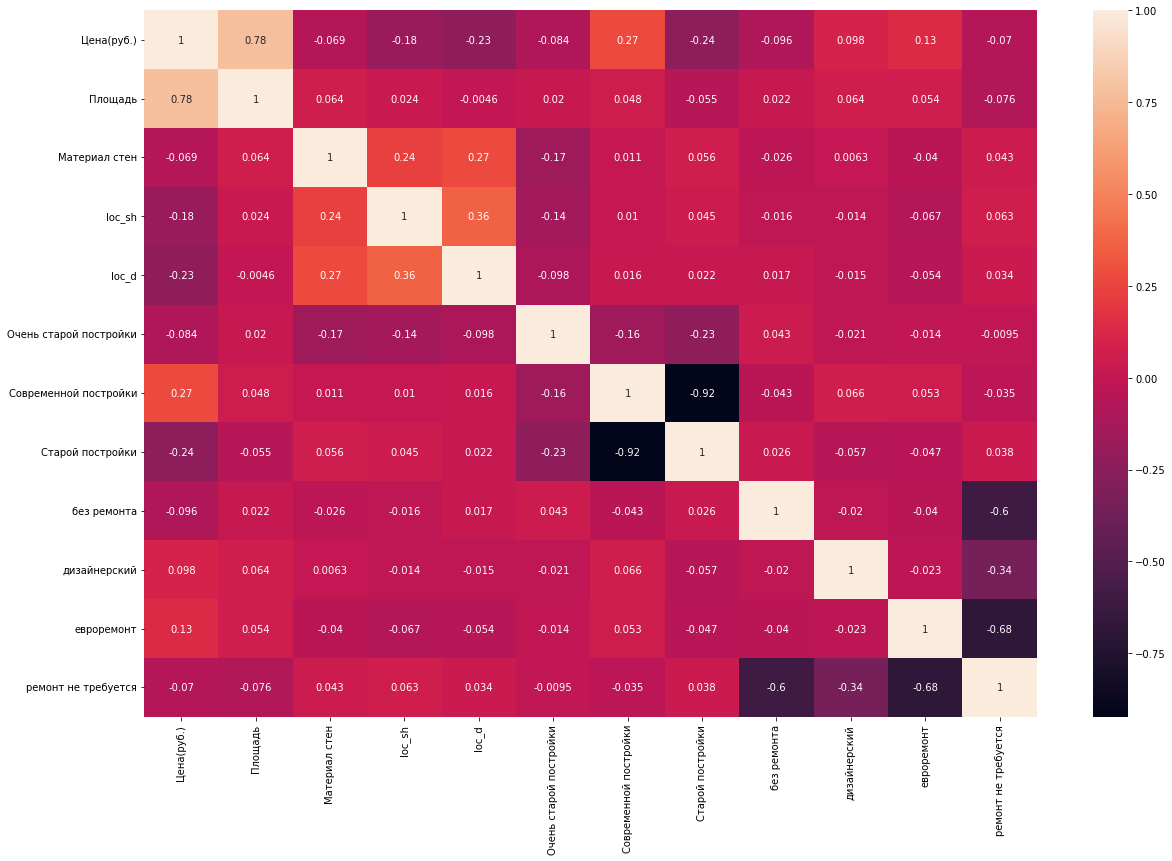

In [196]:
# Строим корреляционную матрицу
numeric_col = ['Цена(руб.)', 'Площадь', 'Материал стен', 'loc_sh', 'loc_d',
       'Очень старой постройки', 'Современной постройки', 'Старой постройки',
       'без ремонта', 'дизайнерский', 'евроремонт', 'ремонт не требуется']
corr_matrix = df_b.loc[:,numeric_col].corr(method="spearman") # pearson, kendall
#print(corr_matrix)
plt.figure(figsize = (20,13))
sns.heatmap(corr_matrix, annot=True)

In [197]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
X=df_b[['Площадь', 'Материал стен', 'loc_sh', 'loc_d', 'Современной постройки', 'Старой постройки',
       'без ремонта', 'дизайнерский']]
Y=df_b['Цена(руб.)']
# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:             Цена(руб.)   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     522.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:05:44   Log-Likelihood:                -21196.
No. Observations:                1426   AIC:                         4.241e+04
Df Residuals:                    1417   BIC:                         4.246e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.046e+

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


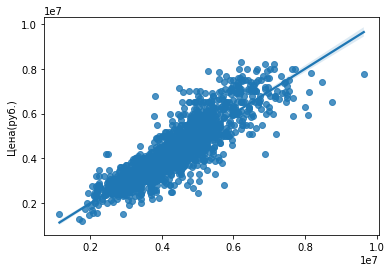

In [198]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

In [199]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
X=df_b[['Площадь', 'Материал стен', 'koor', 'Современной постройки', 'Старой постройки',
       'без ремонта', 'дизайнерский']]
Y=df_b['Цена(руб.)']
# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:             Цена(руб.)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     445.7
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:06:17   Log-Likelihood:                -21346.
No. Observations:                1426   AIC:                         4.271e+04
Df Residuals:                    1418   BIC:                         4.275e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.286e+

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


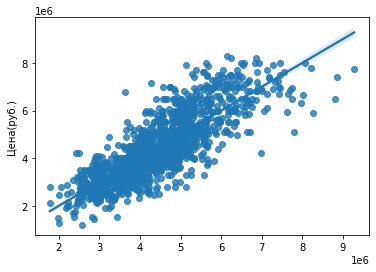

In [200]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()